In [36]:
import pandas as pd
import pandas_profiling
# from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re

**<Ï£ºÏ†ú>**  <br><br>
**Î∞∞Îã¨ Ìò∏Ï∂úÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌïú Î∞∞Îã¨ÏÑúÎπÑÏä§ÏôÄ ÏãùÎãπ ÌôúÏÑ±Ìôî Î∞©Ïïà Ï†úÏãú**<br><br>
Î∂ÑÏÑù Ï£ºÏ†ú ÏòàÏãú <br>
1) Î∂ÄÏ≤ú ÌäπÏ†ï ÏßÄÏó≠Ïùò Î∞∞Îã¨ ÏÑúÎπÑÏä§ ÌôúÏÑ±Ìôî Ï†ÑÎûµ <br>
2) ÏΩîÎ°úÎÇò 19Î°ú Ïù∏Ìïú Î∞∞Îã¨ Ìå®ÌÑ¥Ïùò Î≥ÄÌôî Î∂ÑÏÑù<br>
3) Î∂ÄÏ≤úÏãú ÏùåÏãù ÏûêÏòÅÏóÖÏûêÎ•º ÏúÑÌïú ÎßàÏºÄÌåÖ<br>
4) ÌäπÏ†ï ÏßÄÏó≠ ÌòπÏùÄ ÏóÖÏÜåÏùò ÏàòÏöî ÏòàÏ∏°<br><br>

**Ï†úÍ≥µÎç∞Ïù¥ÌÑ∞** <br>
Î∂ÄÏ≤ú ÏßÄÏó≠Ïùò 2019.08~2020.11ÍπåÏßÄÏùò Î∞∞Îã¨Ìò∏Ï∂ú Îç∞Ïù¥ÌÑ∞


# Ïö∞Î¶¨Ïùò Ï£ºÏ†ú: Î∂ÄÏ≤úÏãú Ïã†Í∑ú Ï∞ΩÏóÖÏûêÎ•º ÏúÑÌïú Í∞úÏóÖ ÏßÄÏó≠ Î∞è ÏóÖÏ¢Ö Ï∂îÏ≤ú

# data Load

In [454]:
df = pd.read_csv('./data.csv', header=None)
print(df.shape)
df.head()

(1110762, 32)


0           1        2   3        4         5       6           7   \
0  130707  2019-07-10  C000077   2  C000077  S0021794  ÎèàÍπåÏä§/ÏùºÏãù  4119011500   
1  131807  2019-07-10  C000077   2  C000077  S0021648      ÏπòÌÇ®  4119011500   
2  132366  2019-07-10  C000077   2  C000077  S0021648      ÏπòÌÇ®  4119011500   
3  132714  2019-07-10  C000077   2  C000077  S0021884  ÎèàÍπåÏä§/ÏùºÏãù  4119011500   
4  133307  2019-07-10  C000077   2  C000077  S0021803  ÏïÑÏãúÏïà/ÏñëÏãù  4119011500   

    8    9    10  11          12            13          14   15   16   17  18  \
0  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N  4119079500  411904853794  4119011500  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N   
1  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N  4119079500  411903185011  4119011500  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N   
2  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N  4119079500  411903185011  4119011500  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N   
3  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N  4119079500  411904853797  4119011500  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N   
4  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N  4119079500  411903185011  4119011500  Í≤ΩÍ∏∞ÎèÑ  Î∂ÄÏ≤úÏãú  Ïò•Í∏∏Îèô  \N   

           19            20        21    22  23     24  25   26  \
0  4119079500  411903185011  D0000884  3000   0  19000   3  NaN   
1  4119079500  411904853793  D0000884  3000   0  23000   1  ÏäπÏù∏:   
2  4119079500  411903185011  D0000884  3000   0  23000   3  NaN   
3  4119079500  411904853793  D0000884  3000   0  16000   1  NaN   
4  4119079500  411903185011  D0000884  3000   0  38700   1  NaN   

                    27                   28                   29  30  \
0  2019-07-10 14:58:33  2019-07-10 14:59:06  2019-07-10 14:59:30  \N   
1  2019-07-10 15:57:08  2019-07-10 15:57:35  2019-07-10 15:57:48  \N   
2  2019-07-10 15:49:46  2019-07-10 15:50:13  2019-07-10 15:50:49  \N   
3  2019-07-10 16:09:59  2019-07-10 16:10:26                   \N  \N   
4  2019-07-10 16:59:54  2019-07-10 17:00:12  2019-07-10 17:00:27  \N   

                    31  
0  2019-07-10 15:02:34  
1  2019-07-10 15:59:01  
2  2019-07-10 15:51:52  
3  2019-07-10 16:15:37  
4  2019-07-10 17:03:50

## Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω

In [455]:
col = ['ÏàúÎ≤à', 'Ï≤òÎ¶¨Ïùº', 'Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id', 'Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú', 'Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id', 'Î∞∞Îã¨ÏÉÅÏ†êid', 'Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö',
      'Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú', 'Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ', 'Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨', 'Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨',
      'Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú', 'Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ',
      'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú', 
       'Î∞∞Îã¨Í∏∞ÏÇ¨id', 'Î∞∞Îã¨ÎπÑÏö©', 'Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°', 'Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°', 'Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏', 'Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò', 'Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ', 
       'Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ', 'Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ', 'Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ', 'Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'
      ]
data = df.copy()
data.columns = col
data.head(3)

ÏàúÎ≤à         Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö   Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú  \
0  130707  2019-07-10  C000077       2  C000077  S0021794  ÎèàÍπåÏä§/ÏùºÏãù  4119011500   
1  131807  2019-07-10  C000077       2  C000077  S0021648      ÏπòÌÇ®  4119011500   
2  132366  2019-07-10  C000077       2  C000077  S0021648      ÏπòÌÇ®  4119011500   

  Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú  \
0     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411904853794   4119011500   
1     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411903185011   4119011500   
2     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411903185011   4119011500   

  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú    Î∞∞Îã¨Í∏∞ÏÇ¨id  \
0      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411903185011  D0000884   
1      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411904853793  D0000884   
2      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411903185011  D0000884   

   Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏ Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò               Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  3000          0   19000       3    NaN  2019-07-10 14:58:33   
1  3000          0   23000       1    ÏäπÏù∏:  2019-07-10 15:57:08   
2  3000          0   23000       3    NaN  2019-07-10 15:49:46   

                Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ               Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ               Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0  2019-07-10 14:59:06  2019-07-10 14:59:30     \N  2019-07-10 15:02:34  
1  2019-07-10 15:57:35  2019-07-10 15:57:48     \N  2019-07-10 15:59:01  
2  2019-07-10 15:50:13  2019-07-10 15:50:49     \N  2019-07-10 15:51:52

# data info & description

## data info

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110762 entries, 0 to 1110761
Data columns (total 32 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ÏàúÎ≤à             1110762 non-null  int64 
 1   Ï≤òÎ¶¨Ïùº            1110762 non-null  object
 2   Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id       1110762 non-null  object
 3   Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú         1110762 non-null  int64 
 4   Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id       1110762 non-null  object
 5   Î∞∞Îã¨ÏÉÅÏ†êid         1110762 non-null  object
 6   Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö        1110762 non-null  object
 7   Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú      1110762 non-null  int64 
 8   Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ        1110762 non-null  object
 9   Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨       1110762 non-null  object
 10  Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô       1110762 non-null  object
 11  Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨         1110762 non-null  object
 12  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú     1110762 non-null  int64 
 13  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú   1110762 non-null  

## data description

In [457]:
data.describe()

ÏàúÎ≤à     Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú     Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú    Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú  \
count  1110762.00 1110762.00    1110762.00    1110762.00    1110762.00   
mean   8382540.12       1.02 4119010876.31 4119070108.83 3994874462.30   
std    4506893.51       0.12        466.21       8246.68  553967093.38   
min     130707.00       1.00 4119010100.00 4119060300.00 1144012700.00   
25%    4544480.00       1.00 4119010700.00 4119060600.00 4119010700.00   
50%    7778907.50       1.00 4119010800.00 4119074200.00 4119010900.00   
75%   11870693.75       1.00 4119011300.00 4119079500.00 4119011200.00   
max   17906265.00       2.00 4119012400.00 4119083000.00 5011013700.00   

        Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú       Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°     Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°     Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏  
count    1110762.00 1110762.00 1110762.00 1110762.00 1110762.00  
mean  3994935455.57    3705.50     224.40   21188.01       1.82  
std    553966189.48     757.49      61.14   12575.52       0.52  
min   1144074000.00       0.00       0.00       0.00       1.00  
25%   4119060600.00    3200.00     200.00   15500.00       2.00  
50%   4119074400.00    3500.00     200.00   20000.00       2.00  
75%   4119075000.00    4000.00     300.00   26500.00       2.00  
max   5011065000.00   34000.00   11089.00 1000000.00       3.00

* Î∞∞Îã¨ÎπÑÏö© ÏµúÏÜüÍ∞í: 0, ÏµúÎåìÍ∞í: 34000
* Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° ÏµúÎåìÍ∞í: 1,000,000 
<br> Ïù¥ÏÉÅÏπòÎ°ú Ï∂îÏ†ïÎêòÎäî Í∞íÎì§ Ï°¥Ïû¨

In [458]:
data.describe(include='object')

Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid  Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨  \
count      1110762  1110762  1110762   1110762  1110762  1110762  1110762   
unique         502       24       21      1519       15        1        1   
top     2020-01-06  C000254  C000254  S0021041       ÏπòÌÇ®      Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú   
freq          5340   321055   277391     16481   270330  1110762  1110762   

       Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô   Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨  \
count   1110762  1110762       1110762  1110762   1110762   1110762  1110762   
unique       18        1           241       11        30        72        4   
top          Ï§ëÎèô       \N  411903185011      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú        Ï§ëÎèô       \N   
freq     251579  1110762         70065  1050954   1048642    214469  1110758   

       Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú    Î∞∞Îã¨Í∏∞ÏÇ¨id    Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò               Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ   Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ  \
count        1110762   1110762    272044              1110762  1110762   
unique          2034      1880        33              1060011  1058200   
top     411903186021  D0004887  ÏäπÏù∏:ÎπÑÏî®Ïπ¥ÎìúÏÇ¨  2019-10-15 19:49:36       \N   
freq           47925     17430     79002                    8    13009   

         Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ   Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ   Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
count   1110762  1110762  1110762  
unique  1054341  1054737    17288  
top          \N       \N       \N  
freq      17227    17251  1093339

1) Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢Ö : ÏπòÌÇ®Ïù¥ Ï†úÏùº ÎßéÏùå  <br>
2) Î∞∞Îã¨ÏÉÅÏ†êÏùçÎ©¥Îèô : Ï§ëÎèôÏù¥ Ï†úÏùº ÎßéÏùå <br>
3) Î∞∞Îã¨Î™©Ï†ÅÏßÄÎ≤ïÏ†ïÎèôÏùçÎ©¥ÎèôÎ™Ö : Ïó≠Ïãú Ï§ëÎèôÏù¥ Ï†úÏùº ÎßéÏùå <br>
4) Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò : null ÎßéÏùå

## data report

In [459]:
# profile = ProfileReport(data, title="Î∞∞Îã¨Îç∞Ïù¥ÌÑ∞ report")
# profile.to_file("profile.html")

## Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [460]:
data.isnull().sum()

ÏàúÎ≤à                    0
Ï≤òÎ¶¨Ïùº                   0
Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id              0
Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú                0
Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id              0
Î∞∞Îã¨ÏÉÅÏ†êid                0
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö               0
Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú             0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ               0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨              0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô              0
Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨                0
Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú            0
Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú          0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú           0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ              0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨             0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô             0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨               0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú           0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú         0
Î∞∞Îã¨Í∏∞ÏÇ¨id                0
Î∞∞Îã¨ÎπÑÏö©                  0
Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°             0
Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°                0
Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏                0
Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò    

<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

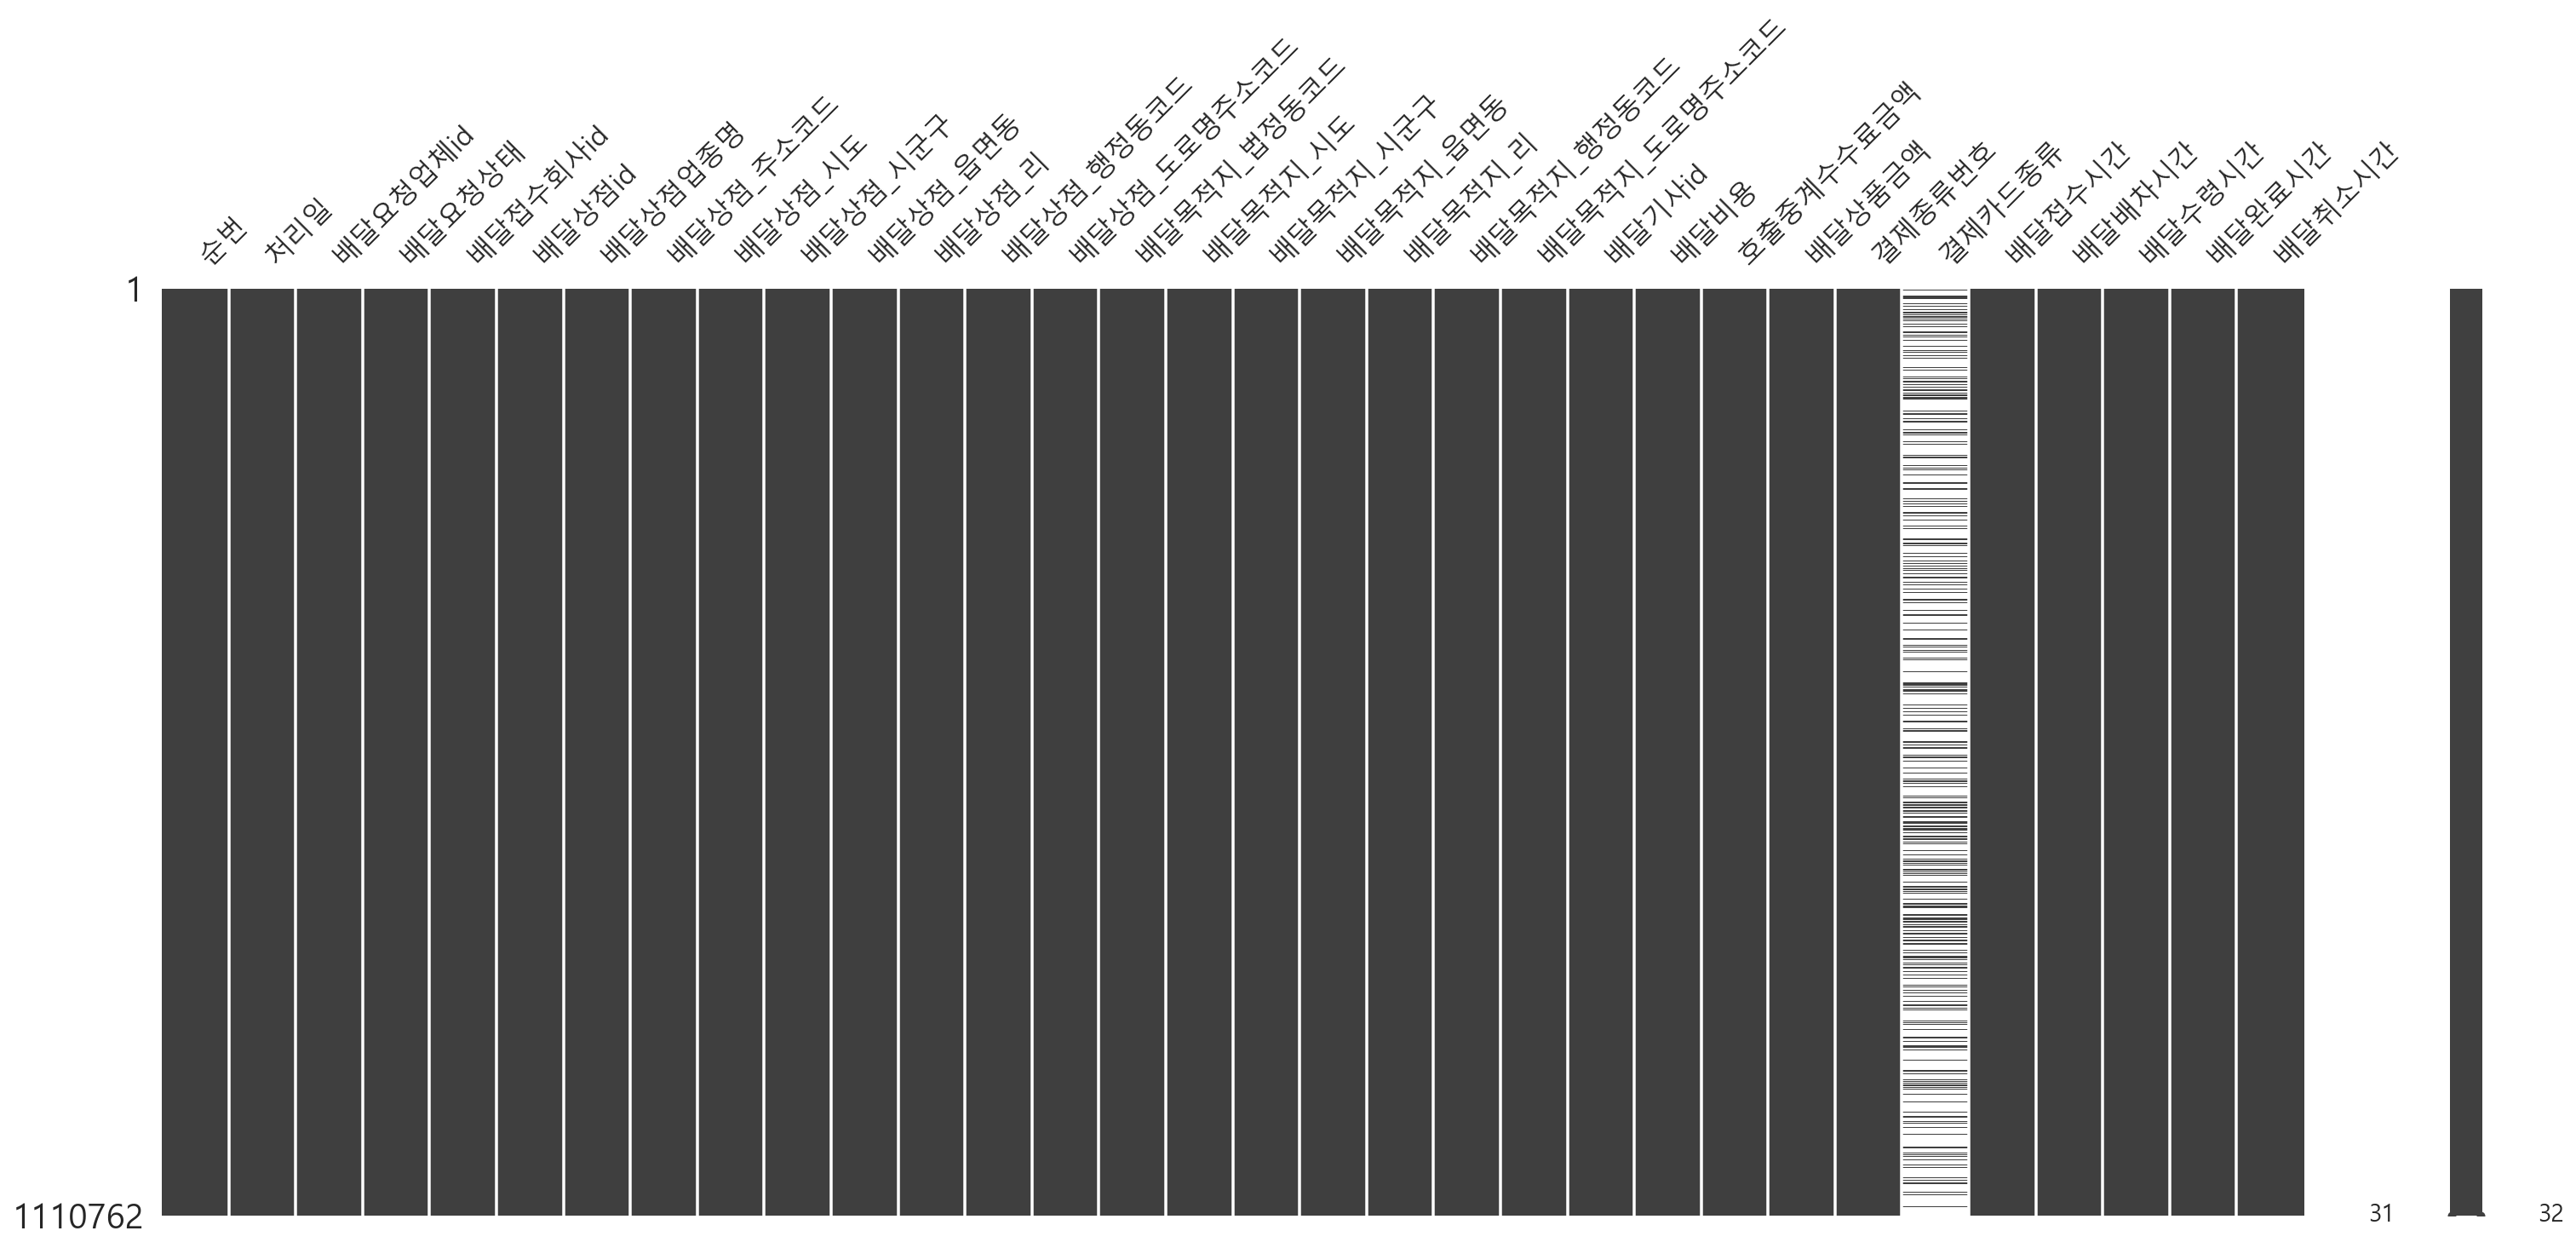

In [461]:
import missingno
plt.figure(figsize=(10, 8))
missingno.matrix(data)

Í≤∞Ï∏°Ïπò : Ïª¨Îüº 26Ïô∏(Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò)Ïùò Îã§Î•∏ Ïª¨ÎüºÏóêÎäî Í≤∞Ï∏°Ïπò ÏóÜÏùå
* Ï£ºÏùò: Ïù¥ÌõÑ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏóêÏÑú \NÏúºÎ°ú ÌëúÌòÑÎêú Í∞íÎì§ Îã§Ïàò Î∞úÍ≤¨Ìï® --> Í≤∞Ï∏°Ïπò Ï∂îÏ†ï

* "Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉúÍ∞í 1 : ÏôÑÎ£å, 2 : Ï∑®ÏÜå, 3 : ÏÇ¨Í≥†, 4 : Î¨∏Ïùò" <br><br>
* "Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏ 1:Ïπ¥Îìú, 2:ÏÑ†Î∂à, 3:ÌòÑÍ∏à, 4:ÌòÑ->Ïπ¥, 5:Ïπ¥->ÌòÑ, 6:Ïπ¥->ÏÑ†, 7:ÏÑ†->Ïπ¥, 8:ÏÑ†->ÌòÑ, 9:ÌòÑ->ÏÑ†, 10:ÌõÑÎ∂à, 11:-" 



# preprocessing

In [462]:
data.head(2)

ÏàúÎ≤à         Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö   Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú  \
0  130707  2019-07-10  C000077       2  C000077  S0021794  ÎèàÍπåÏä§/ÏùºÏãù  4119011500   
1  131807  2019-07-10  C000077       2  C000077  S0021648      ÏπòÌÇ®  4119011500   

  Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú  \
0     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411904853794   4119011500   
1     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411903185011   4119011500   

  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú    Î∞∞Îã¨Í∏∞ÏÇ¨id  \
0      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411903185011  D0000884   
1      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411904853793  D0000884   

   Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏ Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò               Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  3000          0   19000       3    NaN  2019-07-10 14:58:33   
1  3000          0   23000       1    ÏäπÏù∏:  2019-07-10 15:57:08   

                Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ               Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ               Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0  2019-07-10 14:59:06  2019-07-10 14:59:30     \N  2019-07-10 15:02:34  
1  2019-07-10 15:57:35  2019-07-10 15:57:48     \N  2019-07-10 15:59:01

## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [463]:
# Í≤∞Ï∏°Ïπò ÎßéÏïòÎçò Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò Ïª¨Îüº
print(f"Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò Í≤∞Ï∏°Ïπò: {data['Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò'].isnull().sum()}Í∞ú")
    
# Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò Ïª¨Îüº Ï†úÍ±∞
data.drop(columns=['Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò'], axis=1, inplace=True)

Í≤∞Ï†úÏπ¥ÎìúÏ¢ÖÎ•ò Í≤∞Ï∏°Ïπò: 838718Í∞ú


In [464]:
data.head(1)

ÏàúÎ≤à         Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö   Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú  \
0  130707  2019-07-10  C000077       2  C000077  S0021794  ÎèàÍπåÏä§/ÏùºÏãù  4119011500   

  Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú  \
0     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô     \N  4119079500  411904853794   4119011500   

  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú    Î∞∞Îã¨Í∏∞ÏÇ¨id  \
0      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô      \N   4119079500  411903185011  D0000884   

   Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏               Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ  \
0  3000          0   19000       3  2019-07-10 14:58:33  2019-07-10 14:59:06   

                Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ               Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0  2019-07-10 14:59:30     \N  2019-07-10 15:02:34

In [465]:
# \N, NaNÍ≥º Í∞ôÏùÄ Í∞í ÌôïÏù∏
print(len(data.loc[data['Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†êid'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Í∏∞ÏÇ¨id'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÎπÑÏö©'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ'].isin(['\\N'])]))
print(len(data.loc[data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'].isin(['\\N'])]))

0
0
13330
0
0
0
0
1110762
0
20849
0
0
1110758
0
42568
13002
0
0
13009
17227
17251
1093339


**\N Ï°¥Ïû¨ÌïòÎäî Ïª¨Îüº**<br><br>

* Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id, Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨, Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú, Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨, Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú, Î∞∞Îã¨Í∏∞ÏÇ¨id, Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ, Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ, Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ, Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ

In [466]:
# \NÏùÑ null Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò

def convert_null(row):
    if pd.isnull(row):
        return np.nan
    elif row == '\\N':
        return np.nan
    else:
        return row

data['Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id'] = data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'].apply(convert_null)
data['Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨'] = data['Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨'].apply(convert_null)
data['Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'] = data['Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'].apply(convert_null)
data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨'] = data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨'].apply(convert_null)
data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'] = data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú'].apply(convert_null)
data['Î∞∞Îã¨Í∏∞ÏÇ¨id'] = data['Î∞∞Îã¨Í∏∞ÏÇ¨id'].apply(convert_null)
data['Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ'] = data['Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ'].apply(convert_null)
data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'] = data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'].apply(convert_null)
data['Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ'] = data['Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ'].apply(convert_null)
data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'] = data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'].apply(convert_null)

## ÎÇ†Ïßú --> DATETIME Î≥ÄÌôò

<Ï≤òÎ¶¨Ïùº, Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ, Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ, Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ, Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ, Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ> Data Type Î≥ÄÌôò

In [467]:
from tqdm import tqdm
tqdm.pandas(desc="my bar!")

def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

data['Ï≤òÎ¶¨Ïùº'] = data['Ï≤òÎ¶¨Ïùº'].progress_apply(convert_datetime)
data['Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ'] = data['Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ'].progress_apply(convert_datetime)
data['Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ'] = data['Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ'].progress_apply(convert_datetime)
data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'] = data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'].progress_apply(convert_datetime)
data['Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ'] = data['Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ'].progress_apply(convert_datetime)
data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'] = data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'].progress_apply(convert_datetime)
data[['Ï≤òÎ¶¨Ïùº', 'Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ', 'Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ', 'Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ', 'Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ', 'Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ']].head()

my bar!: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1110762/1110762 [00:03<00:00, 297205.38it/s]


Ï≤òÎ¶¨Ïùº              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ              Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ  \
0 2019-07-10 2019-07-10 14:58:33 2019-07-10 14:59:06 2019-07-10 14:59:30   
1 2019-07-10 2019-07-10 15:57:08 2019-07-10 15:57:35 2019-07-10 15:57:48   
2 2019-07-10 2019-07-10 15:49:46 2019-07-10 15:50:13 2019-07-10 15:50:49   
3 2019-07-10 2019-07-10 16:09:59 2019-07-10 16:10:26                 NaT   
4 2019-07-10 2019-07-10 16:59:54 2019-07-10 17:00:12 2019-07-10 17:00:27   

  Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0    NaT 2019-07-10 15:02:34  
1    NaT 2019-07-10 15:59:01  
2    NaT 2019-07-10 15:51:52  
3    NaT 2019-07-10 16:15:37  
4    NaT 2019-07-10 17:03:50

In [468]:
# Í≤∞Ï∏°Ïπò ÏµúÏ¢Ö ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
data.isnull().sum()

ÏàúÎ≤à                     0
Ï≤òÎ¶¨Ïùº                    0
Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id               0
Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú                 0
Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id         1093339
Î∞∞Îã¨ÏÉÅÏ†êid                 0
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö                0
Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú              0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ                0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨               0
Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô               0
Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨           1110762
Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú             0
Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú       20849
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú            0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ               0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨              0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô              0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨          1110758
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú            0
Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú      42568
Î∞∞Îã¨Í∏∞ÏÇ¨id             13002
Î∞∞Îã¨ÎπÑÏö©                   0
Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°              0
Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°                 0
Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏               

**Í≤∞Ï∏°Ïπò ÎßéÏùÄ Ïª¨ÎüºÎì§ Ï§ë Î∂ÑÏÑùÏóê ÌÅ∞ ÏùòÎØ∏Î•º ÏßÄÎãàÏßÄ ÏïäÎäî Ïª¨ÎüºÎì§**
* Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨(1110762)
* Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨(1110758)
* Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ(1093339)

## Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú

In [469]:
'''
(1) Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨, Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨ Ï†úÍ±∞
(2) Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞ÑÏùÄ Î≥¥Î•ò
'''
data.drop(columns=['Î∞∞Îã¨ÏÉÅÏ†ê_Î¶¨', 'Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î¶¨'], axis=1, inplace=True)
data.head(2)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   
1  131807 2019-07-10  C000077       2  2019-07-10 15:59:01  S0021648      ÏπòÌÇ®   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   
1  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   
1   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411904853793   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   
1  D0000884  3000          0   23000       1 2019-07-10 15:57:08   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34  
1 2019-07-10 15:57:35 2019-07-10 15:57:48    NaT 2019-07-10 15:59:01

## Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú
Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú
* 1 : 109339Í∞ú
* 2 : 17423Í∞ú

Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ id
* null(\N) : 13330Í∞ú

Î∞∞Îã¨ÏÉÅÏ†ê ÏãúÎèÑÎ™Ö : Í≤ΩÍ∏∞ÎèÑ <br>

Î∞∞Îã¨ÏÉÅÏ†ê ÏãúÍµ∞Íµ¨Î™Ö : Î∂ÄÏ≤úÏãú

Î∞∞Îã¨ÏÉÅÏ†ê ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú
* null(\N) : 20849Í∞ú

Î∞∞Îã¨Î™©Ï†ÅÏßÄ Î≤ïÏ†ïÎèô ÏãúÎèÑÎ™Ö
* Í≤ΩÍ∏∞ÎèÑ : 1050954Í∞ú
* ÏÑúÏö∏ÌäπÎ≥ÑÏãú : 36190Í∞ú
* Ïù∏Ï≤úÍ¥ëÏó≠Ïãú : 32607Í∞ú
* Í∑∏ Ïô∏ : 11

Î∞∞Îã¨Î™©Ï†ÅÏßÄ ÎèÑÎ°úÎ™ÖÏ£ºÏÜå ÏΩîÎìú
* null(\N) : 42568Í∞ú

Î∞∞Îã¨Í∏∞ÏÇ¨ id
* null(\N) : 13002Í∞ú

Î∞∞Îã¨ÎπÑÏö©
* 0 : 199
* 3 : 2
* 10 : 1
* 100 : 1
* 200 : 1

Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°
* 0 : 105193Í∞ú

Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏
* 1 : 272856(Ïπ¥Îìú)
* 2 : 769366(ÏÑ†Î∂à)
* 3 : 68540(ÌòÑÍ∏à)

# EDA

## Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥, Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨, Î∞∞Îã¨ÏÉÅÏ†ê, Î∞∞Îã¨Î™©Ï†ÅÏßÄÎäî Î™á Í≥≥ÏùºÍπå?(unique Í∞í)

In [470]:
print(f"Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ unique count: {data['Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id'].nunique()}")
print(f"Ï£ºÎ¨∏Ïàò unique count: {data['ÏàúÎ≤à'].nunique()}")
print(f"Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ unique count: {data['Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id'].nunique()}")
print(f"Î∞∞Îã¨ÏÉÅÏ†ê unique count: {data['Î∞∞Îã¨ÏÉÅÏ†êid'].nunique()}")
print(f"Î∞∞Îã¨Î™©Ï†ÅÏßÄ unique count: {data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú'].nunique()}")

Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ unique count: 24
Ï£ºÎ¨∏Ïàò unique count: 1110762
Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ unique count: 17287
Î∞∞Îã¨ÏÉÅÏ†ê unique count: 1519
Î∞∞Îã¨Î™©Ï†ÅÏßÄ unique count: 93


* Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ : 24Í≥≥
* Ï£ºÎ¨∏Ïàò : 1110762
* Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨: 17287Í≥≥
* Î∞∞Îã¨ÏÉÅÏ†ê: 1519Í≥≥
* Î∞∞Îã¨Î™©Ï†ÅÏßÄ(ÌñâÏ†ïÎèôÏΩîÎìúÍ∏∞Ï§Ä): 93Í≥≥

## ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

Text(0.5, 1.0, 'Î∞∞Îã¨ÎπÑÏö© & Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£å')

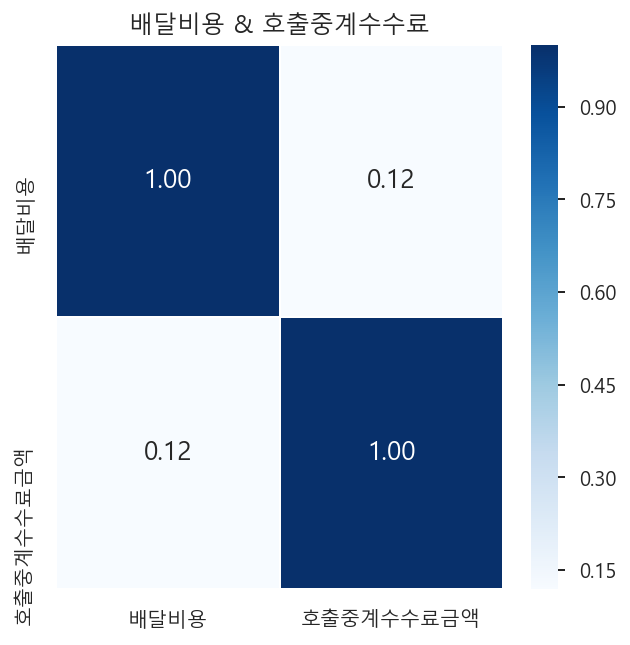

In [132]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=data[['Î∞∞Îã¨ÎπÑÏö©', 'Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°']].corr(),
            annot=True,
            annot_kws={'size': 13},
            fmt='.2f',
            linewidths='.5',
            cmap='Blues')
plt.title('Î∞∞Îã¨ÎπÑÏö© & Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£å')

* Î∞∞Îã¨ÎπÑÏö©Í≥º Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï° Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 0.12Î°ú Î¨¥ÏÉÅÍ¥ÄÏóê Í∞ÄÍπåÏõÄ

<Figure size 504x504 with 0 Axes>

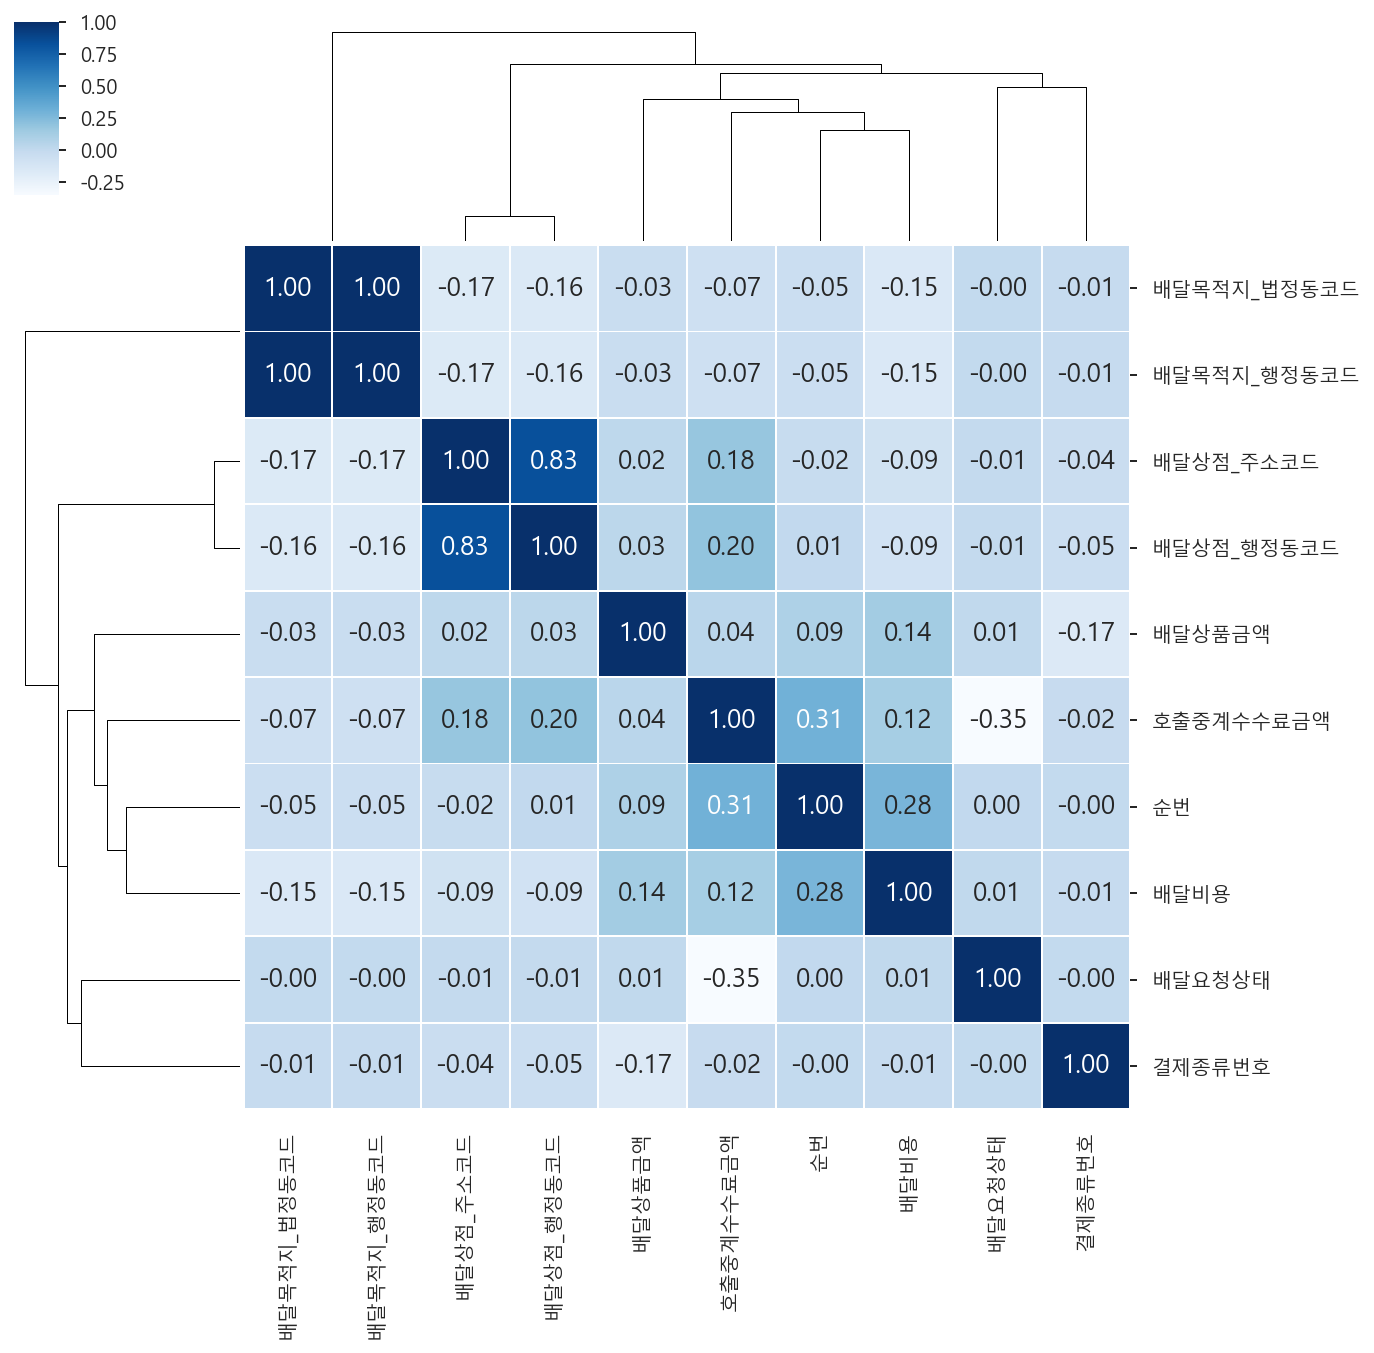

In [133]:
plt.figure(figsize=(7, 7))
sns.clustermap(data=data.corr(),
            annot=True,
            annot_kws={'size': 13},
            fmt='.2f',
            linewidths='.5',
            cmap='Blues')

* Î∞∞Îã¨Î™©Ï†ÅÏßÄ Î≤ïÏ†ïÎèôÏΩîÎìúÏôÄ ÌñâÏ†ïÎèôÏΩîÎìú Í∞ÑÏóêÎäî Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
* Î∞∞Îã¨ÏÉÅÏ†ê Ï£ºÏÜåÏΩîÎìúÏôÄ ÌñâÏ†ïÎèôÏΩîÎìú Í∞ÑÏóêÎäî Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
* Îî±Ìûà Ïú†ÏùòÎØ∏Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏßÄÎäî Î™ªÌï®

## Î∞∞Îã¨ Ï≤òÎ¶¨Ïùº Ï¥ù Í∏∞Í∞Ñ

In [432]:
print(data['Ï≤òÎ¶¨Ïùº'].min(), data['Ï≤òÎ¶¨Ïùº'].max())

2019-07-10 00:00:00 2020-11-30 00:00:00


**2019ÎÖÑ 7Ïõî 10Ïùº ~ 2020ÎÖÑ 11Ïõî 30Ïùº**

## Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ & Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú & Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ id

In [137]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 8)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
data['Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id'].value_counts().sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id bar graph')
data['Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú bar graph')
data['Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id'].value_counts().sort_values().plot(kind='barh', ax=ax3)
ax3.set_title('Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id bar graph')
ax1.grid(color='lightgrey', alpha=0.55)
ax2.grid(color='lightgrey', alpha=0.55)
ax3.grid(color='lightgrey', alpha=0.55)

Error in callback <function flush_figures at 0x000001ADD8130378> (for post_execute):


KeyboardInterrupt: 

* Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ id ÏÉÅÏúÑ 10Í∞ú ÏóÖÏ≤¥ <br>
C000254, C000077, C000238, C000240, C000253, C000250, C000032, C000591, C000330, C000040  <br> --> Ïù¥ Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥Îì§Ïù¥ Í≤ΩÍ∏∞ÎèÑÎØºÎì§Ïù¥ ÎßéÏù¥ Ï£ºÎ¨∏ÌïòÎäî Í∞ÄÍ≤åÎì§Ïùº Í≤É<br><br>
* Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉúÎäî 1(ÏôÑÎ£å)Í∞Ä 2(Ï∑®ÏÜå)Ïóê ÎπÑÌï¥ Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥ id ÏÉÅÏúÑ 10Í∞ú ÏóÖÏ≤¥ <br>
C000254, C000077, C000238, C000240, C000253, C000250, C000032, C000591, C000330, C000040  <br> --> Ïù¥ Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥Îì§Ïù¥ Í≤ΩÍ∏∞ÎèÑÎØºÎì§Ïù¥ ÎßéÏù¥ Ï£ºÎ¨∏ÌïòÎäî Í∞ÄÍ≤åÎì§Ïùº Í≤É<br><br>
* Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉúÎäî 1(ÏôÑÎ£å)Í∞Ä 2(Ï∑®ÏÜå)Ïóê ÎπÑÌï¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùå <br><br>
* Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ id ÏÉÅÏúÑ 10Í∞ú ÏóÖÏ≤¥ <br>
C000254, C000238, C000077, C000240, C000253, C000250, C000330, C000591, C000256, C000247<br>
 --> Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨ÏôÄ Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥Í∞Ä Ï§ëÎ≥µÎêòÎäî Í≥≥ÏùÄ Î∞∞Îã¨ÏùÑ ÏûêÏ≤¥Ï†ÅÏúºÎ°ú ÌïòÎäî Í∞ÄÍ≤åÏùº Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ

## Î∞∞Îã¨ÎπÑÏö©

In [433]:
data.head(2)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   
1  131807 2019-07-10  C000077       2  2019-07-10 15:59:01  S0021648      ÏπòÌÇ®   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   
1  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   
1   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411904853793   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   
1  D0000884  3000          0   23000       1 2019-07-10 15:57:08   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34  
1 2019-07-10 15:57:35 2019-07-10 15:57:48    NaT 2019-07-10 15:59:01

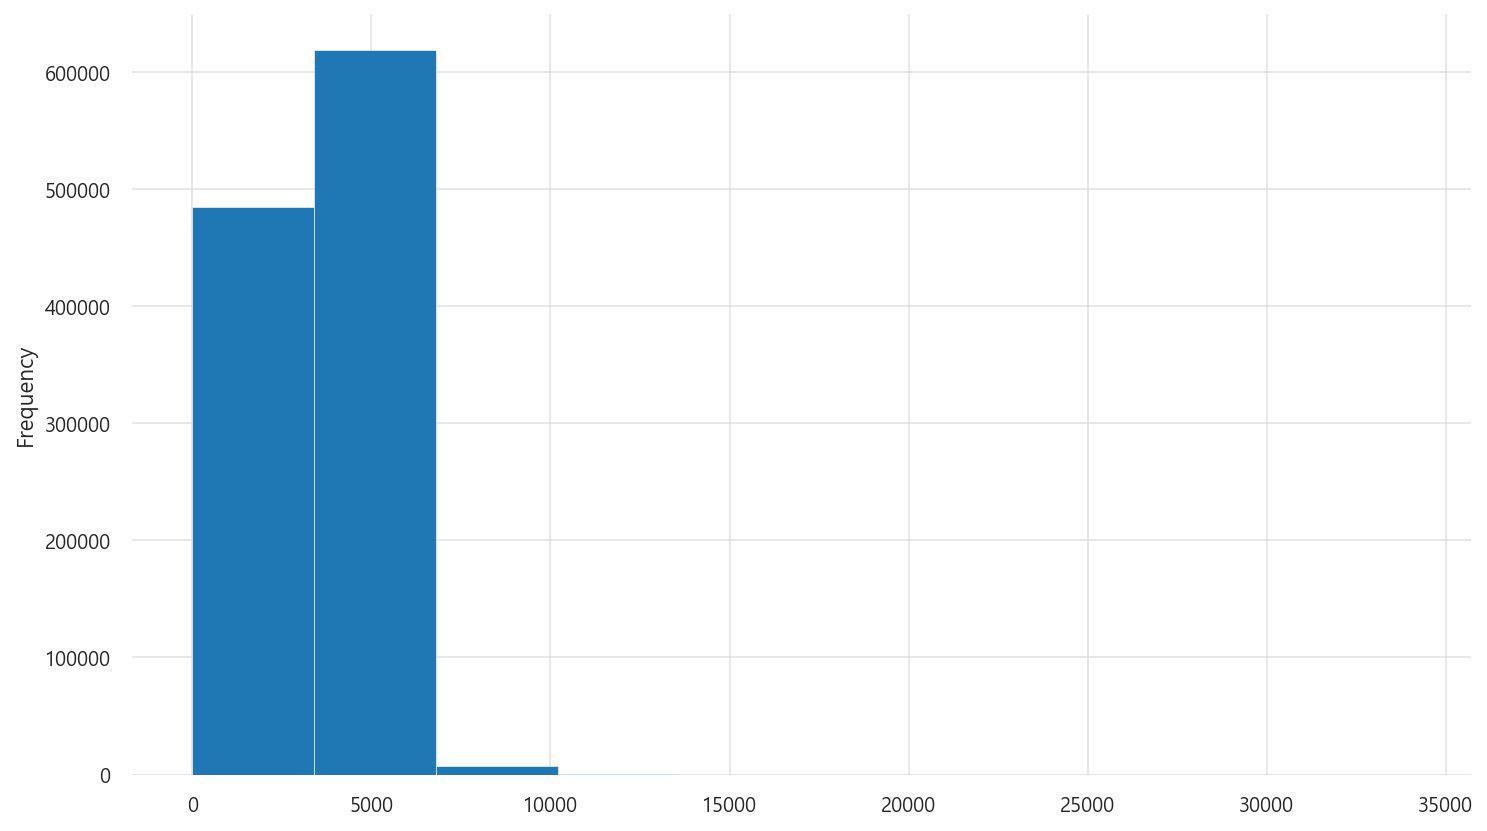

In [434]:
plt.figure(figsize=(12, 7))
a = data['Î∞∞Îã¨ÎπÑÏö©'].plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)

In [471]:
delivery_cost = data.pivot_table(index=['Î∞∞Îã¨ÎπÑÏö©'],
                                 values=['ÏàúÎ≤à'],
                                 aggfunc='count').sort_values(by='ÏàúÎ≤à', ascending=False)
delivery_cost.head(5)

ÏàúÎ≤à
Î∞∞Îã¨ÎπÑÏö©        
3000  241957
3300  202990
3500  112477
3630  105380
3800   82583

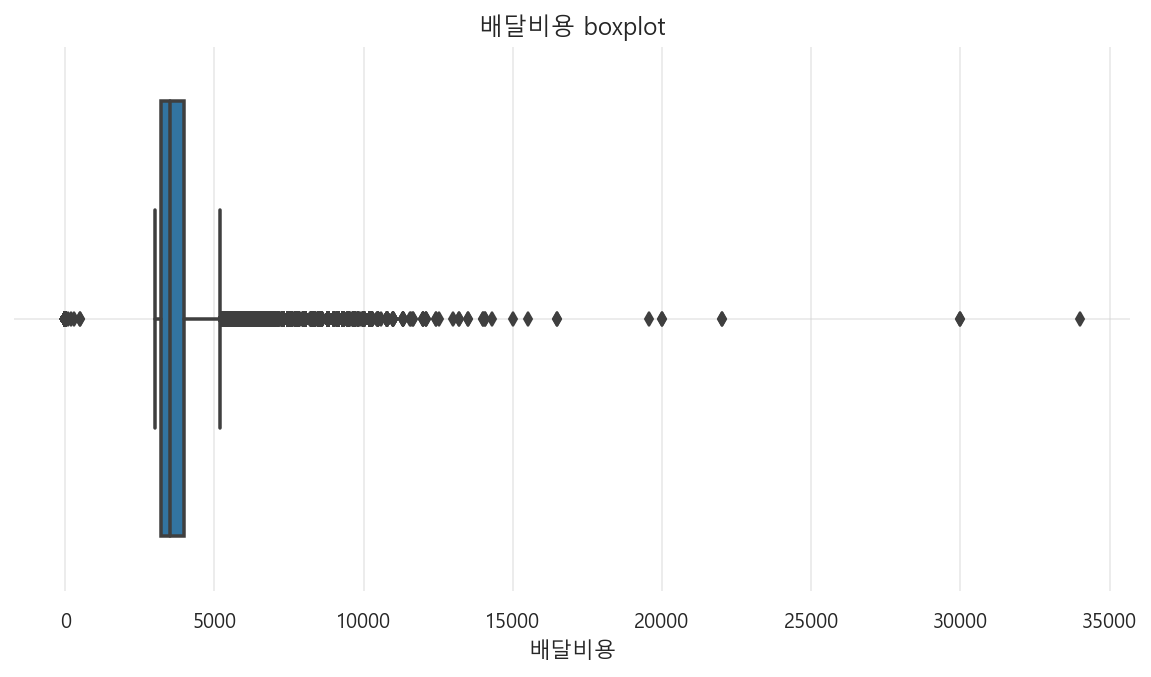

In [472]:
plt.figure(figsize=(10, 5))
plt.title('Î∞∞Îã¨ÎπÑÏö© boxplot')
sns.boxplot(data=data, x='Î∞∞Îã¨ÎπÑÏö©')
plt.grid(color='lightgrey', alpha=0.43)

**Î∞∞Îã¨ÎπÑÏö©**
* 3000, 3300ÏõêÏù¥ Ï†úÏùº ÎßéÍ≥† 3500, 3630, 3800ÏõêÏù¥ Í∑∏ Îí§Î•º Ïù¥Ïùå
* Î∞∞Îã¨ÎπÑÏö©ÏùÄ 3000ÏõêÎåÄÍ∞Ä Ï†úÏùº ÎßéÏùå
* Ï†ú 1, 2, 3ÏÇ¨Î∂ÑÏúÑÏàò Î™®Îëê 5000Ïõê ÎÇ¥Ïóê ÏúÑÏπòÌï®
* Î∞∞Îã¨ÎπÑÏö©Ïù¥ 5000ÏõêÏùÑ ÎÑòÏñ¥Í∞ÄÎäî Í∑πÎã®Í∞íÎì§ ÎßéÏù¥ Î≥¥ÏûÑ

In [473]:
# Î∞∞Îã¨ÎπÑÏö© 10000ÎÑòÎäî Í≤ΩÏö∞Îì§ Ï§ë ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú TOP 10Îßå
print(len(data.loc[data['Î∞∞Îã¨ÎπÑÏö©'] >= 10000]))
data.loc[data['Î∞∞Îã¨ÎπÑÏö©'] >= 10000].sort_values(by='Î∞∞Îã¨ÎπÑÏö©', ascending=False).head(5)

264


ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
494984   7022067 2020-03-12  C000254       1      NaN  S0020052      ÏπòÌÇ®   
835228  11911379 2020-07-22  C000253       1      NaN  S0019494      ÌîºÏûê   
835242  11911557 2020-07-22  C000253       1      NaN  S0019494      ÌîºÏûê   
611555   8542293 2020-04-21  C000254       1      NaN  S0020147      ÏπòÌÇ®   
558801   7824078 2020-04-03  C000077       1      NaN  S0021818   Ï°±Î∞ú/Î≥¥Ïåà   

         Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
494984  4119010900     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú       ÏÉÅÎèô  4119061000  411904352053   
835228  4119011300     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Í¥¥ÏïàÎèô  4119079500  411903000028   
835242  4119011300     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Í¥¥ÏïàÎèô  4119079500  411903000028   
611555  4119010900     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú       ÏÉÅÎèô  4119061000  411903184014   
558801  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853793   

        Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
494984   4119010100      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       ÏõêÎØ∏Îèô   4119060300  411904352434   
835228   1165010800    ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨       ÏÑúÏ¥àÎèô   1165053000  116503121024   
835242   1168011800    ÏÑúÏö∏ÌäπÎ≥ÑÏãú       Í∞ïÎÇ®Íµ¨       ÎèÑÍ≥°Îèô   1168065500  116802102001   
611555   4119010800      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú        Ï§ëÎèô   4119074200  411904352260   
558801   4119011000      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú      ÏÜåÏÇ¨Î≥∏Îèô   4119075000  411904355196   

          Î∞∞Îã¨Í∏∞ÏÇ¨id   Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
494984  D0009495  34000        200   29000       3 2020-03-12 17:11:52   
835228  D0005004  30000          0       0       2 2020-07-22 18:18:07   
835242  D0005004  30000          0       0       2 2020-07-22 18:19:23   
611555  D0010088  22000        200   18500       1 2020-04-21 19:57:15   
558801  D0009644  22000        300  810000       1 2020-04-03 12:03:06   

                    Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ              Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
494984 2020-03-12 17:12:19 2020-03-12 17:51:06 2020-03-12 17:52:12    NaT  
835228 2020-07-22 18:18:14 2020-07-22 18:19:32 2020-07-22 19:32:12    NaT  
835242 2020-07-22 18:19:27 2020-07-22 18:19:33 2020-07-22 19:47:16    NaT  
611555 2020-04-21 20:04:26 2020-04-21 20:10:04 2020-04-21 20:37:42    NaT  
558801 2020-04-03 12:03:45 2020-04-03 12:03:49 2020-04-03 12:04:58    NaT

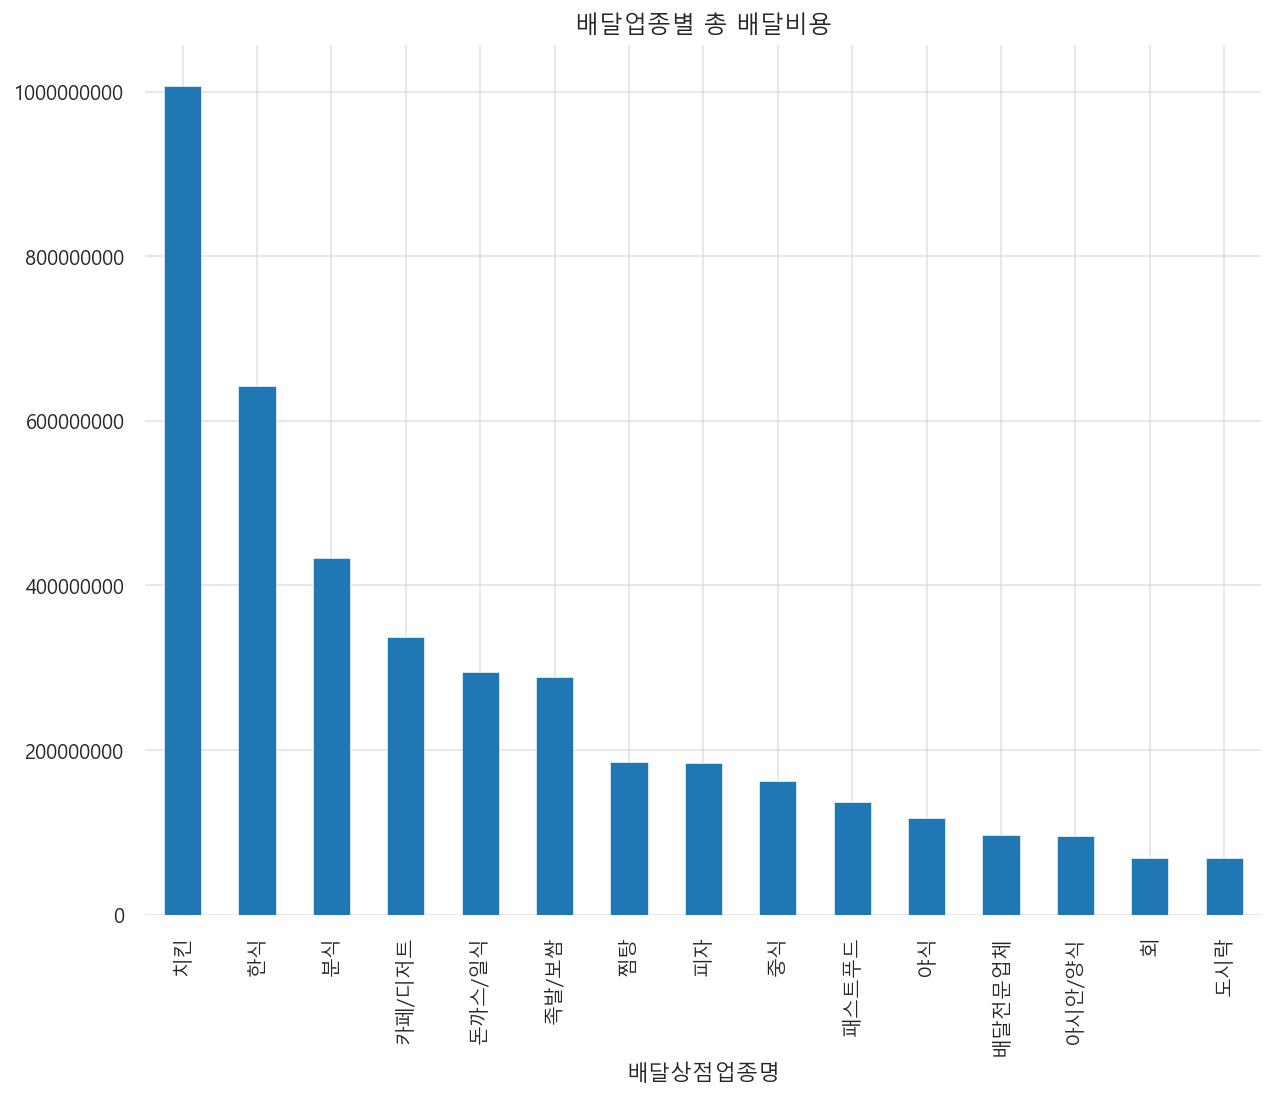

In [474]:
b = data.groupby(['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])['Î∞∞Îã¨ÎπÑÏö©'].\
                                                    sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))
b.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Î∞∞Îã¨ÏóÖÏ¢ÖÎ≥Ñ Ï¥ù Î∞∞Îã¨ÎπÑÏö©')
plt.grid(color='lightgrey', alpha=0.5)

* ÏπòÌÇ®Ïùò Ï¥ù Î∞∞Îã¨ÎπÑÏö©Ïù¥ Ï†úÏùº ÎßéÏïòÏùå
* Î∞∞Îã¨ÎπÑÏö© Ïù¥ÏÉÅÏπò(10000Ïõê Ïù¥ÏÉÅ) Ï†úÍ±∞ ÌõÑ Îã§Ïãú ÌôïÏù∏Ìï¥Î≥º Í≤É!

### Î∞∞Îã¨ÎπÑÏö© 10000Ïõê Ïù¥ÏÉÅÏù∏ 264Í∞ú Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

Î∞∞Îã¨ÎπÑÏö©Ïù¥ 10000Ïõê Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îäî ÏùºÎ∞òÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Ïù¥ÎØÄÎ°ú Ï†úÍ±∞(Î∞∞Îã¨ÎπÑÏö© 10000Ïõê Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îäî 264Í∞úÎ°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏóê ÎπÑÌï¥ ÏÜåÏàòÏù¥ÎØÄÎ°ú Ï†úÍ±∞Ìï¥ÎèÑ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÌõºÏÜêX)

In [475]:
print(data.shape)
data = data.loc[data['Î∞∞Îã¨ÎπÑÏö©'] < 10000]
print(data.shape)

(1110762, 29)
(1110498, 29)


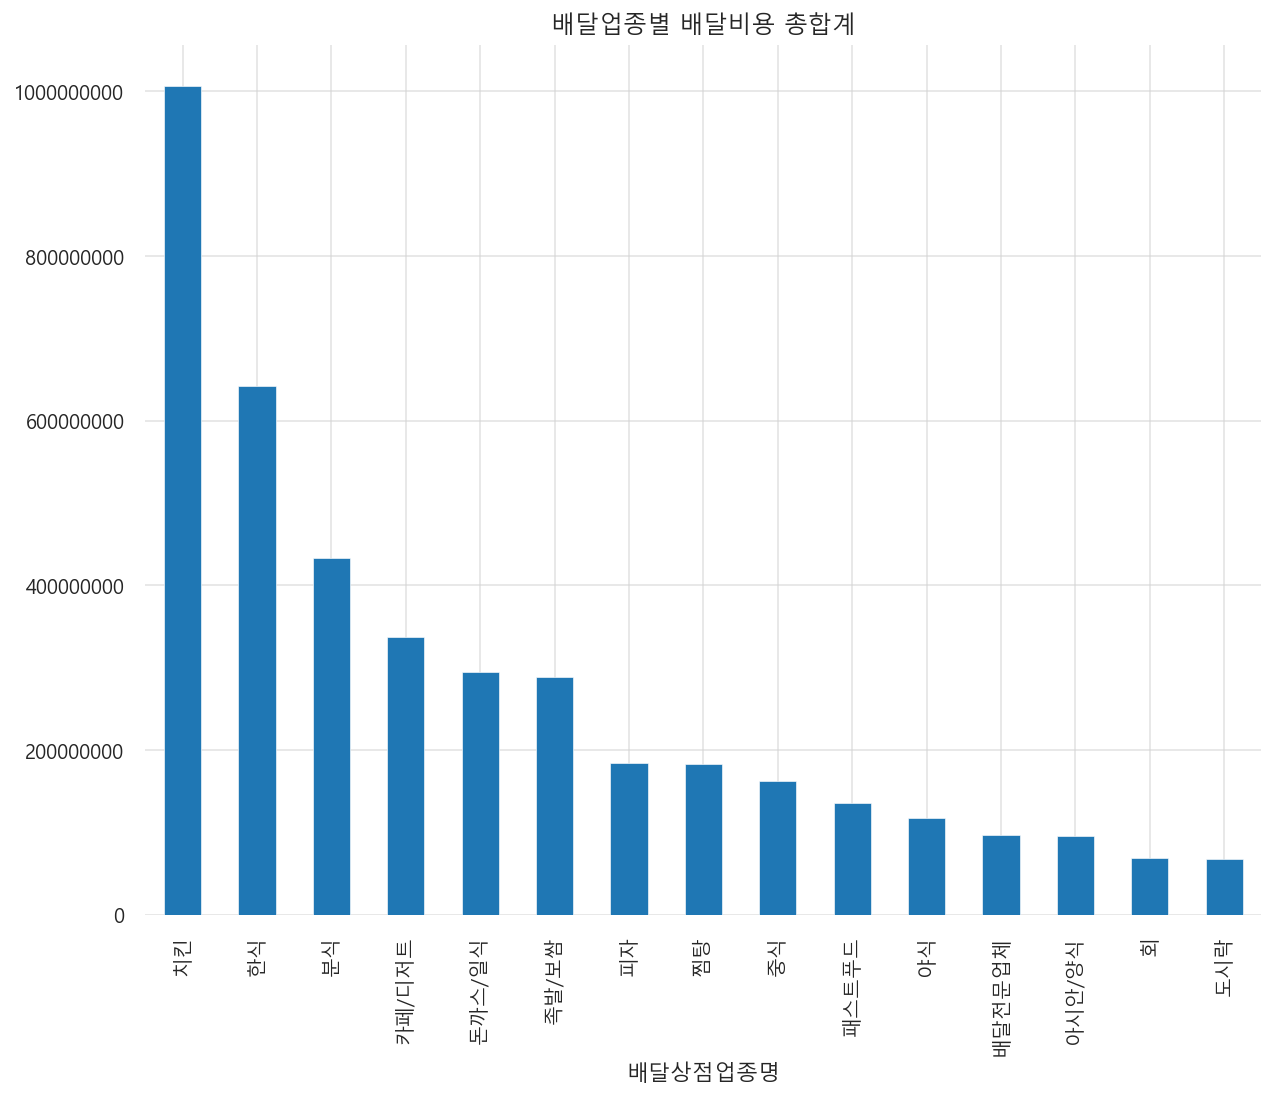

In [476]:
c = data.groupby(['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])['Î∞∞Îã¨ÎπÑÏö©'].\
                                                    sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))
c.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Î∞∞Îã¨ÏóÖÏ¢ÖÎ≥Ñ Î∞∞Îã¨ÎπÑÏö© Ï¥ùÌï©Í≥Ñ')
plt.grid(color='lightgrey', alpha=0.5)

* Î∞∞Îã¨ÎπÑÏö© 10000Ïõê Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Ï†úÍ±∞ÌñàÎçîÎãà Ï†úÍ±∞ Ïù¥Ï†ÑÍ≥º Ï∞®Ïù¥ Î∞úÏÉù
* ÌîºÏûê(8ÏúÑ --> 7ÏúÑ), Ï∞úÌÉï(7ÏúÑ-->8ÏúÑ)

* Î∞∞Îã¨ ÏàòÏöîÍ∞Ä Ï†ÅÏùÄ ÏßÄÏó≠ --> Ïôú Ï†ÅÏóàÎäîÏßÄ Î∞∞Îã¨ÎπÑÏö© Îì± Î∂ÑÏÑù
* ÏµúÏÜåÏ£ºÎ¨∏Í∏àÏï°
* Ïø†Ìå°Ïù¥Ï∏† ÏàòÏàòÎ£å 3%
* ÌäπÏ†ï ÏãúÍ∞ÑÏóê Î∞∞Ï∞®ÏãúÍ∞ÑÏù¥ ÏßÄÏó∞ÎêòÎäî Í≤ΩÏö∞

* Í∞ÄÍ≤å vs Î∞∞Îã¨ÏÑúÎπÑÏä§ 
** Î∞∞Îã¨ÎπÑÏö©, ÏµúÏÜåÏ£ºÎ¨∏Í∏àÏï° **

In [477]:
data['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'].value_counts().sort_values(ascending=False)

ÏπòÌÇ®        270308
ÌïúÏãù        171833
Î∂ÑÏãù        118793
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏     97759
ÎèàÍπåÏä§/ÏùºÏãù     80157
Ï°±Î∞ú/Î≥¥Ïåà      76396
ÌîºÏûê         50214
Ï∞úÌÉï         44332
Ï§ëÏãù         43964
Ìå®Ïä§Ìä∏Ìë∏Îìú      39230
ÏïºÏãù         29792
ÏïÑÏãúÏïà/ÏñëÏãù     25897
Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥     25430
Ìöå          18379
ÎèÑÏãúÎùΩ        18014
Name: Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö, dtype: int64

* Ïù∏Í∏∞ ÏóÖÏ¢Ö: ÏπòÌÇ®, ÌïúÏãù, Î∂ÑÏãù, Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏, ÎèàÍπåÏä§/ÏùºÏãù
* ÎπÑÏù∏Í∏∞ ÏóÖÏ¢Ö: ÎèÑÏãúÎùΩ, Ìöå, ÏïÑÏãúÏïà/ÏñëÏãù, ÏïºÏãù

## Î∞∞Îã¨ÏÉÅÏ†êÍ≥º Î∞∞Îã¨Î™©Ï†ÅÏßÄ ÏúÑÏπò

In [478]:
# Ï§ëÎ≥µ Ìè¨Ìï®
display(data['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô'].value_counts().to_frame())
display(data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô'].value_counts().to_frame().head(18))

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô
Ï§ëÎèô      251567
Ïã¨Í≥°Îèô     196724
Ïò•Í∏∏Îèô     167146
ÏÉÅÎèô      139800
Í¥¥ÏïàÎèô     117867
ÏõêÎØ∏Îèô      46537
ÏÜåÏÇ¨Î≥∏Îèô     41459
Ïó≠Í≥°Îèô      39602
Ïã¨Í≥°Î≥∏Îèô     38908
ÏÜ°ÎÇ¥Îèô      32110
ÏïΩÎåÄÎèô      14800
ÏÇºÏ†ïÎèô       8556
Î≤îÎ∞ïÎèô       6585
ÏÜåÏÇ¨Îèô       4787
ÎèÑÎãπÎèô       2425
ÎÇ¥Îèô         610
Ï∂òÏùòÎèô        537
Ïò§Ï†ïÎèô        478

Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô
Ï§ëÎèô       214462
ÏÉÅÎèô       130442
Ïã¨Í≥°Îèô      114923
Ïò•Í∏∏Îèô      114210
ÏÜåÏÇ¨Î≥∏Îèô      84140
ÏÜ°ÎÇ¥Îèô       70531
Í¥¥ÏïàÎèô       68609
Ïã¨Í≥°Î≥∏Îèô      49188
Î≤îÎ∞ïÎèô       48884
Ïó≠Í≥°Îèô       40734
ÏõêÎØ∏Îèô       30890
Ìï≠Îèô        25354
ÏïΩÎåÄÎèô       20667
Ï∂òÏùòÎèô       18813
ÎèÑÎãπÎèô       11767
ÏÜåÏÇ¨Îèô       10678
ÏÇºÏ†ïÎèô        9442
Î∂ÄÍ∞úÎèô        8068

## Î™©Ï†ÅÏßÄÎ≥Ñ Î∞∞Îã¨ count ÏÉÅÏúÑ top 10

In [479]:
# Ïñ¥Îäê ÎèôÏóêÏÑú Î∞∞Îã¨ Ï£ºÎ¨∏Ïù¥ ÎßéÏïòÎÇò
data.groupby(['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô'])['ÏàúÎ≤à'].count().sort_values(ascending=False)[:10].reset_index().\
rename(columns={'ÏàúÎ≤à':'Î∞∞Îã¨Î™©Ï†ÅÏßÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò'}).style.background_gradient('Blues')

## Î∞∞Îã¨ÏÉÅÏ†ê ÏóÖÏ¢ÖÎ≥Ñ ÏàúÏúÑ(Ï§ëÎ≥µÏùÄ 1ÌöåÎßå count)

In [480]:
# Ï§ëÎèôÏóê ÏπòÌÇ®ÏóÖÏ¢Ö ÏÉÅÏ†êÏù¥ Î™á Í∞ú?
data_where = data.pivot_table(index='Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 
                              columns='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', 
                              values='Î∞∞Îã¨ÏÉÅÏ†êid',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_where

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÎèÑÏãúÎùΩ  ÎèàÍπåÏä§/ÏùºÏãù  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥   Î∂ÑÏãù  ÏïÑÏãúÏïà/ÏñëÏãù  ÏïºÏãù  Ï°±Î∞ú/Î≥¥Ïåà  Ï§ëÏãù  Ï∞úÌÉï   ÏπòÌÇ®  \
0            Í¥¥ÏïàÎèô    0       8       0   15       0   1      4   0   2   36   
1             ÎÇ¥Îèô    0       0       0    0       0   0      4   0   0    0   
2            ÎèÑÎãπÎèô    0       0       0    0       0   1      3   4   1    0   
3            Î≤îÎ∞ïÎèô    1       0       0    6       0   0      2   0   0    3   
4            ÏÇºÏ†ïÎèô    0       0      11    0       0   0      0   0   0    1   
5             ÏÉÅÎèô    4      11       1    9       0   6     18   8   8   33   
6            ÏÜåÏÇ¨Îèô    0       0       0    2       0   8      0   0   1    3   
7           ÏÜåÏÇ¨Î≥∏Îèô    0       0       1    8       2   4      2   9  12   11   
8            ÏÜ°ÎÇ¥Îèô    0       1       0    3       0   2      4   1   0   10   
9            Ïã¨Í≥°Îèô    5       2       7   20       5  39     18  14  13   63   
10          Ïã¨Í≥°Î≥∏Îèô    0       1       1    2       0   6      1   9   0   10   
11           ÏïΩÎåÄÎèô    0       9       0    5       0   0      0   0   0   19   
12           Ïó≠Í≥°Îèô    0       3       0    0       1   3      5   5   3   18   
13           Ïò§Ï†ïÎèô    0       0       0    2       0   0      0   0   0    0   
14           Ïò•Í∏∏Îèô    6      10       2    8       3  11      3   8   8   26   
15           ÏõêÎØ∏Îèô    5       5       0   11       0   7      3   6   8   45   
16            Ï§ëÎèô    9      17       8   39      21   7     19  10  16   47   
17           Ï∂òÏùòÎèô    0       0       0    0       0   0     10   0   0    5   
18           All   30      67      31  130      32  95     96  74  72  330   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  Ìå®Ïä§Ìä∏Ìë∏Îìú  ÌîºÏûê   ÌïúÏãù   Ìöå   All  
0             9      5  17   12   0   109  
1             0      0   0    0   0     4  
2             0      0   0   16   2    27  
3             7      0   0    2   0    21  
4             3     10   0   12   0    37  
5             7      2   6   36   2   151  
6             0      0   0    0   0    14  
7            15      0   3    4   0    71  
8             9      1   3    8   0    42  
9            30     13  20   48  16   313  
10            7      0   0   11   2    50  
11           10      0   0    3   0    46  
12            4      0   0   10   0    52  
13            0      0   0    0   0     2  
14           32      6   5   21   9   158  
15           12      0   5   24   0   131  
16           14      3   4   52  10   276  
17            0      0   0    0   0    15  
18          159     40  63  259  41  1519

In [445]:
data['Î∞∞Îã¨ÏÉÅÏ†êid'].nunique()

1519

* Ïã¨Í≥°Îèô, Ï§ëÎèô, Ïò•Í∏∏Îèô, ÏÉÅÎèô, ÏõêÎØ∏Îèô, Í¥¥ÏïàÎèô ÏàúÏúºÎ°ú Î∞∞Îã¨ÏÉÅÏ†êÏù¥ ÎßéÏùå(6Í∞úÎèôÏóêÎäî 100Í∞ú Ïù¥ÏÉÅÏùò Î∞∞Îã¨ÏÉÅÏ†ê Ï°¥Ïû¨)
* Í∑∏ Ïô∏Ïùò ÎèôÎÑ§Îäî 100Í∞ú ÎØ∏ÎßåÏùò Î∞∞Îã¨ÏÉÅÏ†ê Ï°¥Ïû¨
* ÎèôÎÑ§Î≥ÑÎ°ú Í∞úÏàòÍ∞Ä ÎßéÏùÄ ÏóÖÏ¢ÖÏù¥ ÏûàÏùå<br>
* Î∞∞Îã¨Î™©Ï†ÅÏßÄ(Ï£ºÎ¨∏Í±¥Ïàò Í∏∞Ï§Ä)Îäî Ï§ëÎèô, ÏÉÅÎèô, Ïã¨Í≥°Îèô, Ïò•Í∏∏Îèô, ÏÜåÏÇ¨Î≥∏Îèô, ÏÜ°ÎÇ¥Îèô, Í¥¥ÏïàÎèô, Ïã¨Í≥°Î≥∏Îèô, Î≤îÎ∞ïÎèô, Ïó≠Í≥°Îèô ÏàúÏúºÎ°ú ÎßéÏïòÏùå<br><br>
## üëâ **Í∑∏Î†áÎã§Î©¥, Ï£ºÎ¨∏ÏàòÍ∞Ä ÎßéÏùÄ ÎèôÎÑ§Ïóê Î∞∞Îã¨ÏÉÅÏ†êÏù¥ Ï†ÅÍ≤å ÏúÑÏπòÌï¥ÏûàÎã§Î©¥, ÎèôÎÑ§Î≥ÑÎ°ú Ï∞ΩÏóÖÌïòÎ©¥ Í¥úÏ∞ÆÏùÑ Î∞∞Îã¨ ÏóÖÏ¢ÖÏùÑ Ï∂îÏ≤úÌï¥Ï£ºÎäî Í±¥ Ïñ¥Îñ®Íπå?**

## Î∞∞Îã¨ÏÉÅÏ†ê ÏóÖÏ¢ÖÎ≥Ñ Î∞∞Îã¨ÎπÑÏö© Ï¥ùÌï©

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö          ÏπòÌÇ®         ÌïúÏãù         Î∂ÑÏãù     Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏     ÎèàÍπåÏä§/ÏùºÏãù      Ï°±Î∞ú/Î≥¥Ïåà  \
Î∞∞Îã¨ÎπÑÏö©     1006127028  641783457  433013970  336691020  294978520  288159070   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö         ÌîºÏûê         Ï∞úÌÉï         Ï§ëÏãù      Ìå®Ïä§Ìä∏Ìë∏Îìú         ÏïºÏãù    Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥  \
Î∞∞Îã¨ÎπÑÏö©     184191429  183440040  162178100  136016790  117696853  96636250   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö    ÏïÑÏãúÏïà/ÏñëÏãù         Ìöå       ÎèÑÏãúÎùΩ  
Î∞∞Îã¨ÎπÑÏö©     95569599  68405850  68120090

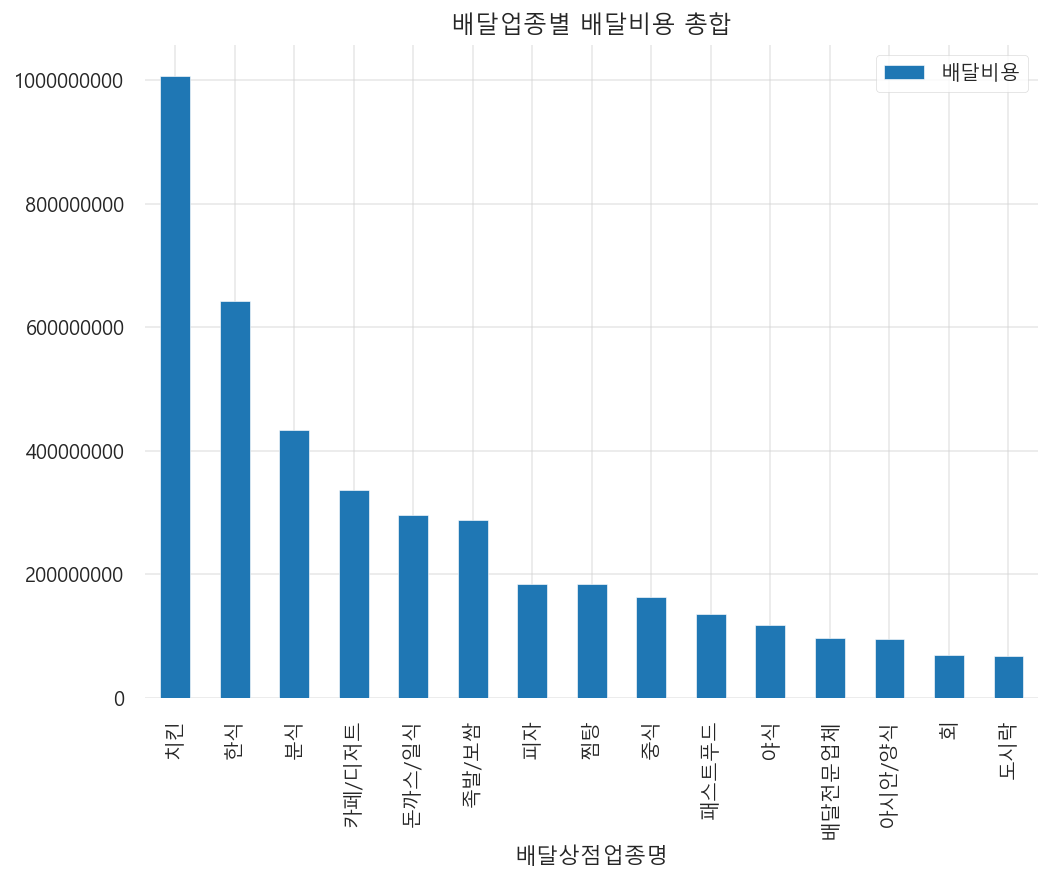

In [481]:
display(data.groupby(['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])['Î∞∞Îã¨ÎπÑÏö©'].sum().sort_values(ascending=False).to_frame().T)
ax = data.groupby(['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])['Î∞∞Îã¨ÎπÑÏö©'].sum().sort_values(ascending=False).to_frame().plot.bar(figsize=(8, 6))
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Î∞∞Îã¨ÏóÖÏ¢ÖÎ≥Ñ Î∞∞Îã¨ÎπÑÏö© Ï¥ùÌï©')
plt.grid(color='lightgrey', alpha=0.43)

## Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°

In [482]:
display(data['Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°'].value_counts().sort_values(ascending=False).\
        head(6).to_frame().style.background_gradient(cmap='gray_r'))
display(data['Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°'].value_counts(normalize=True).head(6).to_frame().style.background_gradient(cmap='Blues'))

* Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° 0ÏõêÏù∏ Í≤ΩÏö∞Í∞Ä Ï†úÏùº ÎßéÏùå: 9% <br><br>
==> Ïø†Ìè∞ Ïì¥ Í±¥Í∞Ä?(Ï∂îÏ†ï) ==> Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° 0ÏõêÏù∏ Í≤ΩÏö∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®ÏãúÌÇ§Í≥† Î∂ÑÏÑùÌï† Í≤ÉÏù∏Í∞Ä? ==> ÏùòÎØ∏ÏûàÎã§Í≥† ÌåêÎã®ÎêòÎØÄÎ°ú Ï†úÍ±∞ÌïòÏßÄ ÏïäÏùå

## Î∞∞Îã¨Í∏∞ÏÇ¨ id

In [519]:
len(data['Î∞∞Îã¨Í∏∞ÏÇ¨id'].value_counts())

1787

In [449]:
# Î∞∞Îã¨Ï∑®ÏÜå? (Î∞∞Îã¨ÏàòÎ†πÏùÄ ÌñàÎäîÎç∞ Î∞∞Îã¨Ï∑®ÏÜåÌïú Í≤ΩÏö∞)
len(data.loc[(data['Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ'].isnull()) & (data['Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ'].notnull())].head(5))

5

* Î∞∞Îã¨ Ï∑®ÏÜåÏãúÌÇ® Í≤ΩÏö∞ <br>
==> drop? ==> Í∞úÏàòÎèÑ Ï†ÅÍ≥† Í∑∏Î†áÍ≤å Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏù¥ ÏïÑÎãàÎØÄÎ°ú Ï†úÍ±∞ÌïòÏßÄ ÏïäÏùå

## Î∂ÄÏ≤ú Ïô∏Ïùò ÏßÄÏó≠?

In [450]:
data.head(1)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34

In [483]:
display(data['Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ'].value_counts())
display(data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ'].value_counts())

Í≤ΩÍ∏∞ÎèÑ    1110498
Name: Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ, dtype: int64

Í≤ΩÍ∏∞ÎèÑ        1050849
ÏÑúÏö∏ÌäπÎ≥ÑÏãú        36183
Ïù∏Ï≤úÍ¥ëÏó≠Ïãú        23462
Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ          1
Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú            1
ÎåÄÍµ¨Í¥ëÏó≠Ïãú            1
Ï†ÑÎùºÎ∂ÅÎèÑ             1
Name: Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ, dtype: int64

* Î∞∞Îã¨Î™©Ï†ÅÏßÄÏóê Í≤ΩÍ∏∞ÎèÑ Ïô∏Ïùò ÏßÄÏó≠ Ï°¥Ïû¨ --> Ï†úÍ±∞

In [484]:
data = data.loc[data['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ'] == 'Í≤ΩÍ∏∞ÎèÑ']
len(data)

1050849

# Ï£ºÏ†ú ÏÑ†Ï†ï Î∞è Î∂ÑÏÑù

**Ï£ºÏ†ú : Î∂ÄÏ≤úÏãúÏóêÏÑú ÏöîÏãùÏóÖÏùÑ ÌïòÎ†§Îäî Ïã†Í∑ú ÏßÑÏûÖ ÏûêÏòÅÏóÖÏûêÎ•º ÏúÑÌïú ÎèôÎÑ§ & ÏóÖÏ¢Ö Ï∂îÏ≤ú**<br>
* Ï∂îÏ≤ú ÏóÖÏ¢Ö<br>
    * ÏàòÏöîÍ∞Ä ÎßéÏùÄ ÏóÖÏ¢Ö Ï∂îÏ≤ú
    * ÏßÄÏó≠ ÎÇ¥ Îß§Ïû• ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏóÖÏ¢ÖÍ≥º, ÌèâÍ∑† Îß§Ï∂úÏù¥ Í∞ÄÏû• Ï†ÅÏùÄ ÏóÖÏ¢ÖÏùÄ ÌîºÌï† Í≤É <br>
    (ÏóÖÏ¢Ö ÏàòÎ°ú Î∞∞Îã¨Îß§Ï∂úÏùÑ ÎÇòÎà† ÌèâÍ∑†Í∞í Íµ¨Ìïú Îí§ ÏóÖÏ¢Ö Îãπ ÌèâÍ∑† Îß§Ï∂ú ÏãúÍ∞ÅÌôî)
<br>
* Ï∂îÏ≤ú ÏßÄÏó≠ <br>
    * Ï£ºÎ¨∏Í±¥ÏàòÍ∞Ä ÎßéÏùÄ ÎèôÎÑ§(Î∞∞Îã¨Î™©Ï†ÅÏßÄ) Í∑ºÏ≤òÏóê Ï∞ΩÏóÖÌïòÎ©¥ Ï†ëÍ∑ºÏÑ±Ïù¥ Ï¢ãÏùÑ Í≤É
    * ÏõîÏÑ∏Í∞Ä ÎπÑÍµêÏ†Å ÎÇÆÏùÄ ÎèôÎÑ§
    * ÏóÖÏ¢Ö Í≤ΩÏüÅÏù¥ Ï†ÅÏùÄ Í≥≥

(Î∞∞Îã¨ ÏßÄÏó≠ - ÏßÄÏó≠-Ï£ºÏöî ÏãúÏû•(Ï§ëÎèô Ï£ºÎ≥Ä ÏßÄÏó≠), 
Ï∞ΩÏóÖÏßÄÏó≠ - ÏõîÏÑ∏Í∞Ä Ï†ÅÏùÄ ÏßÄÏó≠ÏóêÏÑú Ï∞ΩÏóÖ ÌõÑ Î∞∞Îã¨(Ï§ëÎèô Ï£ºÎ≥ÄÎ∂Ä Î∞∞Îã¨Ïù¥ ÏâΩÍ≤å Í∞ÄÎä•ÌïòÎ©¥ÏÑú ÏûÑÎåÄÎ£åÍ∞Ä ÎπÑÍµêÏ†Å Ï†ÄÎ†¥ÌïúÏßÄÏó≠-ÏûÑÎåÄÎ£åÏûêÎ£å Ï∞æÏïÑÎ≥¥Í∏∞, ÏóÖÏ¢Ö Î≥Ñ ÎπÑÍµêÏ†Å Ìï¥Îãπ ÏóÖÏ¢Ö Í≤ΩÏüÅÏù¥ Ï†ÅÏùÄ Í≥≥(ÏóÖÏ¢Ö Î≥ÑÎ°ú ÏßÄÏó≠Î≥Ñ Ïàò ÏãúÍ∞ÅÌôî Í∞ÄÎä•ÌïòÎ©¥ Îèô Î≥ÑÎ°ú ÏµúÎã§ÏóÖÏ¢Ö 3ÏúÑÍπåÏßÄ Î≥¥Ïó¨Ï£ºÍ∏∞))


## ÏóÖÏ¢ÖÍ≥º ÎèôÎÑ§ Ï∂îÏ≤ú

### ÎèôÎÑ§

In [520]:
data.head(2)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   
1  131807 2019-07-10  C000077       2  2019-07-10 15:59:01  S0021648      ÏπòÌÇ®   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   
1  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   
1   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411904853793   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   
1  D0000884  3000          0   23000       1 2019-07-10 15:57:08   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34  
1 2019-07-10 15:57:35 2019-07-10 15:57:48    NaT 2019-07-10 15:59:01

In [521]:
# Í≤ΩÍ∏∞ÎèÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïú dataÎ°ú ÎèôÎÑ§Î≥Ñ ÏóÖÏ¢ÖÎ≥Ñ ÏÉÅÏ†ê Í∞úÏàò
data_where2 = data.pivot_table(index='Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 
                              columns='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', 
                              values='Î∞∞Îã¨ÏÉÅÏ†êid',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_where2

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÎèÑÏãúÎùΩ  ÎèàÍπåÏä§/ÏùºÏãù  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥   Î∂ÑÏãù  ÏïÑÏãúÏïà/ÏñëÏãù  ÏïºÏãù  Ï°±Î∞ú/Î≥¥Ïåà  Ï§ëÏãù  Ï∞úÌÉï   ÏπòÌÇ®  \
0            Í¥¥ÏïàÎèô    0       8       0   15       0   1      4   0   1   36   
1             ÎÇ¥Îèô    0       0       0    0       0   0      4   0   0    0   
2            ÎèÑÎãπÎèô    0       0       0    0       0   1      3   4   1    0   
3            Î≤îÎ∞ïÎèô    1       0       0    6       0   0      2   0   0    3   
4            ÏÇºÏ†ïÎèô    0       0      11    0       0   0      0   0   0    1   
5             ÏÉÅÎèô    4      11       1    9       0   6     18   8   8   33   
6            ÏÜåÏÇ¨Îèô    0       0       0    2       0   8      0   0   1    3   
7           ÏÜåÏÇ¨Î≥∏Îèô    0       0       1    8       2   4      2   9  12   11   
8            ÏÜ°ÎÇ¥Îèô    0       1       0    3       0   2      4   1   0   10   
9            Ïã¨Í≥°Îèô    5       2       7   20       5  39     18  14  13   63   
10          Ïã¨Í≥°Î≥∏Îèô    0       1       1    2       0   6      1   9   0   10   
11           ÏïΩÎåÄÎèô    0       9       0    5       0   0      0   0   0   18   
12           Ïó≠Í≥°Îèô    0       3       0    0       1   3      5   5   3   18   
13           Ïò§Ï†ïÎèô    0       0       0    2       0   0      0   0   0    0   
14           Ïò•Í∏∏Îèô    6      10       2    8       3  11      3   8   8   26   
15           ÏõêÎØ∏Îèô    5       5       0   11       0   7      3   6   8   45   
16            Ï§ëÎèô    9      17       8   39      21   7     19  10  16   47   
17           Ï∂òÏùòÎèô    0       0       0    0       0   0     10   0   0    5   
18           All   30      67      31  130      32  95     96  74  71  329   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  Ìå®Ïä§Ìä∏Ìë∏Îìú  ÌîºÏûê   ÌïúÏãù   Ìöå   All  
0             9      5  15   12   0   106  
1             0      0   0    0   0     4  
2             0      0   0   16   2    27  
3             7      0   0    2   0    21  
4             3     10   0   12   0    37  
5             7      2   6   36   2   151  
6             0      0   0    0   0    14  
7            15      0   3    4   0    71  
8             9      1   3    8   0    42  
9            30     13  20   48  16   313  
10            7      0   0   11   2    50  
11           10      0   0    3   0    45  
12            4      0   0   10   0    52  
13            0      0   0    0   0     2  
14           32      6   5   21   9   158  
15           12      0   5   24   0   131  
16           14      3   4   52  10   276  
17            0      0   0    0   0    15  
18          159     40  61  259  41  1515

In [522]:
data_where_top = data_where2.sort_values('All', ascending=False).iloc[1:, [0, -1]]
data_where_top.columns=['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò']
data_where_top.reset_index(drop=True, inplace=True)
data_where_top

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò
0       Ïã¨Í≥°Îèô     313
1        Ï§ëÎèô     276
2       Ïò•Í∏∏Îèô     158
3        ÏÉÅÎèô     151
4       ÏõêÎØ∏Îèô     131
5       Í¥¥ÏïàÎèô     106
6      ÏÜåÏÇ¨Î≥∏Îèô      71
7       Ïó≠Í≥°Îèô      52
8      Ïã¨Í≥°Î≥∏Îèô      50
9       ÏïΩÎåÄÎèô      45
10      ÏÜ°ÎÇ¥Îèô      42
11      ÏÇºÏ†ïÎèô      37
12      ÎèÑÎãπÎèô      27
13      Î≤îÎ∞ïÎèô      21
14      Ï∂òÏùòÎèô      15
15      ÏÜåÏÇ¨Îèô      14
16       ÎÇ¥Îèô       4
17      Ïò§Ï†ïÎèô       2

In [527]:
data_destination = \
data.groupby(['Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô'])['ÏàúÎ≤à'].count().sort_values(ascending=False).\
                                            reset_index().rename(columns={'ÏàúÎ≤à':'Î∞∞Îã¨Î™©Ï†ÅÏßÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò'})
data_destination

Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò
0         Ï§ëÎèô       214461
1         ÏÉÅÎèô       130441
2        Ïã¨Í≥°Îèô       114922
3        Ïò•Í∏∏Îèô       114210
4       ÏÜåÏÇ¨Î≥∏Îèô        84140
5        ÏÜ°ÎÇ¥Îèô        70531
6        Í¥¥ÏïàÎèô        68609
7       Ïã¨Í≥°Î≥∏Îèô        49188
8        Î≤îÎ∞ïÎèô        48884
9        Ïó≠Í≥°Îèô        40734
10       ÏõêÎØ∏Îèô        30890
11       ÏïΩÎåÄÎèô        20667
12       Ï∂òÏùòÎèô        18813
13       ÎèÑÎãπÎèô        11767
14       ÏÜåÏÇ¨Îèô        10678
15       ÏÇºÏ†ïÎèô         9442
16        ÎÇ¥Îèô         6172
17       Ïò§Ï†ïÎèô         1464
18       Í≥ÑÏàòÎèô         1297
19       ÏõêÏ¢ÖÎèô          775
20       Í≥ºÎ¶ºÎèô          718
21       Ïó¨ÏõîÎèô          703
22       Í¥ëÎ™ÖÎèô          378
23       ÎåÄÏïºÎèô          362
24        ÏûëÎèô          279
25       Í≥†Í∞ïÎèô          170
26       ÏùÄÌñâÎèô          100
27       ÎåÄÏû•Îèô           18
28       ÌïòÏïàÎèô           10
29      ÎÖ∏Ïò®ÏÇ¨Îèô            9
30      Î¨¥ÏßÄÎÇ¥Îèô            7
31       Ï≤†ÏÇ∞Îèô            5
32       Ïã†Ï≤úÎèô            2
33       ÏïàÌòÑÎèô            1
34       Ï°∞Ï¢ÖÎ©¥            1
35       Íµ¨ÏÇ∞Îèô            1

In [524]:
data_merge = pd.concat([data_destination, data_where_top], axis=1)
data_merge

Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò
0         Ï§ëÎèô       214461      Ïã¨Í≥°Îèô  313.00
1         ÏÉÅÎèô       130441       Ï§ëÎèô  276.00
2        Ïã¨Í≥°Îèô       114922      Ïò•Í∏∏Îèô  158.00
3        Ïò•Í∏∏Îèô       114210       ÏÉÅÎèô  151.00
4       ÏÜåÏÇ¨Î≥∏Îèô        84140      ÏõêÎØ∏Îèô  131.00
5        ÏÜ°ÎÇ¥Îèô        70531      Í¥¥ÏïàÎèô  106.00
6        Í¥¥ÏïàÎèô        68609     ÏÜåÏÇ¨Î≥∏Îèô   71.00
7       Ïã¨Í≥°Î≥∏Îèô        49188      Ïó≠Í≥°Îèô   52.00
8        Î≤îÎ∞ïÎèô        48884     Ïã¨Í≥°Î≥∏Îèô   50.00
9        Ïó≠Í≥°Îèô        40734      ÏïΩÎåÄÎèô   45.00
10       ÏõêÎØ∏Îèô        30890      ÏÜ°ÎÇ¥Îèô   42.00
11       ÏïΩÎåÄÎèô        20667      ÏÇºÏ†ïÎèô   37.00
12       Ï∂òÏùòÎèô        18813      ÎèÑÎãπÎèô   27.00
13       ÎèÑÎãπÎèô        11767      Î≤îÎ∞ïÎèô   21.00
14       ÏÜåÏÇ¨Îèô        10678      Ï∂òÏùòÎèô   15.00
15       ÏÇºÏ†ïÎèô         9442      ÏÜåÏÇ¨Îèô   14.00
16        ÎÇ¥Îèô         6172       ÎÇ¥Îèô    4.00
17       Ïò§Ï†ïÎèô         1464      Ïò§Ï†ïÎèô    2.00
18       Í≥ÑÏàòÎèô         1297      NaN     NaN
19       ÏõêÏ¢ÖÎèô          775      NaN     NaN
20       Í≥ºÎ¶ºÎèô          718      NaN     NaN
21       Ïó¨ÏõîÎèô          703      NaN     NaN
22       Í¥ëÎ™ÖÎèô          378      NaN     NaN
23       ÎåÄÏïºÎèô          362      NaN     NaN
24        ÏûëÎèô          279      NaN     NaN
25       Í≥†Í∞ïÎèô          170      NaN     NaN
26       ÏùÄÌñâÎèô          100      NaN     NaN
27       ÎåÄÏû•Îèô           18      NaN     NaN
28       ÌïòÏïàÎèô           10      NaN     NaN
29      ÎÖ∏Ïò®ÏÇ¨Îèô            9      NaN     NaN
30      Î¨¥ÏßÄÎÇ¥Îèô            7      NaN     NaN
31       Ï≤†ÏÇ∞Îèô            5      NaN     NaN
32       Ïã†Ï≤úÎèô            2      NaN     NaN
33       ÏïàÌòÑÎèô            1      NaN     NaN
34       Ï°∞Ï¢ÖÎ©¥            1      NaN     NaN
35       Íµ¨ÏÇ∞Îèô            1      NaN     NaN

* Î∞∞Îã¨Î™©Ï†ÅÏßÄ(Ï£ºÎ¨∏Í±¥Ïàò)ÏôÄ Î∞∞Îã¨ÏÉÅÏ†ê(ÏÉÅÏ†êÍ∞úÏàò) ÏßÄÏó≠ Ï§ë ÏÉÅÏúÑ top10 ÏïàÏóê Í≤πÏπòÎäî ÏßÄÏó≠ <br>
    * Ï§ëÎèô, Ïã¨Í≥°Îèô, ÏÉÅÎèô, Ïò•Í∏∏Îèô, ÏÜåÏÇ¨Î≥∏Îèô, Í¥¥ÏïàÎèô, Ïó≠Í≥°Îèô, Ïã¨Í≥°Î≥∏Îèô
* Ïö∞Î¶¨Í∞Ä ÏïåÍ≥†Ïûê ÌïòÎäî Í≤ÉÏùÄ
    * Ï£ºÎ¨∏Í±¥ÏàòÍ∞Ä ÎßéÏùÄ Î∞∞Îã¨Î™©Ï†ÅÏßÄÏù¥Î©¥ÏÑú Î∞∞Îã¨ÏÉÅÏ†êÏùÄ ÎßéÏßÄ ÏïäÏùÄ ÏßÄÏó≠
    * Î∞∞Îã¨Î™©Ï†ÅÏßÄ & Î∞∞Îã¨ÏÉÅÏ†êÏúºÎ°ú Ïù∏Í∏∞ÎßéÏùÄ top4 ÎèôÎÑ§Ïù∏, **Ï§ëÎèô, Ïã¨Í≥°Îèô, ÏÉÅÎèô, Ïò•Í∏∏Îèô**Ïùò Í∑ºÏ≤òÏóê ÏúÑÏπòÌïú ÎèôÎÑ§Ïù¥Î©¥ÏÑú Ïõî ÏûÑÎåÄÎ£åÍ∞Ä ÎπÑÍµêÏ†Å Ï†ÄÎ†¥Ìïú ÏßÄÏó≠ÏùÑ ÏÑ†ÌÉùÌïòÏûê! 

### Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞: Î∂ÄÏ≤úÏãú ÌñâÏ†ïÎèôÎ≥Ñ Ïã§Í±∞ÎûòÍ∞Ä

Î∂ÄÏ≤úÏãú ÏÉÅÏóÖÏóÖÎ¨¥Ïö©(Îß§Îß§) Ïã§Í±∞ÎûòÍ∞Ä Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞ ÌôúÏö©
* 2020.05~2021.04
* ÏõîÏÑ∏ Îç∞Ïù¥ÌÑ∞Îäî ÏïÑÎãàÏßÄÎßå Îß§Îß§Í∞ÄÍ∞Ä ÎÜíÏúºÎ©¥ Ï†ÑÏõîÏÑ∏ Í∞ÄÍ≤©ÎèÑ ÎÜíÏùÑ Í≤ÉÏù¥ÎùºÎäî Ï†ÑÏ†ú
* **ÏùåÏãùÏ†ê Ï∞ΩÏóÖÏùÑ Ìï† Îïå ÎπÑÍµêÏ†Å Ï†ÄÎ†¥Ìïú ÎèôÎÑ§Î•º Ï∞æÍ∏∞ ÏúÑÌïú Î™©Ï†Å**

**Actual Transaction Price(ATP)**

ÏùºÎ∞òÏùåÏãùÏ†ê(Ï†ú2Ï¢Ö Í∑ºÎ¶∞ÏãúÏÑ§)ÏùÄ ÏùºÎ∞òÏÉÅÏóÖ, ÏùºÎ∞òÏ£ºÍ±∞ÏôÄ Ï§ÄÏ£ºÍ±∞ÏßÄÏó≠Ïóê ÏûÖÏ†ê Í∞ÄÎä•(Ï†ÑÏö©Ï£ºÍ±∞ÏßÄÏó≠ÏóêÎäî Î∂àÍ∞ÄÎä•)

In [492]:
atp = pd.read_excel('./ÏÉÅÏóÖÏóÖÎ¨¥Ïö©(Îß§Îß§)_Ïã§Í±∞ÎûòÍ∞Ä.xlsx')
print(atp.shape)
atp.head()

(1770, 16)


ÏãúÍµ∞Íµ¨  Ïú†Ìòï   ÏßÄÎ≤à       ÎèÑÎ°úÎ™Ö     Ïö©ÎèÑÏßÄÏó≠   Í±¥Ï∂ïÎ¨ºÏ£ºÏö©ÎèÑ   ÎèÑÎ°úÏ°∞Í±¥  Ï†ÑÏö©/Ïó∞Î©¥Ï†Å(„é°) ÎåÄÏßÄÎ©¥Ï†Å(„é°)  \
0  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  ÏùºÎ∞ò  3**       Ïó≠Í≥°Î°ú  Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞  Ï†ú1Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú  25mÏù¥ÏÉÅ     910.35  619.40   
1  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  ÏùºÎ∞ò  3**  Ïó≠Í≥°Î°ú504Î≤àÍ∏∏  Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞  Ï†ú1Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú  12mÎØ∏Îßå     397.32  354.50   
2  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  ÏßëÌï©  3**       ÏõêÏ¢ÖÎ°ú  Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞       ÏóÖÎ¨¥  25mÎØ∏Îßå      96.97           
3  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  ÏßëÌï©  3**   Í≥†Î¶¨Ïö∏Î°ú8Î≤àÍ∏∏  Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞  Ï†ú1Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú  12mÎØ∏Îßå      51.66           
4  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  ÏßëÌï©  3**  Í≥†Î¶¨Ïö∏Î°ú28Î≤àÍ∏∏  Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞  Ï†ú1Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú  12mÎØ∏Îßå      44.00           

  Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)    Ï∏µ    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº ÏßÄÎ∂ÑÍµ¨Î∂Ñ  Í±¥Ï∂ïÎÖÑÎèÑ  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº  
0  262,300  NaN  202005    1       1988      NaN  
1  117,700  NaN  202005   19       1991      NaN  
2   22,000 6.00  202005   28       2015      NaN  
3   27,000 1.00  202006    5       2020      NaN  
4   10,500  NaN  202006   27       2002      NaN

In [493]:
atp['Ïö©ÎèÑÏßÄÏó≠'].value_counts()

ÏùºÎ∞òÏÉÅÏóÖ       722
Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞    470
Ï§ëÏã¨ÏÉÅÏóÖ       236
Ï†ú3Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞    140
ÏùºÎ∞òÍ≥µÏóÖ        77
Ï§ÄÏ£ºÍ±∞         58
Ï§ÄÍ≥µÏóÖ         39
Ï†ú1Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞     12
ÏûêÏó∞ÎÖπÏßÄ        12
Í∞úÎ∞úÏ†úÌïúÍµ¨Ïó≠       3
Í∑ºÎ¶∞ÏÉÅÏóÖ         1
Name: Ïö©ÎèÑÏßÄÏó≠, dtype: int64

In [494]:
atp['Í±¥Ï∂ïÎ¨ºÏ£ºÏö©ÎèÑ'].value_counts()

Ï†ú2Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú    723
Ï†ú1Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú    595
ÏóÖÎ¨¥         196
ÌåêÎß§          84
Í∏∞ÌÉÄ          68
ÍµêÏú°Ïó∞Íµ¨        61
ÏàôÎ∞ï          43
Name: Í±¥Ï∂ïÎ¨ºÏ£ºÏö©ÎèÑ, dtype: int64

* Í±¥Ï∂ïÎ¨ºÏ£ºÏö©ÎèÑÏóêÏÑú Ï†ú2Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú ÎπºÍ≥† Ï†úÍ±∞

In [495]:
# Ï†ú2Ï¢Ö Í∑ºÎ¶∞ÏÉùÌôú Îç∞Ïù¥ÌÑ∞Îßå ÎÇ®Í∏∞Í≥† Í∑∏ Ïô∏ Ïö©ÎèÑÎäî Ï†úÍ±∞ 
# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥† Í∑∏ Ïô∏ Ï†úÍ±∞
atp.query("Í±¥Ï∂ïÎ¨ºÏ£ºÏö©ÎèÑ == 'Ï†ú2Ï¢ÖÍ∑ºÎ¶∞ÏÉùÌôú'", inplace=True)
atp = atp[['ÏãúÍµ∞Íµ¨', 'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)', 'Í≥ÑÏïΩÎÖÑÏõî']]
print(atp.shape)
atp.head()

(723, 3)


ÏãúÍµ∞Íµ¨ Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)    Í≥ÑÏïΩÎÖÑÏõî
12  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  192,500  202007
13  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô  212,500  202007
28  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô   12,000  202012
31  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô   10,000  202102
37  Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú Í≥†Í∞ïÎèô   17,500  202103

In [496]:
# ÏãúÍµ∞Íµ¨ÏóêÏÑú ÎèôÎßå ÎÇ®Í∏∞Í≥† Ï†úÍ±∞
def dong(row):
    if pd.isnull(row):
        return np.nan
    else:
        return row.split(' ')[2]
    
atp['ÏùçÎ©¥Îèô'] = atp['ÏãúÍµ∞Íµ¨'].apply(dong)
atp.drop(columns='ÏãúÍµ∞Íµ¨', axis=1, inplace=True)
cols = ['ÏùçÎ©¥Îèô', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)']
atp = atp[cols]
atp.sample(7)

ÏùçÎ©¥Îèô    Í≥ÑÏïΩÎÖÑÏõî Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)
649     ÏÉÅÎèô  202103   19,500
1372    Ï§ëÎèô  202005   16,333
1309   ÏõêÏ¢ÖÎèô  202009   40,700
1640    Ï§ëÎèô  202102   83,000
322     ÏÉÅÎèô  202006   15,000
1048  Ïã¨Í≥°Î≥∏Îèô  202006   19,000
688     ÏÉÅÎèô  202104    9,900

In [497]:
# ÎèôÎÑ§Î≥Ñ ÌèâÍ∑† Í±∞ÎûòÍ∞Ä
atp['Í±∞ÎûòÍ∏àÏï°'] = atp['Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)'].str.replace(',', '').astype('int') * 10000
atp_mean = atp.groupby(['ÏùçÎ©¥Îèô'])['Í±∞ÎûòÍ∏àÏï°'].mean().reset_index().sort_values(by='Í±∞ÎûòÍ∏àÏï°', ascending=False)
atp_mean = atp_mean.reset_index(drop=True)
atp_mean

ÏùçÎ©¥Îèô         Í±∞ÎûòÍ∏àÏï°
0     ÏûëÎèô 816780000.00
1    Í≥†Í∞ïÎèô 737333333.33
2    Ï∂òÏùòÎèô 648344234.67
3    Ïò•Í∏∏Îèô 521129583.33
4    Ïó≠Í≥°Îèô 465166666.67
5    ÏÜ°ÎÇ¥Îèô 450928108.31
6    ÏÇºÏ†ïÎèô 444850000.00
7   ÏÜåÏÇ¨Î≥∏Îèô 419157008.00
8   Ïã¨Í≥°Î≥∏Îèô 399595172.89
9    Ïã¨Í≥°Îèô 386080346.67
10    ÏÉÅÎèô 361376840.24
11    Ï§ëÎèô 346556493.68
12   Í¥¥ÏïàÎèô 338807812.50
13   Î≤îÎ∞ïÎèô 324625000.00
14   ÏïΩÎåÄÎèô 308333333.33
15   ÎèÑÎãπÎèô 248506540.80
16   ÏõêÎØ∏Îèô 240300318.12
17   Ïó¨ÏõîÎèô 210500000.00
18   ÏõêÏ¢ÖÎèô 185456486.62
19    ÎÇ¥Îèô 149634932.57
20   Ïò§Ï†ïÎèô 121338784.00
21   ÏÜåÏÇ¨Îèô -19271698.29

* ÏµúÍ∑º 1ÎÖÑÍ∞Ñ Ïã§Í±∞ÎûòÍ∞Ä ÌèâÍ∑†ÏùÄ Ïò§Ï†ïÎèô, ÎÇ¥Îèô, ÏõêÏ¢ÖÎèô, Ïó¨ÏõîÎèô, ÏõêÎØ∏Îèô, ÎèÑÎãπÎèô, ÏïΩÎåÄÎèô, Î≤îÎ∞ïÎèô, Í¥¥ÏïàÎèô, Ï§ëÎèô, ÏÉÅÎèô, Ïã¨Í≥°Îèô, Ïã¨Í≥°Î≥∏Îèô Îì± ÏàúÏÑúÎ°ú ÎÇÆÏïòÏùå(ÎßàÏù¥ÎÑàÏä§ Í∞ÄÍ≤©ÎåÄÏù∏ ÏÜåÏÇ¨ÎèôÏùÄ Ï†úÏô∏-->Ïù¥ÏÉÅÏπòÏùº Í≤É Í∞ôÏùå)

### ÏóÖÏ¢Ö

**Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏöîÍ∞Ä ÎßéÏùÄ ÏóÖÏ¢Ö Ï∂îÏ≤ú(Î∞∞Îã¨Í±¥Ïàò Í∏∞Ï§Ä)** <br>
* **Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏöîÍ∞Ä Ï†ÅÏùÄ ÏóÖÏ¢ÖÏùÄ 1Ï∞®Ï†ÅÏúºÎ°ú Ï†úÏô∏**
<br>(Î∂ÄÏ≤úÏãú Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏöîÍ∞Ä Ï†ÅÏùÄ ÏóÖÏ¢ÖÏùÄ Ïù∏Í∏∞Í∞Ä Ï†ÅÏùÄ ÏóÖÏ¢ÖÏúºÎ°ú ÌåêÎã®, Ï∞ΩÏóÖ Ï∂îÏ≤úÌïòÏßÄ ÏïäÏùå)
<br><br>

**ÏßÄÏó≠ ÎÇ¥ Îß§Ïû• ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏóÖÏ¢Ö(Î∞∞Îã¨ÏÉÅÏ†ê Í∏∞Ï§Ä)Í≥º, ÌèâÍ∑† Îß§Ï∂úÏù¥ Í∞ÄÏû• Ï†ÅÏùÄ ÏóÖÏ¢ÖÏùÄ ÌîºÌï† Í≤É(Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° Í∏∞Ï§Ä)**

In [528]:
data.head(3)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   
1  131807 2019-07-10  C000077       2  2019-07-10 15:59:01  S0021648      ÏπòÌÇ®   
2  132366 2019-07-10  C000077       2  2019-07-10 15:51:52  S0021648      ÏπòÌÇ®   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   
1  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   
2  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   
1   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411904853793   
2   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   
1  D0000884  3000          0   23000       1 2019-07-10 15:57:08   
2  D0000884  3000          0   23000       3 2019-07-10 15:49:46   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34  
1 2019-07-10 15:57:35 2019-07-10 15:57:48    NaT 2019-07-10 15:59:01  
2 2019-07-10 15:50:13 2019-07-10 15:50:49    NaT 2019-07-10 15:51:52

In [529]:
# Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏöî ÎßéÏùÄ ÏóÖÏ¢Ö
'''d = data.pivot_table(index='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', columns='Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', values='ÏàúÎ≤à', aggfunc='count')
d.columns=['Í¥¥ÏïàÎèô', 'ÎÇ¥Îèô', 'ÎèÑÎãπÎèô', 'Î≤îÎ∞ïÎèô', 'ÏÇºÏ†ïÎèô', 'ÏÉÅÎèô', 'ÏÜåÏÇ¨Îèô', 'ÏÜåÏÇ¨Î≥∏Îèô', 'ÏÜ°ÎÇ¥Îèô', 'Ïã¨Í≥°Îèô',
       'Ïã¨Í≥°Î≥∏Îèô', 'ÏïΩÎåÄÎèô', 'Ïó≠Í≥°Îèô', 'Ïò§Ï†ïÎèô', 'Ïò•Í∏∏Îèô', 'ÏõêÎØ∏Îèô', 'Ï§ëÎèô', 'Ï∂òÏùòÎèô']
d = d.reset_index()
d'''

data_order_count = data.groupby(['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])['ÏàúÎ≤à'].count().sort_values(ascending=False).\
                    reset_index().rename(columns={'ÏàúÎ≤à':'Ï£ºÎ¨∏Í±¥Ïàò'})
# ÎπÑÏ§ë
for i in range(len(data_order_count)):
    data_order_count['ÎπÑÏ§ë'] = data_order_count['Ï£ºÎ¨∏Í±¥Ïàò'] / data_order_count['Ï£ºÎ¨∏Í±¥Ïàò'].sum() * 100

data_order_count

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö    Ï£ºÎ¨∏Í±¥Ïàò    ÎπÑÏ§ë
0       ÏπòÌÇ®  254855 24.25
1       ÌïúÏãù  165278 15.73
2       Î∂ÑÏãù  110972 10.56
3   Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏   92982  8.85
4   ÎèàÍπåÏä§/ÏùºÏãù   73734  7.02
5    Ï°±Î∞ú/Î≥¥Ïåà   71933  6.85
6       ÌîºÏûê   48321  4.60
7       Ï§ëÏãù   41897  3.99
8       Ï∞úÌÉï   40301  3.84
9    Ìå®Ïä§Ìä∏Ìë∏Îìú   38266  3.64
10      ÏïºÏãù   28115  2.68
11  ÏïÑÏãúÏïà/ÏñëÏãù   25085  2.39
12  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥   24558  2.34
13     ÎèÑÏãúÎùΩ   17361  1.65
14       Ìöå   17191  1.64

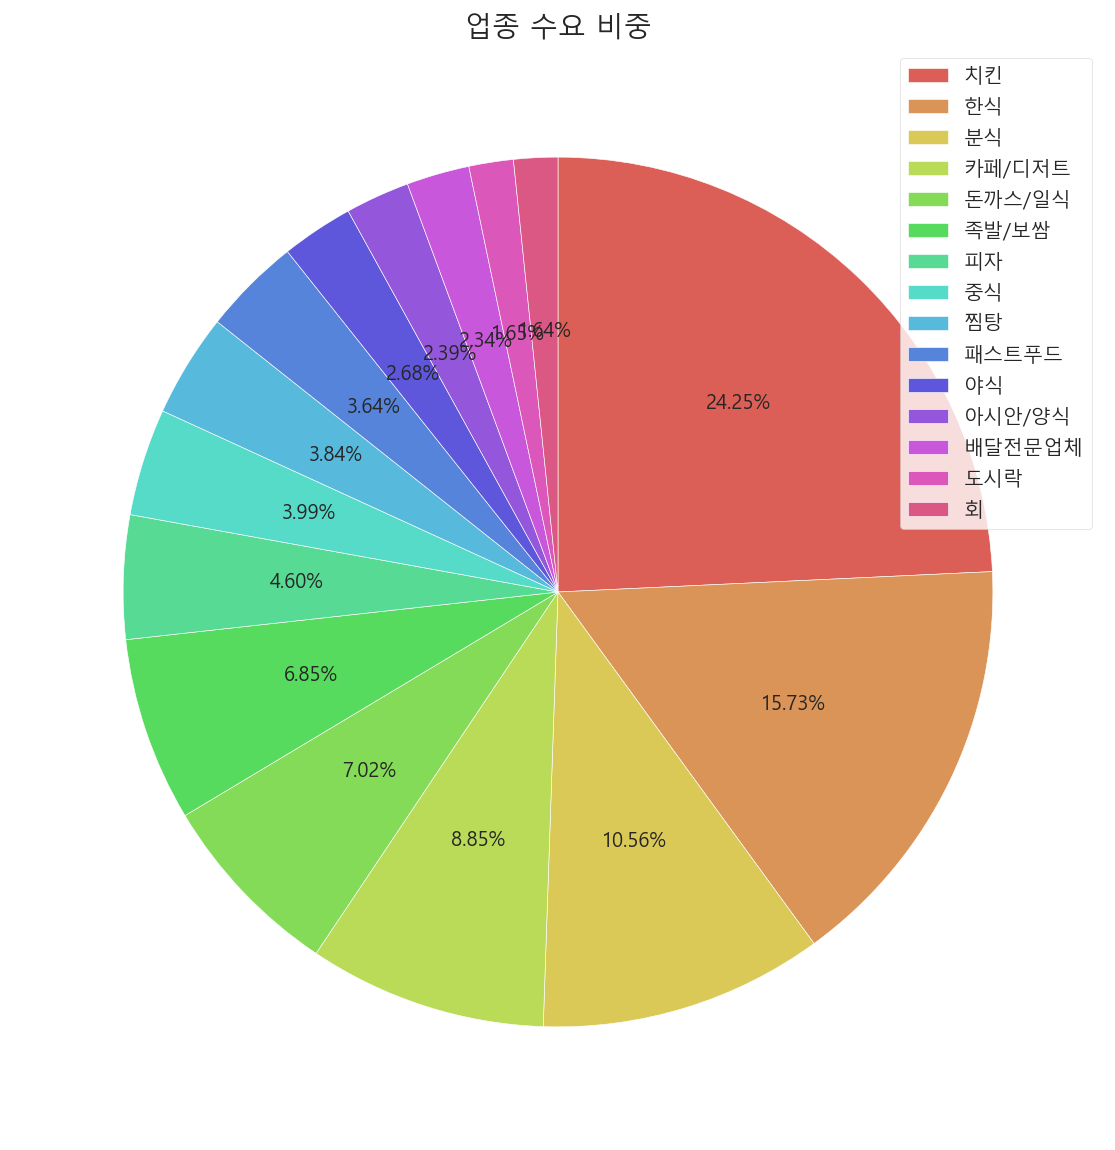

In [530]:
colors = sns.color_palette('hls',len(data_order_count)) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(data_order_count['ÎπÑÏ§ë'], ## ÌååÏù¥Ï∞®Ìä∏ Ï∂úÎ†•
       startangle=90, ## ÏãúÏûëÏ†êÏùÑ 90ÎèÑ(degree)Î°ú ÏßÄÏ†ï
       counterclock=False, ## ÏãúÍ≥Ñ Î∞©Ìñ•ÏúºÎ°ú Í∑∏Î¶∞Îã§.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('ÏóÖÏ¢Ö ÏàòÏöî ÎπÑÏ§ë', fontsize=14)
plt.legend(pie[0],data_order_count['Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö']) 

* Î∞∞Îã¨ ÎπÑÏ§ëÏù¥ Ï†ÅÏùÄ ÏóÖÏ¢ÖÏùÄ Ï†úÍ±∞ ÏòàÏ†ï
* ÎèôÎÑ§Î≥ÑÎ°ú Ïñ¥Îñ§ ÏóÖÏ¢ÖÏùò ÏÉÅÏ†êÎì§Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏

* **Ï£ºÎ¨∏Í±¥Ïàò ÏÉÅÏúÑ 7Í∞ú ÏóÖÏ¢Ö: ÏπòÌÇ®(24.25%), ÌïúÏãù (15.73%), Î∂ÑÏãù (10.56%), Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏ (8.85%), ÎèàÍπåÏä§/ÏùºÏãù(7.02%), Ï°±Î∞ú/Î≥¥Ïåà(6.85%), ÌîºÏûê(4.60%)**

### ÎèôÎÑ§Î≥Ñ ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö Í∞ÄÍ≤å(Í∞ÄÍ≤å Ïàò)

In [502]:
data_where2.sort_values(by='All', ascending=False).head(10)

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÎèÑÏãúÎùΩ  ÎèàÍπåÏä§/ÏùºÏãù  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥   Î∂ÑÏãù  ÏïÑÏãúÏïà/ÏñëÏãù  ÏïºÏãù  Ï°±Î∞ú/Î≥¥Ïåà  Ï§ëÏãù  Ï∞úÌÉï   ÏπòÌÇ®  \
18           All   30      67      31  130      32  95     96  74  71  329   
9            Ïã¨Í≥°Îèô    5       2       7   20       5  39     18  14  13   63   
16            Ï§ëÎèô    9      17       8   39      21   7     19  10  16   47   
14           Ïò•Í∏∏Îèô    6      10       2    8       3  11      3   8   8   26   
5             ÏÉÅÎèô    4      11       1    9       0   6     18   8   8   33   
15           ÏõêÎØ∏Îèô    5       5       0   11       0   7      3   6   8   45   
0            Í¥¥ÏïàÎèô    0       8       0   15       0   1      4   0   1   36   
7           ÏÜåÏÇ¨Î≥∏Îèô    0       0       1    8       2   4      2   9  12   11   
12           Ïó≠Í≥°Îèô    0       3       0    0       1   3      5   5   3   18   
10          Ïã¨Í≥°Î≥∏Îèô    0       1       1    2       0   6      1   9   0   10   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  Ìå®Ïä§Ìä∏Ìë∏Îìú  ÌîºÏûê   ÌïúÏãù   Ìöå   All  
18          159     40  61  259  41  1515  
9            30     13  20   48  16   313  
16           14      3   4   52  10   276  
14           32      6   5   21   9   158  
5             7      2   6   36   2   151  
15           12      0   5   24   0   131  
0             9      5  15   12   0   106  
7            15      0   3    4   0    71  
12            4      0   0   10   0    52  
10            7      0   0   11   2    50

In [503]:
# for i in data_where.columns[1:-1]:
#     print(f"{i} ÏÉÅÏúÑ 3Í∞ú ÏßÄÏó≠: \n{data_where.sort_values(by=i, ascending=False).head(4)['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô'][1:].values}",
#          end='\n\n')

In [504]:
data_where_T = data_where2.set_index('Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô').T
data_where_T

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Í¥¥ÏïàÎèô  ÎÇ¥Îèô  ÎèÑÎãπÎèô  Î≤îÎ∞ïÎèô  ÏÇºÏ†ïÎèô   ÏÉÅÎèô  ÏÜåÏÇ¨Îèô  ÏÜåÏÇ¨Î≥∏Îèô  ÏÜ°ÎÇ¥Îèô  Ïã¨Í≥°Îèô  Ïã¨Í≥°Î≥∏Îèô  ÏïΩÎåÄÎèô  Ïó≠Í≥°Îèô  \
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö                                                                      
ÎèÑÏãúÎùΩ         0   0    0    1    0    4    0     0    0    5     0    0    0   
ÎèàÍπåÏä§/ÏùºÏãù      8   0    0    0    0   11    0     0    1    2     1    9    3   
Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥      0   0    0    0   11    1    0     1    0    7     1    0    0   
Î∂ÑÏãù         15   0    0    6    0    9    2     8    3   20     2    5    0   
ÏïÑÏãúÏïà/ÏñëÏãù      0   0    0    0    0    0    0     2    0    5     0    0    1   
ÏïºÏãù          1   0    1    0    0    6    8     4    2   39     6    0    3   
Ï°±Î∞ú/Î≥¥Ïåà       4   4    3    2    0   18    0     2    4   18     1    0    5   
Ï§ëÏãù          0   0    4    0    0    8    0     9    1   14     9    0    5   
Ï∞úÌÉï          1   0    1    0    0    8    1    12    0   13     0    0    3   
ÏπòÌÇ®         36   0    0    3    1   33    3    11   10   63    10   18   18   
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏      9   0    0    7    3    7    0    15    9   30     7   10    4   
Ìå®Ïä§Ìä∏Ìë∏Îìú       5   0    0    0   10    2    0     0    1   13     0    0    0   
ÌîºÏûê         15   0    0    0    0    6    0     3    3   20     0    0    0   
ÌïúÏãù         12   0   16    2   12   36    0     4    8   48    11    3   10   
Ìöå           0   0    2    0    0    2    0     0    0   16     2    0    0   
All       106   4   27   21   37  151   14    71   42  313    50   45   52   

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Ïò§Ï†ïÎèô  Ïò•Í∏∏Îèô  ÏõêÎØ∏Îèô   Ï§ëÎèô  Ï∂òÏùòÎèô   All  
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö                                  
ÎèÑÏãúÎùΩ         0    6    5    9    0    30  
ÎèàÍπåÏä§/ÏùºÏãù      0   10    5   17    0    67  
Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥      0    2    0    8    0    31  
Î∂ÑÏãù          2    8   11   39    0   130  
ÏïÑÏãúÏïà/ÏñëÏãù      0    3    0   21    0    32  
ÏïºÏãù          0   11    7    7    0    95  
Ï°±Î∞ú/Î≥¥Ïåà       0    3    3   19   10    96  
Ï§ëÏãù          0    8    6   10    0    74  
Ï∞úÌÉï          0    8    8   16    0    71  
ÏπòÌÇ®          0   26   45   47    5   329  
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏      0   32   12   14    0   159  
Ìå®Ïä§Ìä∏Ìë∏Îìú       0    6    0    3    0    40  
ÌîºÏûê          0    5    5    4    0    61  
ÌïúÏãù          0   21   24   52    0   259  
Ìöå           0    9    0   10    0    41  
All         2  158  131  276   15  1515

* Î∞∞Îã¨ÏÉÅÏ†êÏù¥ Ï†ÅÍ≥†, Ï£ºÎ¨∏Í±¥ÏàòÎèÑ Ï†ÅÏùÄ ÎèôÎÑ§Îäî ÏùåÏãùÏ†ê Í∞úÏóÖÏùÑ ÌïòÍ∏∞Ïóê Ï¢ãÏùÄ Ï°∞Í±¥Ïù¥ ÏïÑÎãàÎùºÍ≥† ÌåêÎã®ÌïòÏó¨ 1Ï∞® Ï†úÍ±∞

* ÎÇ¥Îèô: Ï£ºÎ¨∏Í±¥Ïàò 6172Í±¥, Î∞∞Îã¨ÏÉÅÏ†ê 4Í≥≥
* Ïò§Ï†ïÎèô: Ï£ºÎ¨∏Í±¥Ïàò 1464Í±¥, Î∞∞Îã¨ÏÉÅÏ†ê 2Í≥≥ <br>
**-->Ï†úÍ±∞**

In [510]:
data_where2.head(3)

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÎèÑÏãúÎùΩ  ÎèàÍπåÏä§/ÏùºÏãù  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥  Î∂ÑÏãù  ÏïÑÏãúÏïà/ÏñëÏãù  ÏïºÏãù  Ï°±Î∞ú/Î≥¥Ïåà  Ï§ëÏãù  Ï∞úÌÉï  ÏπòÌÇ®  \
0            Í¥¥ÏïàÎèô    0       8       0  15       0   1      4   0   1  36   
1             ÎÇ¥Îèô    0       0       0   0       0   0      4   0   0   0   
2            ÎèÑÎãπÎèô    0       0       0   0       0   1      3   4   1   0   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  Ìå®Ïä§Ìä∏Ìë∏Îìú  ÌîºÏûê  ÌïúÏãù  Ìöå  All  
0             9      5  15  12  0  106  
1             0      0   0   0  0    4  
2             0      0   0  16  2   27

In [511]:
data_where2 = data_where2.loc[(data_where2['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô']!='ÎÇ¥Îèô') & (data_where2['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô']!='Ïò§Ï†ïÎèô')]
data_where2.head(2)

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÎèÑÏãúÎùΩ  ÎèàÍπåÏä§/ÏùºÏãù  Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥  Î∂ÑÏãù  ÏïÑÏãúÏïà/ÏñëÏãù  ÏïºÏãù  Ï°±Î∞ú/Î≥¥Ïåà  Ï§ëÏãù  Ï∞úÌÉï  ÏπòÌÇ®  \
0            Í¥¥ÏïàÎèô    0       8       0  15       0   1      4   0   1  36   
2            ÎèÑÎãπÎèô    0       0       0   0       0   1      3   4   1   0   

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  Ìå®Ïä§Ìä∏Ìë∏Îìú  ÌîºÏûê  ÌïúÏãù  Ìöå  All  
0             9      5  15  12  0  106  
2             0      0   0  16  2   27

In [514]:
data_where_T.drop(columns=['ÎÇ¥Îèô', 'Ïò§Ï†ïÎèô'], inplace=True)
data_where_T

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Í¥¥ÏïàÎèô  ÎèÑÎãπÎèô  Î≤îÎ∞ïÎèô  ÏÇºÏ†ïÎèô   ÏÉÅÎèô  ÏÜåÏÇ¨Îèô  ÏÜåÏÇ¨Î≥∏Îèô  ÏÜ°ÎÇ¥Îèô  Ïã¨Í≥°Îèô  Ïã¨Í≥°Î≥∏Îèô  ÏïΩÎåÄÎèô  Ïó≠Í≥°Îèô  Ïò•Í∏∏Îèô  \
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö                                                                       
ÎèÑÏãúÎùΩ         0    0    1    0    4    0     0    0    5     0    0    0    6   
ÎèàÍπåÏä§/ÏùºÏãù      8    0    0    0   11    0     0    1    2     1    9    3   10   
Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥      0    0    0   11    1    0     1    0    7     1    0    0    2   
Î∂ÑÏãù         15    0    6    0    9    2     8    3   20     2    5    0    8   
ÏïÑÏãúÏïà/ÏñëÏãù      0    0    0    0    0    0     2    0    5     0    0    1    3   
ÏïºÏãù          1    1    0    0    6    8     4    2   39     6    0    3   11   
Ï°±Î∞ú/Î≥¥Ïåà       4    3    2    0   18    0     2    4   18     1    0    5    3   
Ï§ëÏãù          0    4    0    0    8    0     9    1   14     9    0    5    8   
Ï∞úÌÉï          1    1    0    0    8    1    12    0   13     0    0    3    8   
ÏπòÌÇ®         36    0    3    1   33    3    11   10   63    10   18   18   26   
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏      9    0    7    3    7    0    15    9   30     7   10    4   32   
Ìå®Ïä§Ìä∏Ìë∏Îìú       5    0    0   10    2    0     0    1   13     0    0    0    6   
ÌîºÏûê         15    0    0    0    6    0     3    3   20     0    0    0    5   
ÌïúÏãù         12   16    2   12   36    0     4    8   48    11    3   10   21   
Ìöå           0    2    0    0    2    0     0    0   16     2    0    0    9   
All       106   27   21   37  151   14    71   42  313    50   45   52  158   

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  ÏõêÎØ∏Îèô   Ï§ëÎèô  Ï∂òÏùòÎèô   All  
Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö                        
ÎèÑÏãúÎùΩ         5    9    0    30  
ÎèàÍπåÏä§/ÏùºÏãù      5   17    0    67  
Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥      0    8    0    31  
Î∂ÑÏãù         11   39    0   130  
ÏïÑÏãúÏïà/ÏñëÏãù      0   21    0    32  
ÏïºÏãù          7    7    0    95  
Ï°±Î∞ú/Î≥¥Ïåà       3   19   10    96  
Ï§ëÏãù          6   10    0    74  
Ï∞úÌÉï          8   16    0    71  
ÏπòÌÇ®         45   47    5   329  
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏     12   14    0   159  
Ìå®Ïä§Ìä∏Ìë∏Îìú       0    3    0    40  
ÌîºÏûê          5    4    0    61  
ÌïúÏãù         24   52    0   259  
Ìöå           0   10    0    41  
All       131  276   15  1515

In [515]:
# ÎèôÎÑ§Î≥Ñ Î∞∞Îã¨ÏÉÅÏ†ê ÎßéÏùÄ ÏóÖÏ¢Ö ÏÉÅÏúÑ 3Í∞ú

for i in data_where_T.columns[:-1]:
    print(f"{i} ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: \n{data_where_T.sort_values(by=i, ascending=False).head(4).index[1:].tolist()}",
         end='\n\n')

Í¥¥ÏïàÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'Î∂ÑÏãù', 'ÌîºÏûê']

ÎèÑÎãπÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÌïúÏãù', 'Ï§ëÏãù', 'Ï°±Î∞ú/Î≥¥Ïåà']

Î≤îÎ∞ïÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'Î∂ÑÏãù', 'ÏπòÌÇ®']

ÏÇºÏ†ïÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÌïúÏãù', 'Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥', 'Ìå®Ïä§Ìä∏Ìë∏Îìú']

ÏÉÅÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÌïúÏãù', 'ÏπòÌÇ®', 'Ï°±Î∞ú/Î≥¥Ïåà']

ÏÜåÏÇ¨Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏïºÏãù', 'ÏπòÌÇ®', 'Î∂ÑÏãù']

ÏÜåÏÇ¨Î≥∏Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'Ï∞úÌÉï', 'ÏπòÌÇ®']

ÏÜ°ÎÇ¥Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÌïúÏãù']

Ïã¨Í≥°Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'ÌïúÏãù', 'ÏïºÏãù']

Ïã¨Í≥°Î≥∏Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÌïúÏãù', 'ÏπòÌÇ®', 'Ï§ëÏãù']

ÏïΩÎåÄÎèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÎèàÍπåÏä§/ÏùºÏãù']

Ïó≠Í≥°Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'ÌïúÏãù', 'Ï°±Î∞ú/Î≥¥Ïåà']

Ïò•Í∏∏Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÏπòÌÇ®', 'ÌïúÏãù']

ÏõêÎØ∏Îèô ÏÉÅÏúÑ 3Í∞ú ÏóÖÏ¢Ö: 
['ÏπòÌÇ®', 'ÌïúÏãù', 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏']

Ï§ë

### Îß§Ï∂ú Í¥ÄÎ†®
Í∞ÄÏû• Ìè¨ÌôîÎêú ÏóÖÏ¢ÖÍ≥º Í∞ÄÏû• Îß§Ï∂úÏù¥ Ï†ÅÏùÄ Î∞∞Îã¨ Í∏àÏï°Ïù¥ Ï†ÅÏùÄ ÏóÖÏ¢Ö - ÏßÄÏó≠ ÎÇ¥ Îß§Ïû• ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏóÖÏ¢ÖÍ≥º, ÌèâÍ∑† Îß§Ï∂úÏù¥ Í∞ÄÏû• Ï†ÅÏùÄ ÏóÖÏ¢Ö
<br>(ÏóÖÏ¢Ö ÏàòÎ°ú Î∞∞Îã¨Îß§Ï∂úÏùÑ ÎÇòÎà† ÌèâÍ∑†Í∞í Íµ¨Ìïú Îí§ ÏóÖÏ¢Ö Îãπ ÌèâÍ∑† Îß§Ï∂ú ÏãúÍ∞ÅÌôî)<br>
Îß§Ïû•Î≥Ñ ÌèâÍ∑† Îß§Ï∂ú

In [531]:
data.head(2)

ÏàúÎ≤à        Ï≤òÎ¶¨Ïùº Î∞∞Îã¨ÏöîÏ≤≠ÏóÖÏ≤¥id  Î∞∞Îã¨ÏöîÏ≤≠ÏÉÅÌÉú             Î∞∞Îã¨Ï†ëÏàòÌöåÏÇ¨id    Î∞∞Îã¨ÏÉÅÏ†êid Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  \
0  130707 2019-07-10  C000077       2  2019-07-10 15:02:34  S0021794  ÎèàÍπåÏä§/ÏùºÏãù   
1  131807 2019-07-10  C000077       2  2019-07-10 15:59:01  S0021648      ÏπòÌÇ®   

    Î∞∞Îã¨ÏÉÅÏ†ê_Ï£ºÏÜåÏΩîÎìú Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÎèÑ Î∞∞Îã¨ÏÉÅÏ†ê_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô  Î∞∞Îã¨ÏÉÅÏ†ê_ÌñâÏ†ïÎèôÏΩîÎìú  Î∞∞Îã¨ÏÉÅÏ†ê_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411904853794   
1  4119011500     Í≤ΩÍ∏∞ÎèÑ      Î∂ÄÏ≤úÏãú      Ïò•Í∏∏Îèô  4119079500  411903185011   

   Î∞∞Îã¨Î™©Ï†ÅÏßÄ_Î≤ïÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÎèÑ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏãúÍµ∞Íµ¨ Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÏùçÎ©¥Îèô  Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÌñâÏ†ïÎèôÏΩîÎìú Î∞∞Îã¨Î™©Ï†ÅÏßÄ_ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÏΩîÎìú  \
0   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411903185011   
1   4119011500      Í≤ΩÍ∏∞ÎèÑ       Î∂ÄÏ≤úÏãú       Ïò•Í∏∏Îèô   4119079500  411904853793   

     Î∞∞Îã¨Í∏∞ÏÇ¨id  Î∞∞Îã¨ÎπÑÏö©  Ìò∏Ï∂úÏ§ëÍ≥ÑÏàòÏàòÎ£åÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Í≤∞Ï†úÏ¢ÖÎ•òÎ≤àÌò∏              Î∞∞Îã¨Ï†ëÏàòÏãúÍ∞Ñ  \
0  D0000884  3000          0   19000       3 2019-07-10 14:58:33   
1  D0000884  3000          0   23000       1 2019-07-10 15:57:08   

               Î∞∞Îã¨Î∞∞Ï∞®ÏãúÍ∞Ñ              Î∞∞Îã¨ÏàòÎ†πÏãúÍ∞Ñ Î∞∞Îã¨ÏôÑÎ£åÏãúÍ∞Ñ              Î∞∞Îã¨Ï∑®ÏÜåÏãúÍ∞Ñ  
0 2019-07-10 14:59:06 2019-07-10 14:59:30    NaT 2019-07-10 15:02:34  
1 2019-07-10 15:57:35 2019-07-10 15:57:48    NaT 2019-07-10 15:59:01

#### ÏóÖÏ¢ÖÎ≥Ñ ÌèâÍ∑† Îß§Ï∂ú

In [540]:
# ÏóÖÏ¢ÖÎ≥Ñ Î∞∞Îã¨ÏÉÅÏ†ê Í∞úÏàò
data_store = data.pivot_table(index='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', 
                              values='Î∞∞Îã¨ÏÉÅÏ†êid',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_store.rename(columns={'Î∞∞Îã¨ÏÉÅÏ†êid':'Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)'}, inplace=True)
data_store

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)
0      ÎèÑÏãúÎùΩ              30
1   ÎèàÍπåÏä§/ÏùºÏãù              67
2   Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥              31
3       Î∂ÑÏãù             130
4   ÏïÑÏãúÏïà/ÏñëÏãù              32
5       ÏïºÏãù              95
6    Ï°±Î∞ú/Î≥¥Ïåà              96
7       Ï§ëÏãù              74
8       Ï∞úÌÉï              71
9       ÏπòÌÇ®             329
10  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏             159
11   Ìå®Ïä§Ìä∏Ìë∏Îìú              40
12      ÌîºÏûê              61
13      ÌïúÏãù             259
14       Ìöå              41
15     All            1515

**ÎèôÏùºÏóÖÏ¢Ö ÌèâÍ∑† Îß§Ï∂ú = ÌäπÏ†ï ÏóÖÏ¢ÖÏùò Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï© / Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique value)**
<br>
ÏóÑÎ∞ÄÌïòÍ≤å Îî∞ÏßÄÎ©¥, ÏúÑÏùò Í≥µÏãùÏù¥ ÌèâÍ∑† Îß§Ï∂úÏùÑ ÎúªÌïòÏßÄÎäî ÏïäÏßÄÎßå Ìé∏ÏùòÏÉÅ Îß§Ï∂úÎ°ú ÌëúÌòÑÌï®

In [549]:
# ÏóÖÏ¢ÖÎ≥Ñ ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï© = data_income_sum
data_income_sum = data.pivot_table(index='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö',
                                    values='Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°', 
                                    aggfunc='sum').reset_index()

# data_income_sumÍ≥º data_store Î≥ëÌï©(merge) 
data_store_income = data_income_sum.merge(data_store, how='inner', on='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö')

# ÎèôÏùºÏóÖÏ¢Ö ÌèâÍ∑† Îß§Ï∂ú(Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï©/Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò)
data_store_income['ÌèâÍ∑†Îß§Ï∂ú'] = data_store_income['Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°'] / data_store_income['Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)']
data_store_income = data_store_income.sort_values(by='ÌèâÍ∑†Îß§Ï∂ú', ascending=False)
data_store_income.reset_index(drop=True, inplace=True)
data_store_income

Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö      Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)        ÌèâÍ∑†Îß§Ï∂ú
0   ÎèàÍπåÏä§/ÏùºÏãù  1812747569              67 27055933.87
1    Ï°±Î∞ú/Î≥¥Ïåà  2208269213              96 23002804.30
2       ÌîºÏûê  1101158858              61 18051784.56
3   ÏïÑÏãúÏïà/ÏñëÏãù   561518981              32 17547468.16
4    Ìå®Ïä§Ìä∏Ìë∏Îìú   678533031              40 16963325.77
5   Î∞∞Îã¨Ï†ÑÎ¨∏ÏóÖÏ≤¥   519296402              31 16751496.84
6       ÏπòÌÇ®  5080652018             329 15442711.30
7       Ï∞úÌÉï  1032628748              71 14544066.87
8       Î∂ÑÏãù  1836411371             130 14126241.32
9        Ìöå   548465443              41 13377205.93
10      ÌïúÏãù  3355434121             259 12955344.10
11      Ï§ëÏãù   918015838              74 12405619.43
12  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏  1648360993             159 10367050.27
13     ÎèÑÏãúÎùΩ   218520693              30  7284023.10
14      ÏïºÏãù   616288216              95  6487244.38

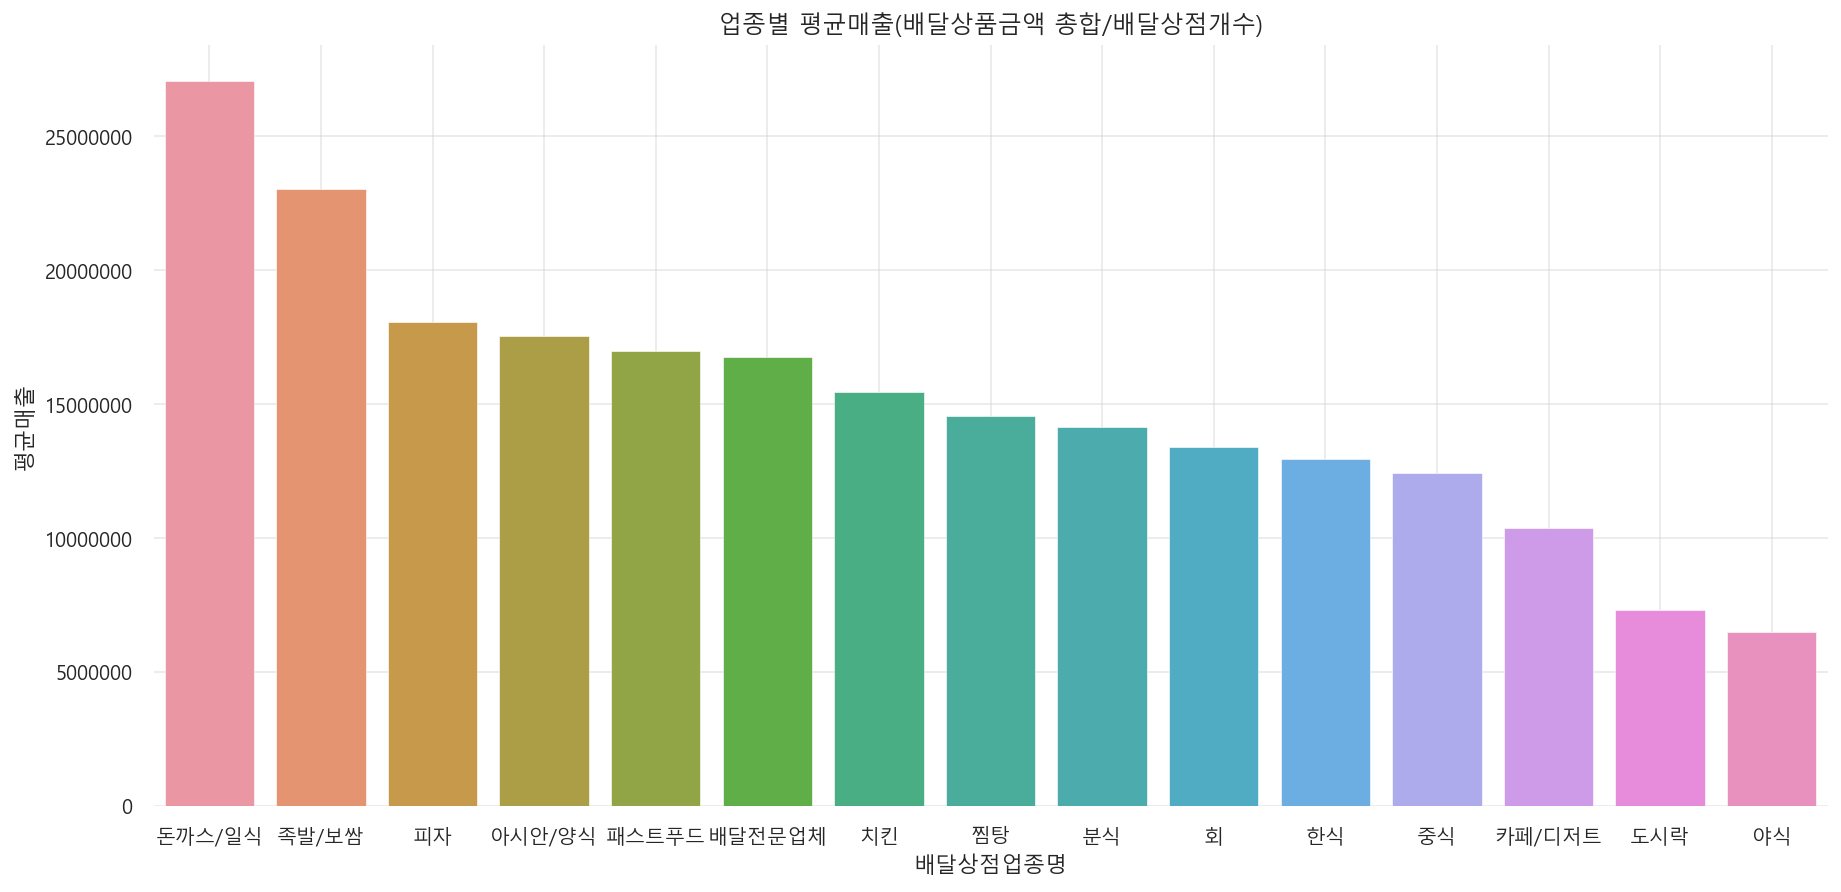

In [555]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=data_store_income, x='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', y='ÌèâÍ∑†Îß§Ï∂ú')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('ÏóÖÏ¢ÖÎ≥Ñ ÌèâÍ∑†Îß§Ï∂ú(Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï©/Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò)')
plt.grid(color='lightgrey', alpha=0.43)

* Ï£ºÎ¨∏Í±¥Ïàò ÏÉÅÏúÑ 7Í∞ú ÏóÖÏ¢Ö: ÏπòÌÇ®(24.25%), ÌïúÏãù (15.73%), Î∂ÑÏãù (10.56%), Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏ (8.85%), ÎèàÍπåÏä§/ÏùºÏãù(7.02%), Ï°±Î∞ú/Î≥¥Ïåà(6.85%), ÌîºÏûê(4.60%)
* ÌèâÍ∑†Îß§Ï∂ú ÏÉÅÏúÑ 7Í∞ú ÏóÖÏ¢Ö: ÎèàÍπåÏä§/ÏùºÏãù, Ï°±Î∞ú/Î≥¥Ïåà, ÌîºÏûê, ÏïÑÏãúÏïà/ÏñëÏãù, Ìå®Ïä§Ìä∏Ìë∏Îìú, ÏπòÌÇ®, Ï∞úÌÉï  

#### ÎèôÎÑ§Î≥Ñ ÏóÖÏ¢ÖÎ≥Ñ ÌèâÍ∑† Îß§Ï∂ú

In [562]:
# ÎèôÎÑ§Î≥Ñ ÏóÖÏ¢ÖÎ≥Ñ Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò
data_store2 = data.pivot_table(index=['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'], 
                              values='Î∞∞Îã¨ÏÉÅÏ†êid',
                              aggfunc=pd.Series.nunique,
                              fill_value=0,
                              margins=True).reset_index()
data_store2.rename(columns={'Î∞∞Îã¨ÏÉÅÏ†êid':'Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)'}, inplace=True)
data_store2.head()

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)
0      Í¥¥ÏïàÎèô  ÎèàÍπåÏä§/ÏùºÏãù               8
1      Í¥¥ÏïàÎèô      Î∂ÑÏãù              15
2      Í¥¥ÏïàÎèô      ÏïºÏãù               1
3      Í¥¥ÏïàÎèô   Ï°±Î∞ú/Î≥¥Ïåà               4
4      Í¥¥ÏïàÎèô      Ï∞úÌÉï               1

In [577]:
# ÎèôÎÑ§Î≥Ñ ÏóÖÏ¢ÖÎ≥Ñ ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï© = data_income_sum2
data_income_sum2 = data.pivot_table(index=['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'],
                                    values='Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°', 
                                    aggfunc='sum').reset_index()

# data_income_sum2ÏôÄ data_store2 Î≥ëÌï©(merge) 
data_store_income2 = data_income_sum2.merge(data_store2, how='inner', on=['Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô', 'Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö'])

# ÎèôÏùºÏóÖÏ¢Ö ÌèâÍ∑† Îß§Ï∂ú(Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï° Ï¥ùÌï©/Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò)
data_store_income2['ÌèâÍ∑†Îß§Ï∂ú'] = data_store_income2['Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°'] / data_store_income2['Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)']
data_store_income2 = data_store_income2.sort_values(by='ÌèâÍ∑†Îß§Ï∂ú', ascending=False)
data_store_income2.reset_index(drop=True, inplace=True)
data_store_income2 = data_store_income2.sort_values(by='Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô').reset_index(drop=True)
data_store_income2.head(7)

Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö     Î∞∞Îã¨ÏÉÅÌíàÍ∏àÏï°  Î∞∞Îã¨ÏÉÅÏ†êÍ∞úÏàò(unique)        ÌèâÍ∑†Îß§Ï∂ú
0      Í¥¥ÏïàÎèô   Ìå®Ïä§Ìä∏Ìë∏Îìú  136259753               5 27251950.60
1      Í¥¥ÏïàÎèô      Î∂ÑÏãù  253528506              15 16901900.40
2      Í¥¥ÏïàÎèô  Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏   69186118               9  7687346.44
3      Í¥¥ÏïàÎèô      ÌîºÏûê  372321903              15 24821460.20
4      Í¥¥ÏïàÎèô   Ï°±Î∞ú/Î≥¥Ïåà   45779500               4 11444875.00
5      Í¥¥ÏïàÎèô  ÎèàÍπåÏä§/ÏùºÏãù  374032490               8 46754061.25
6      Í¥¥ÏïàÎèô      ÌïúÏãù  197491270              12 16457605.83

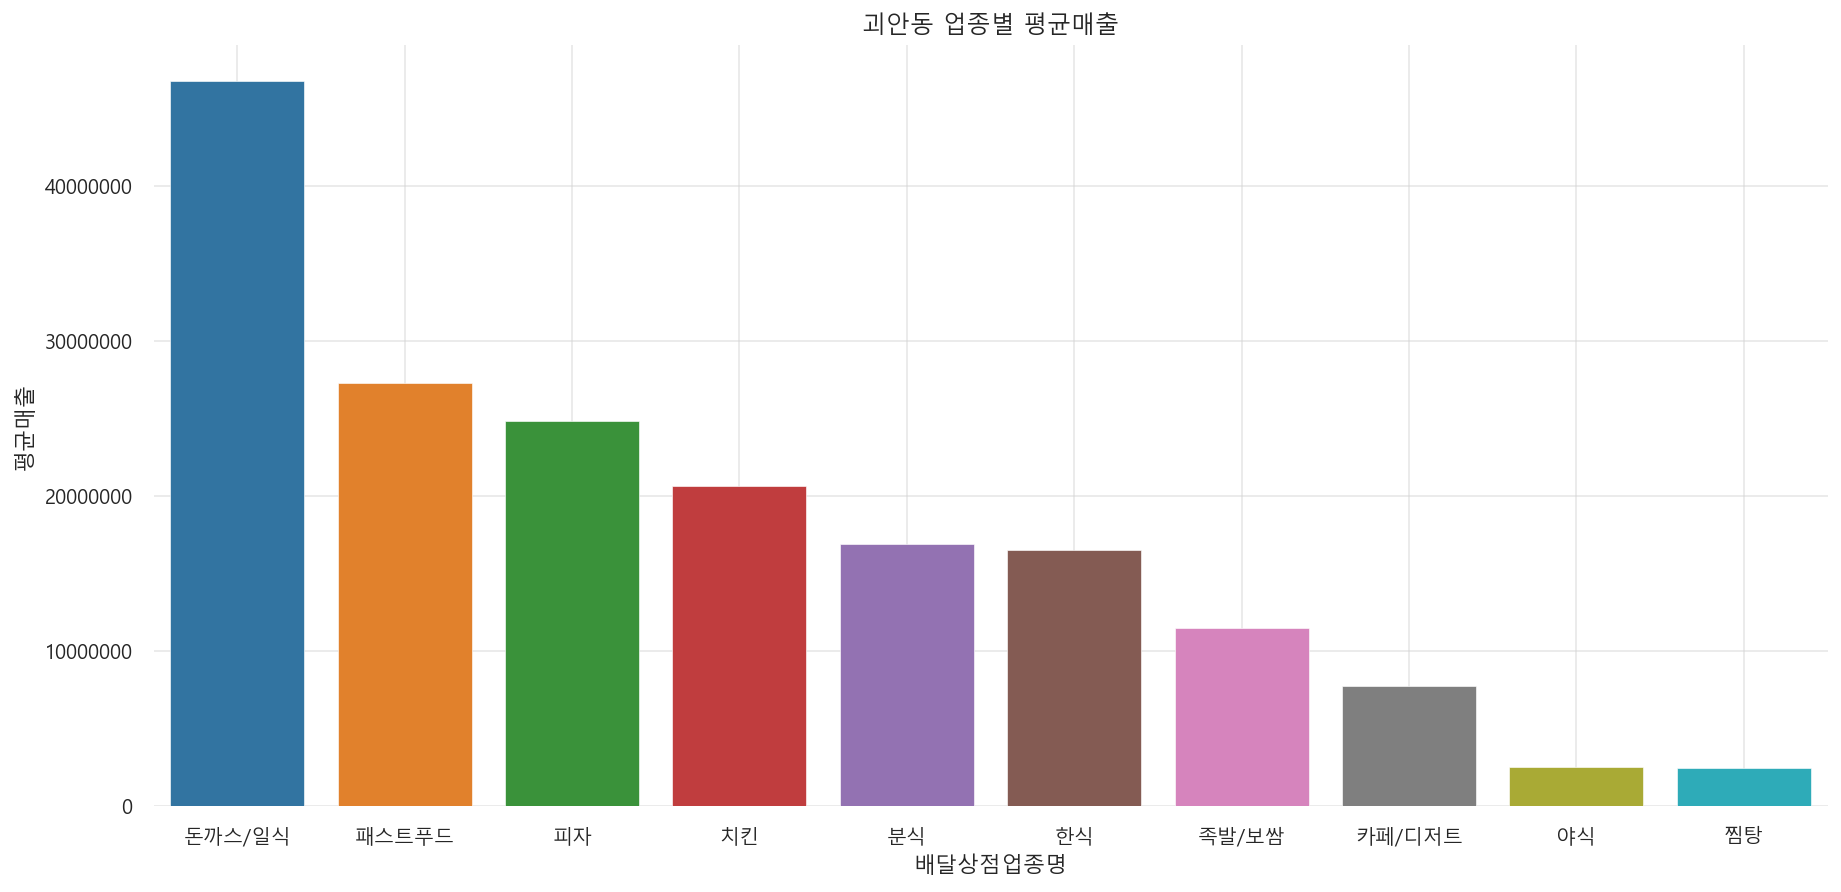

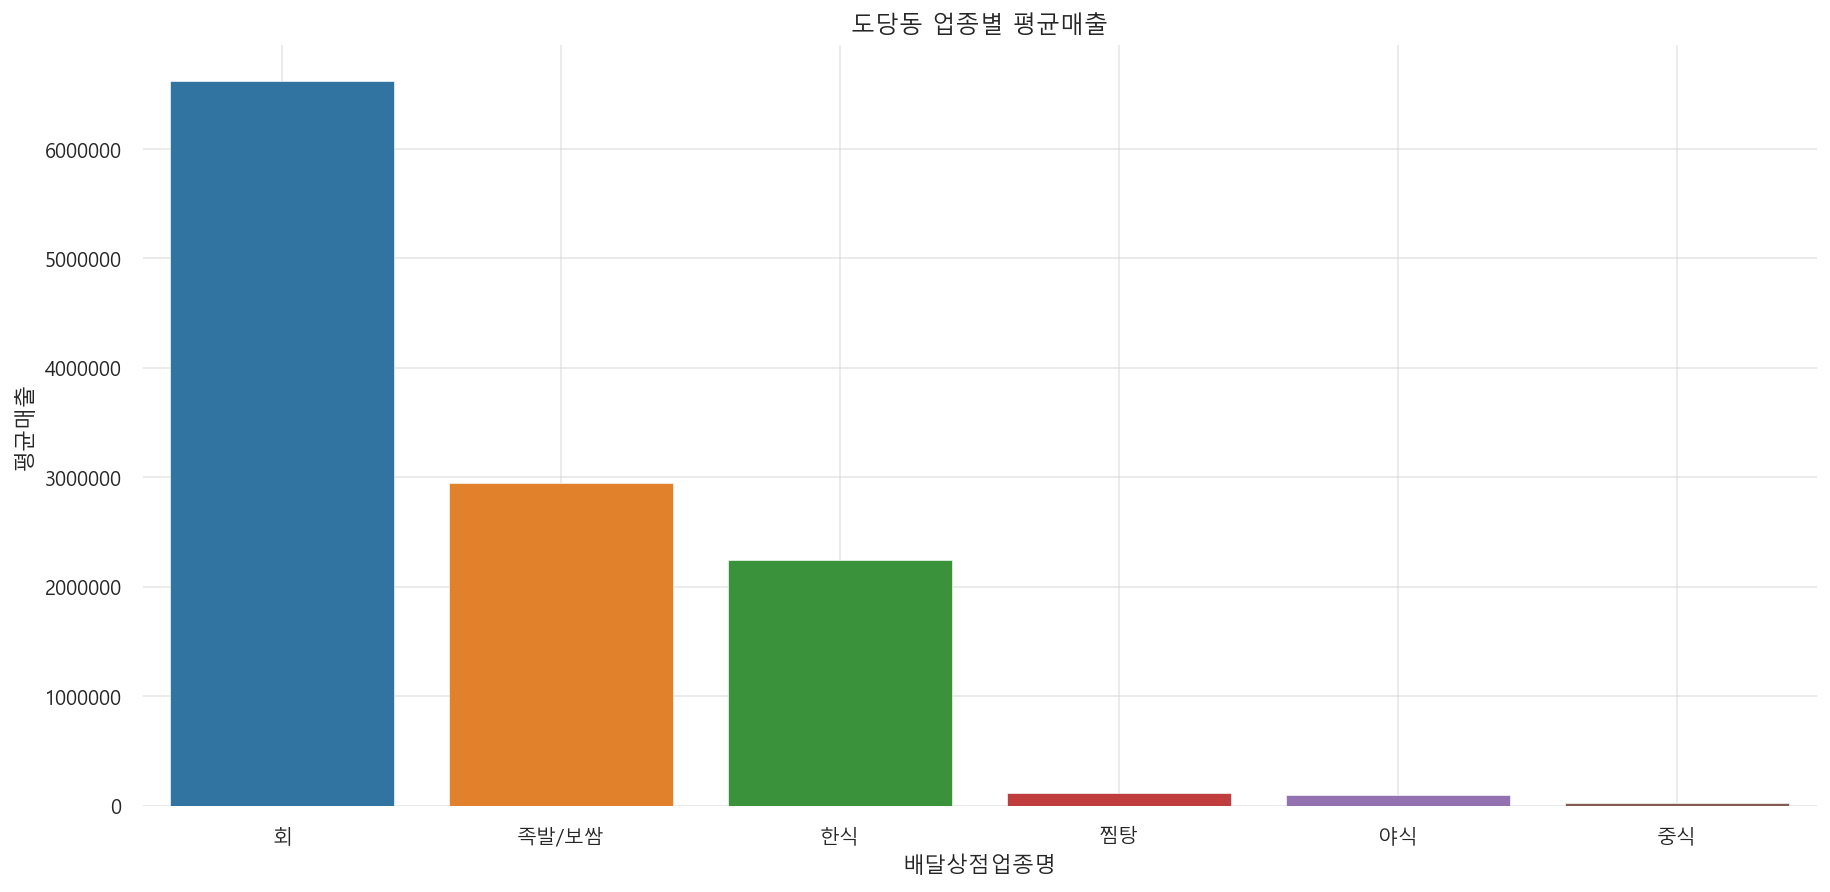

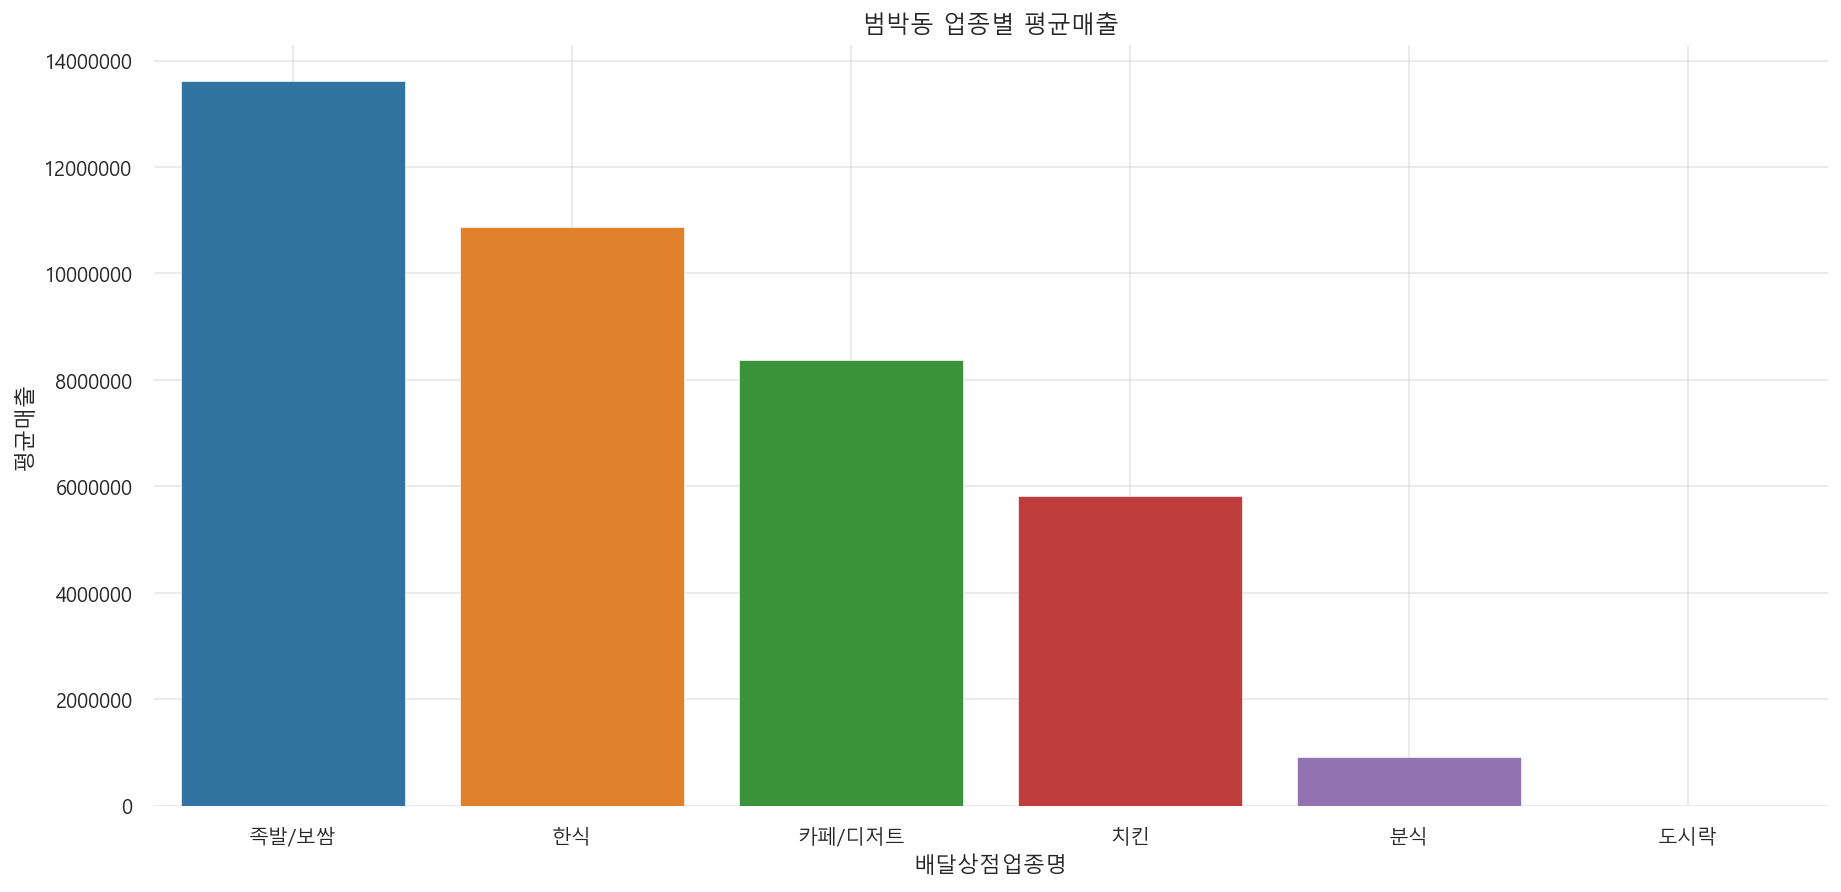

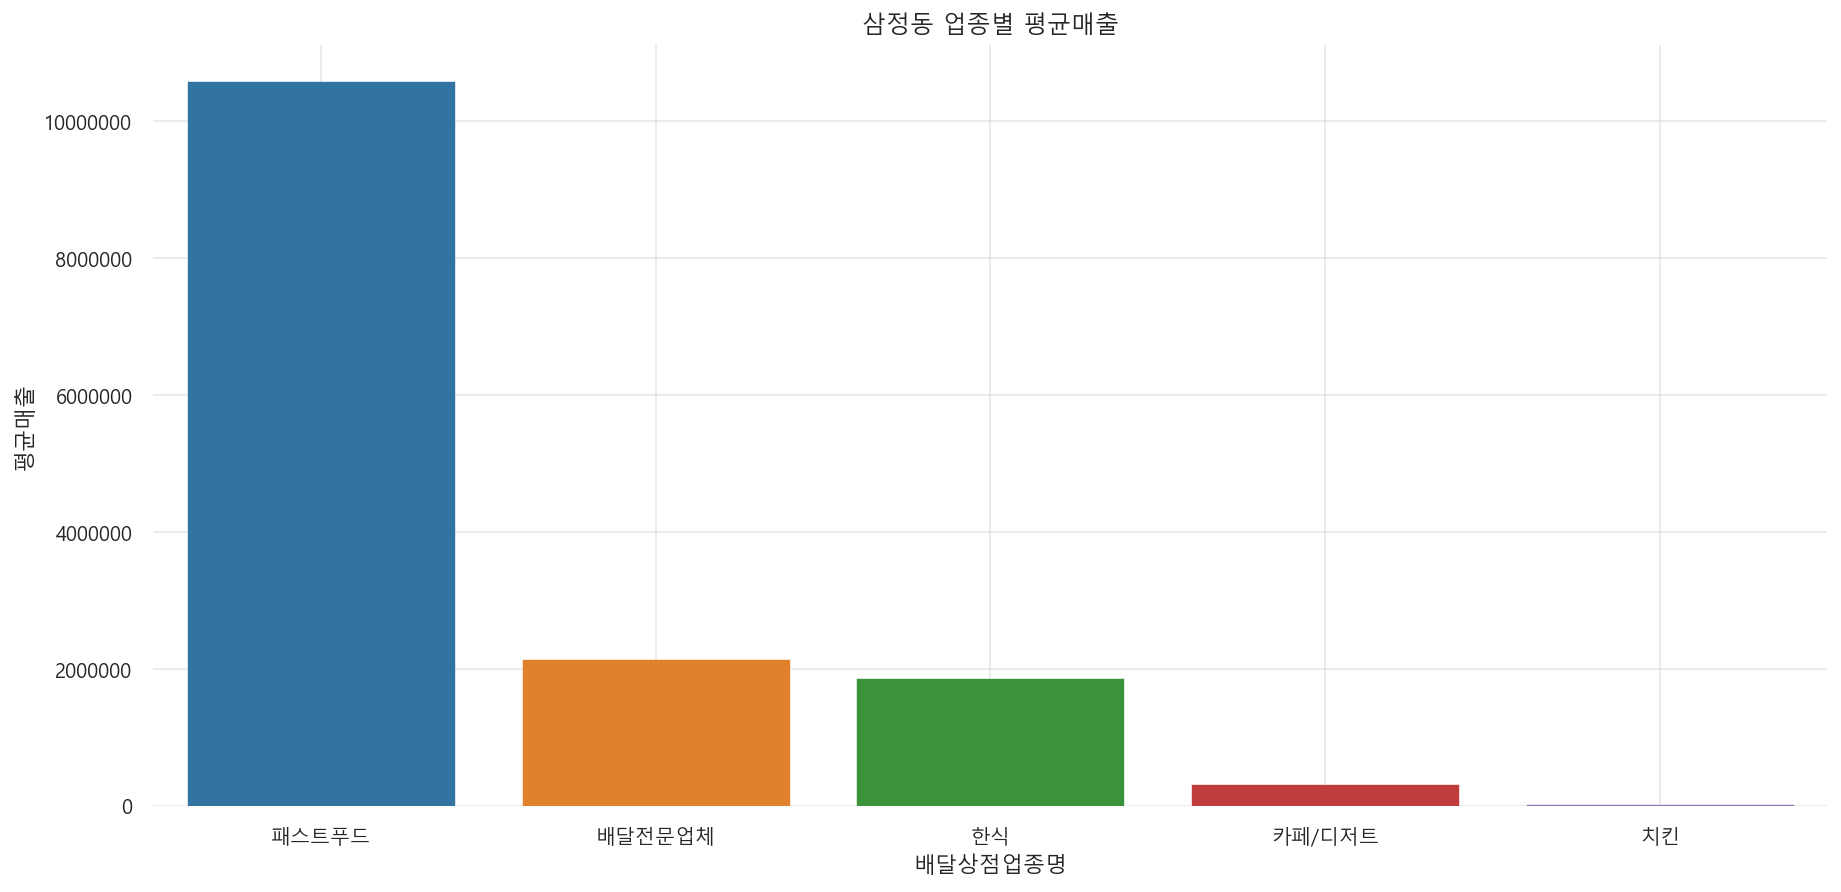

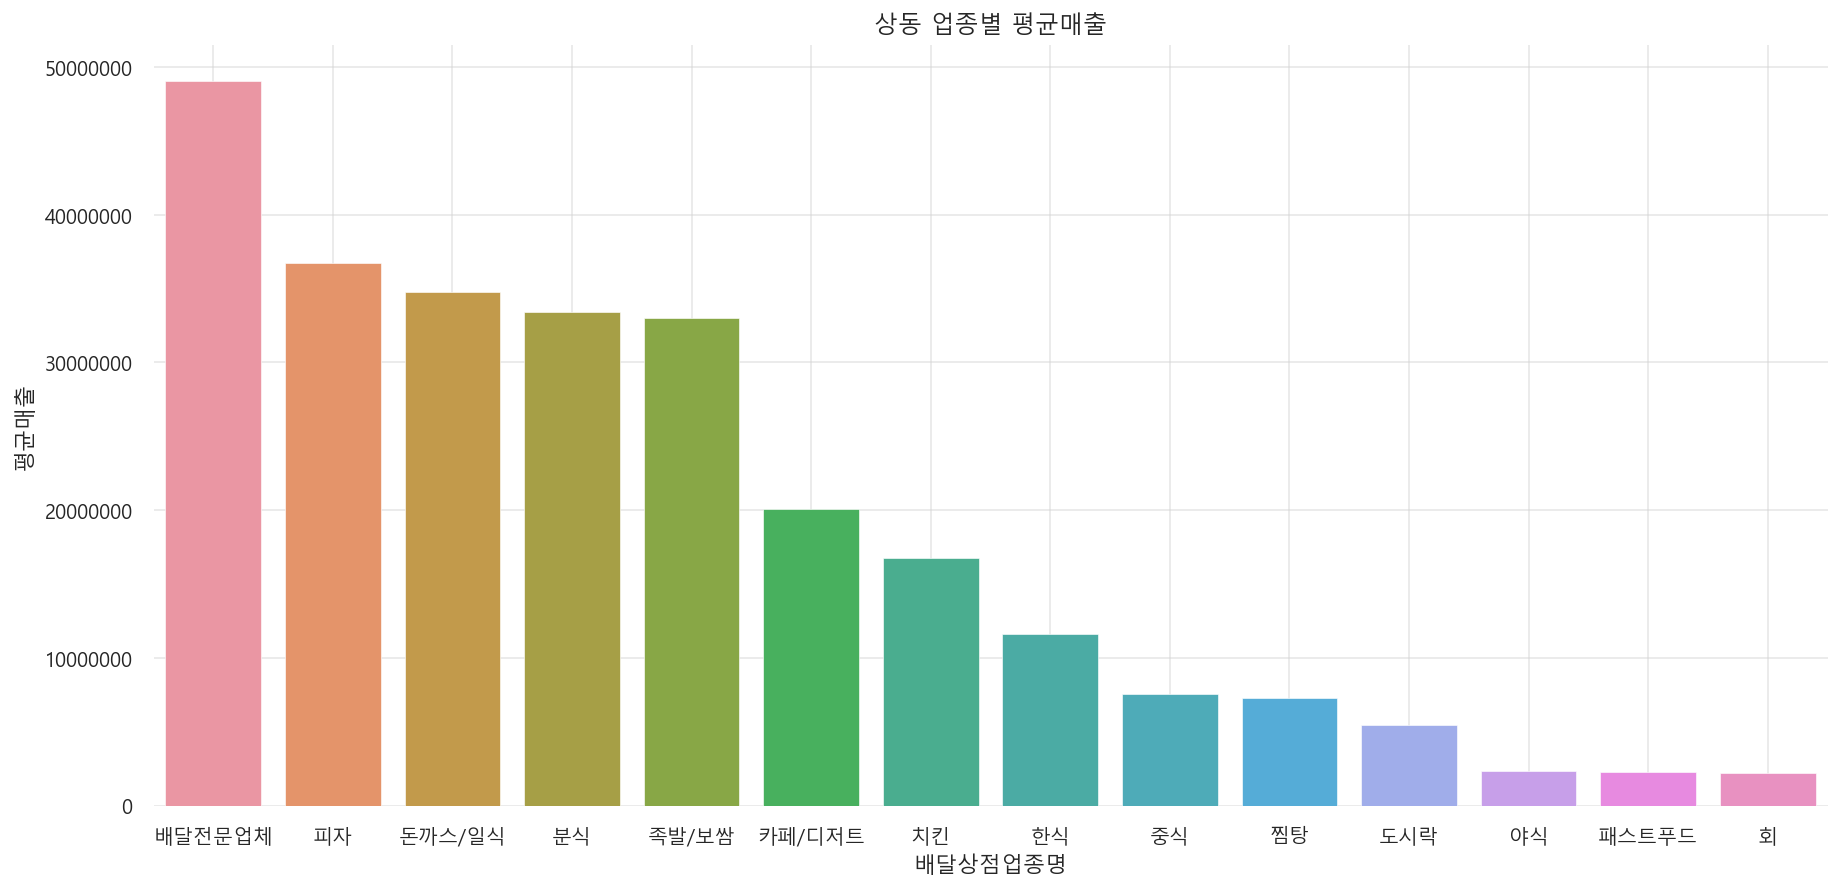

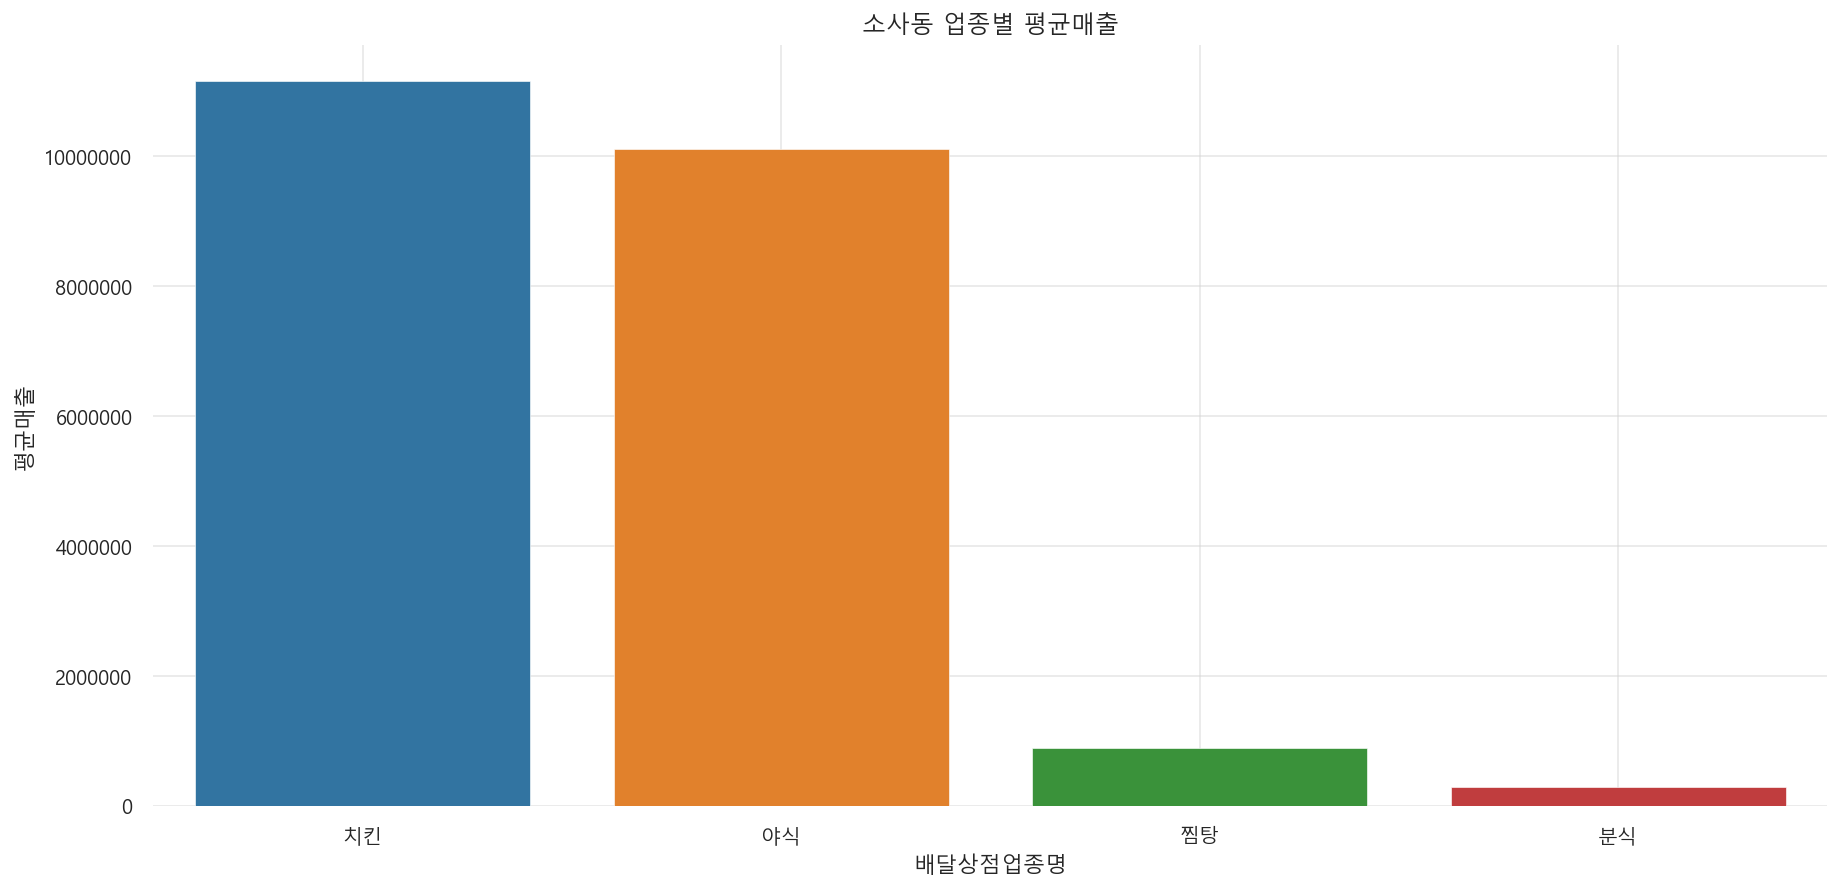

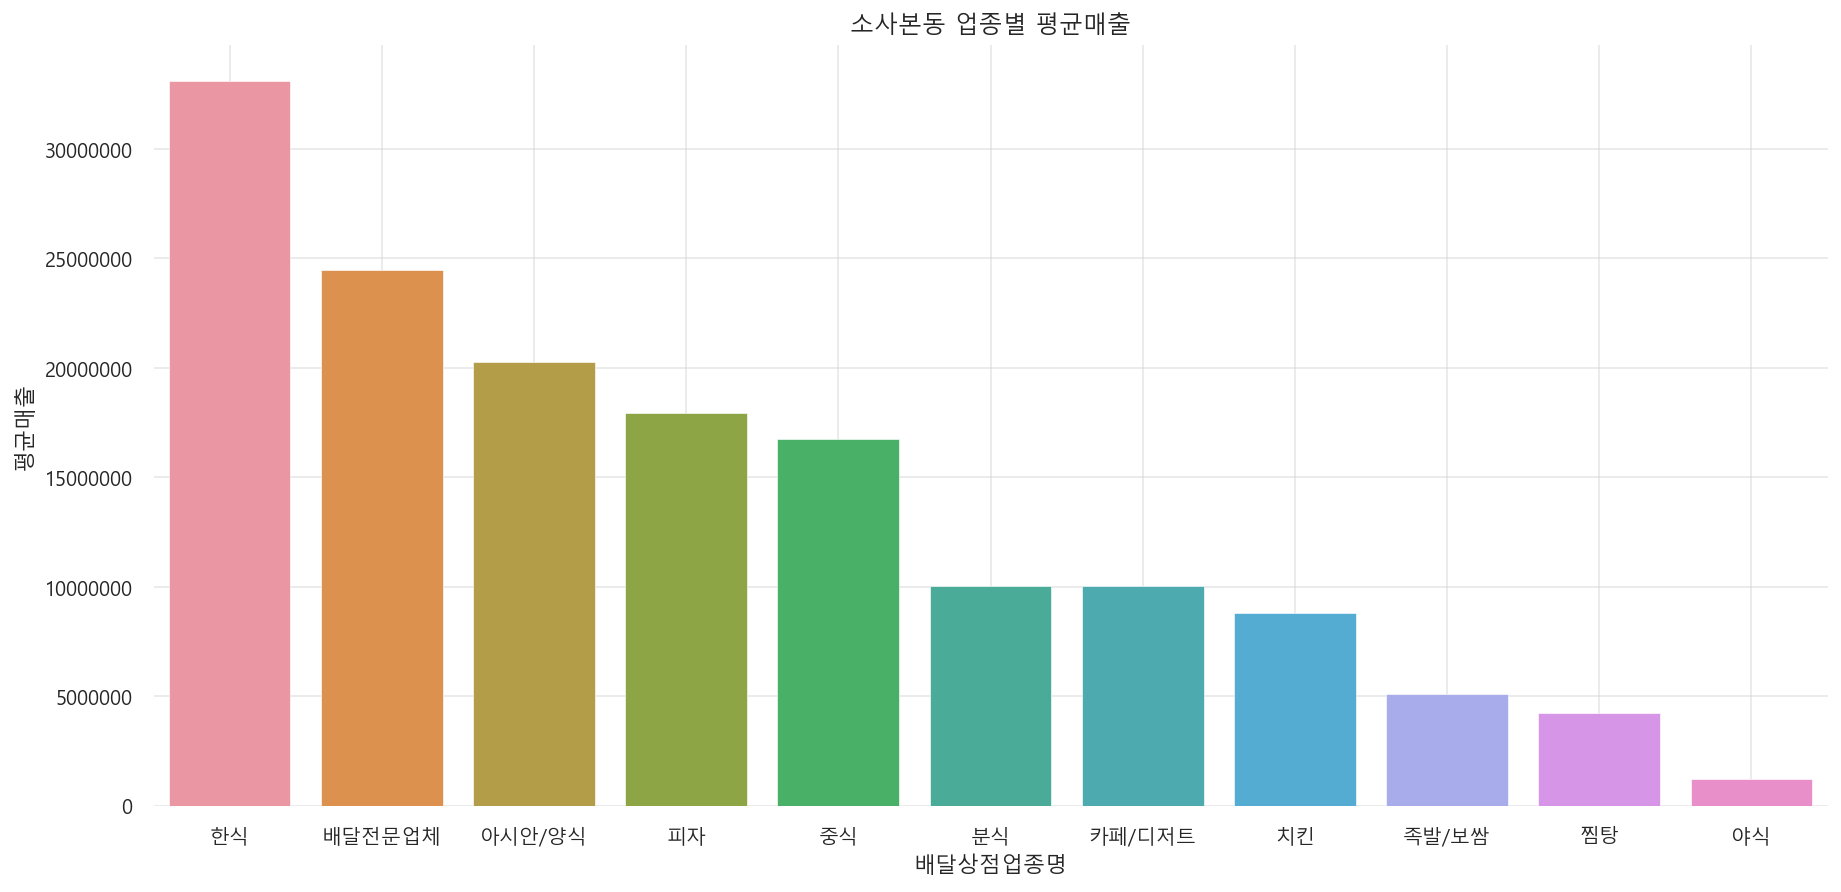

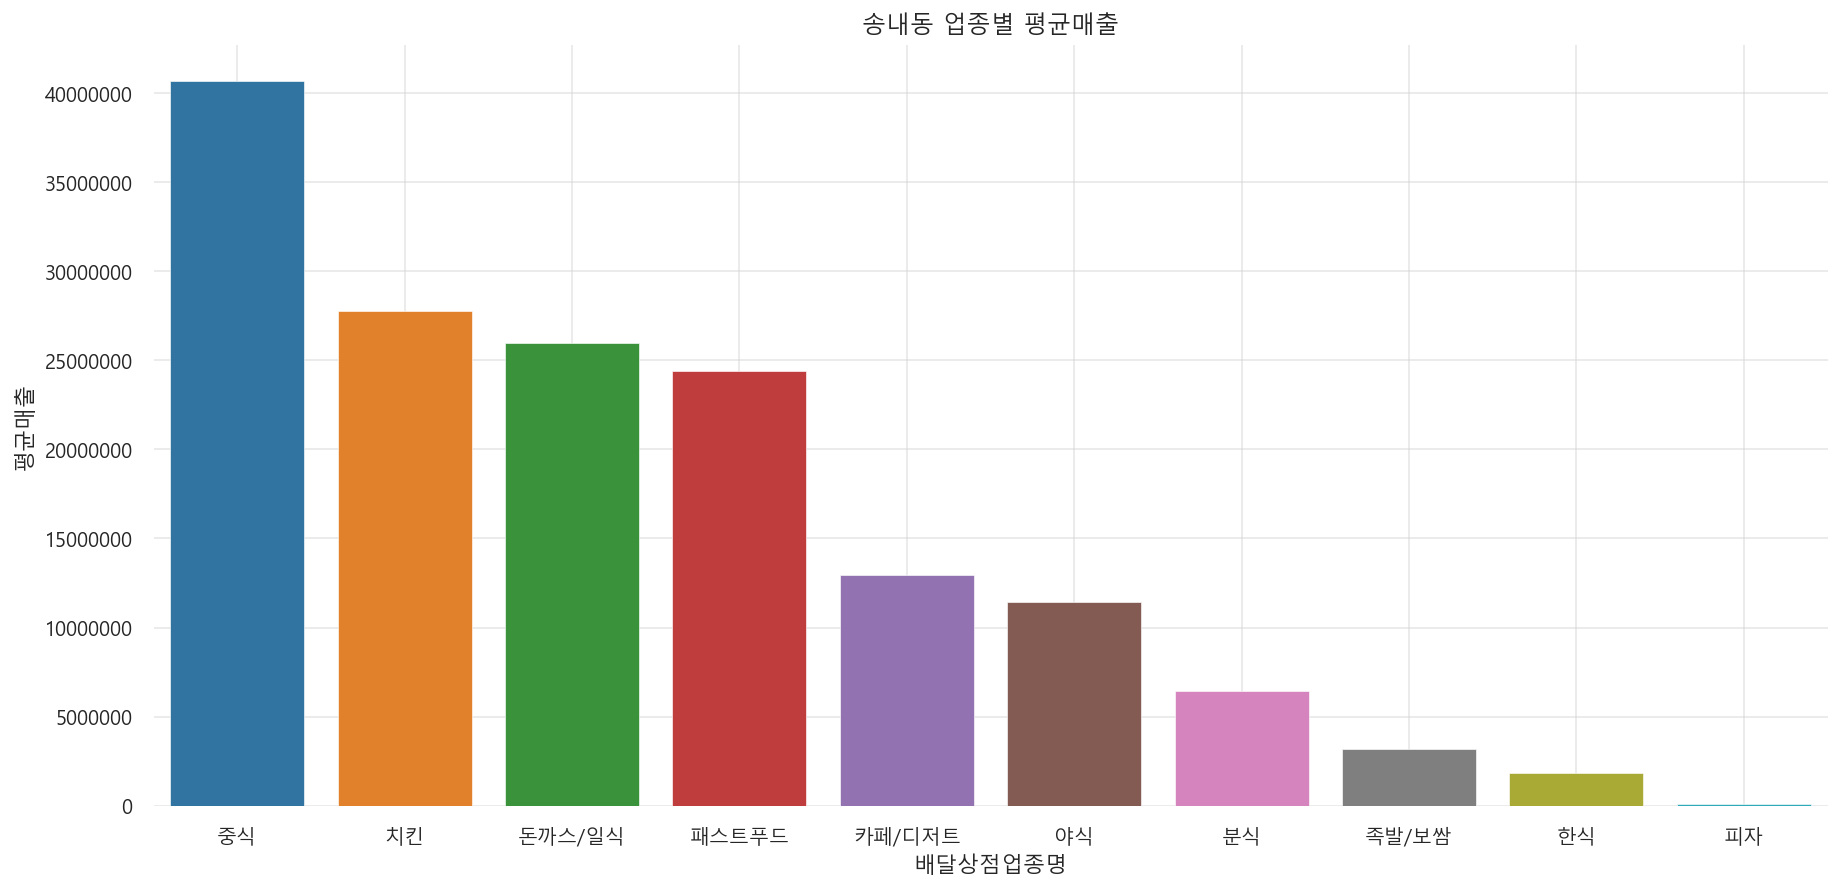

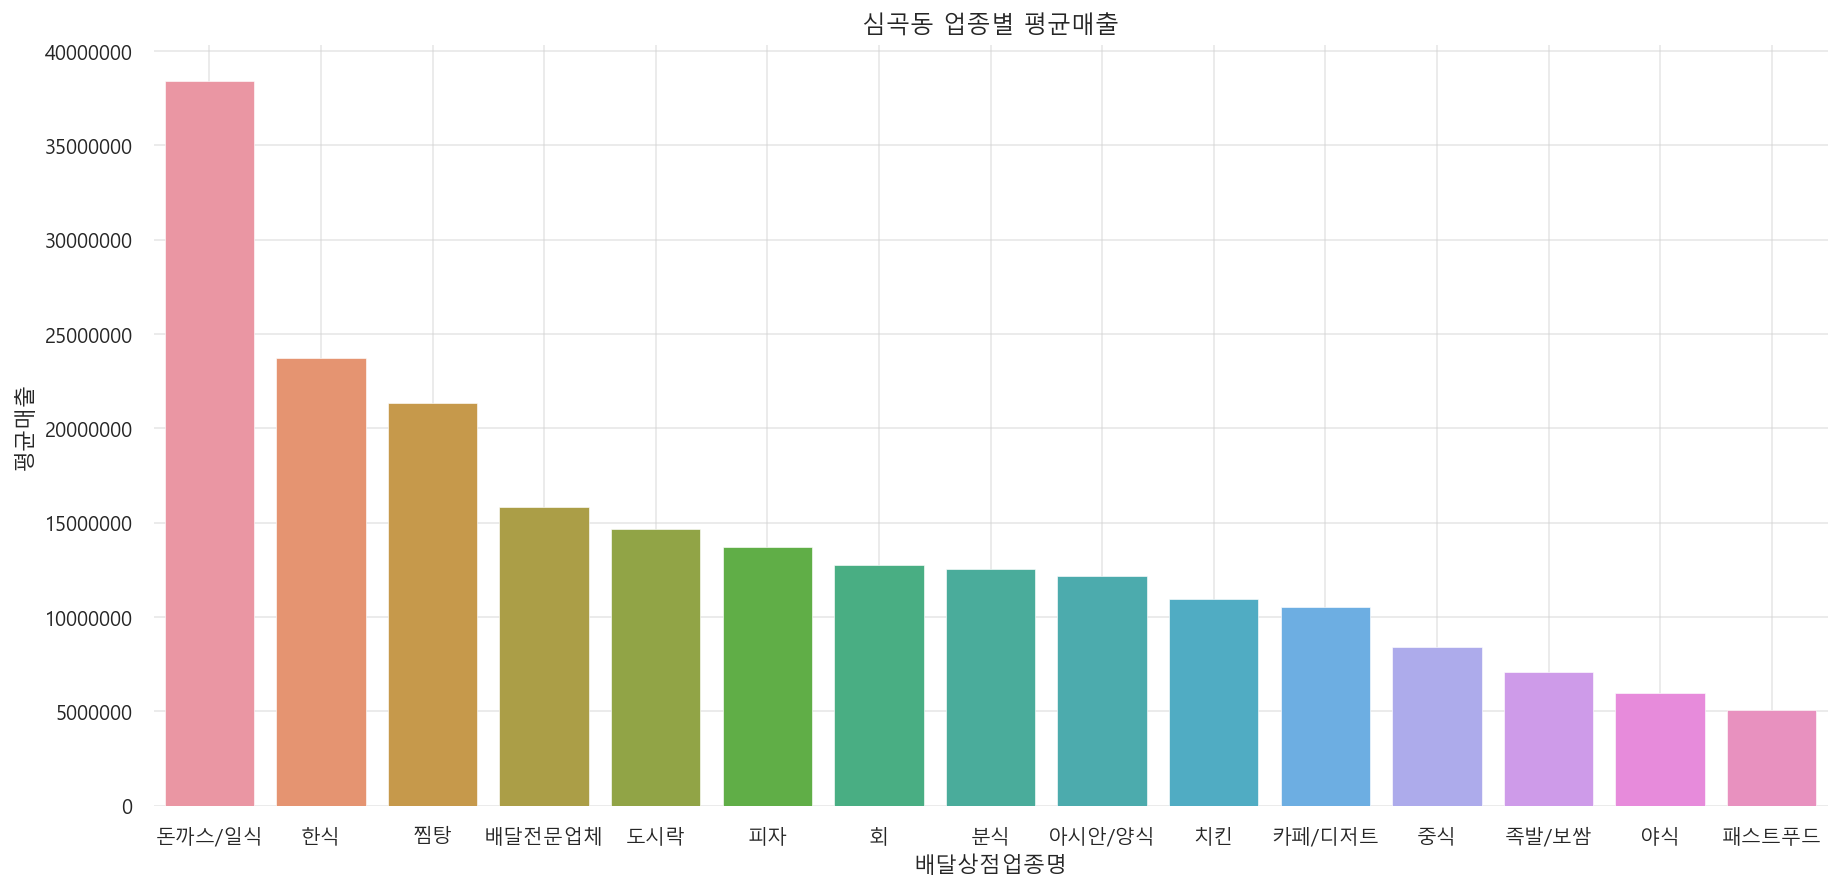

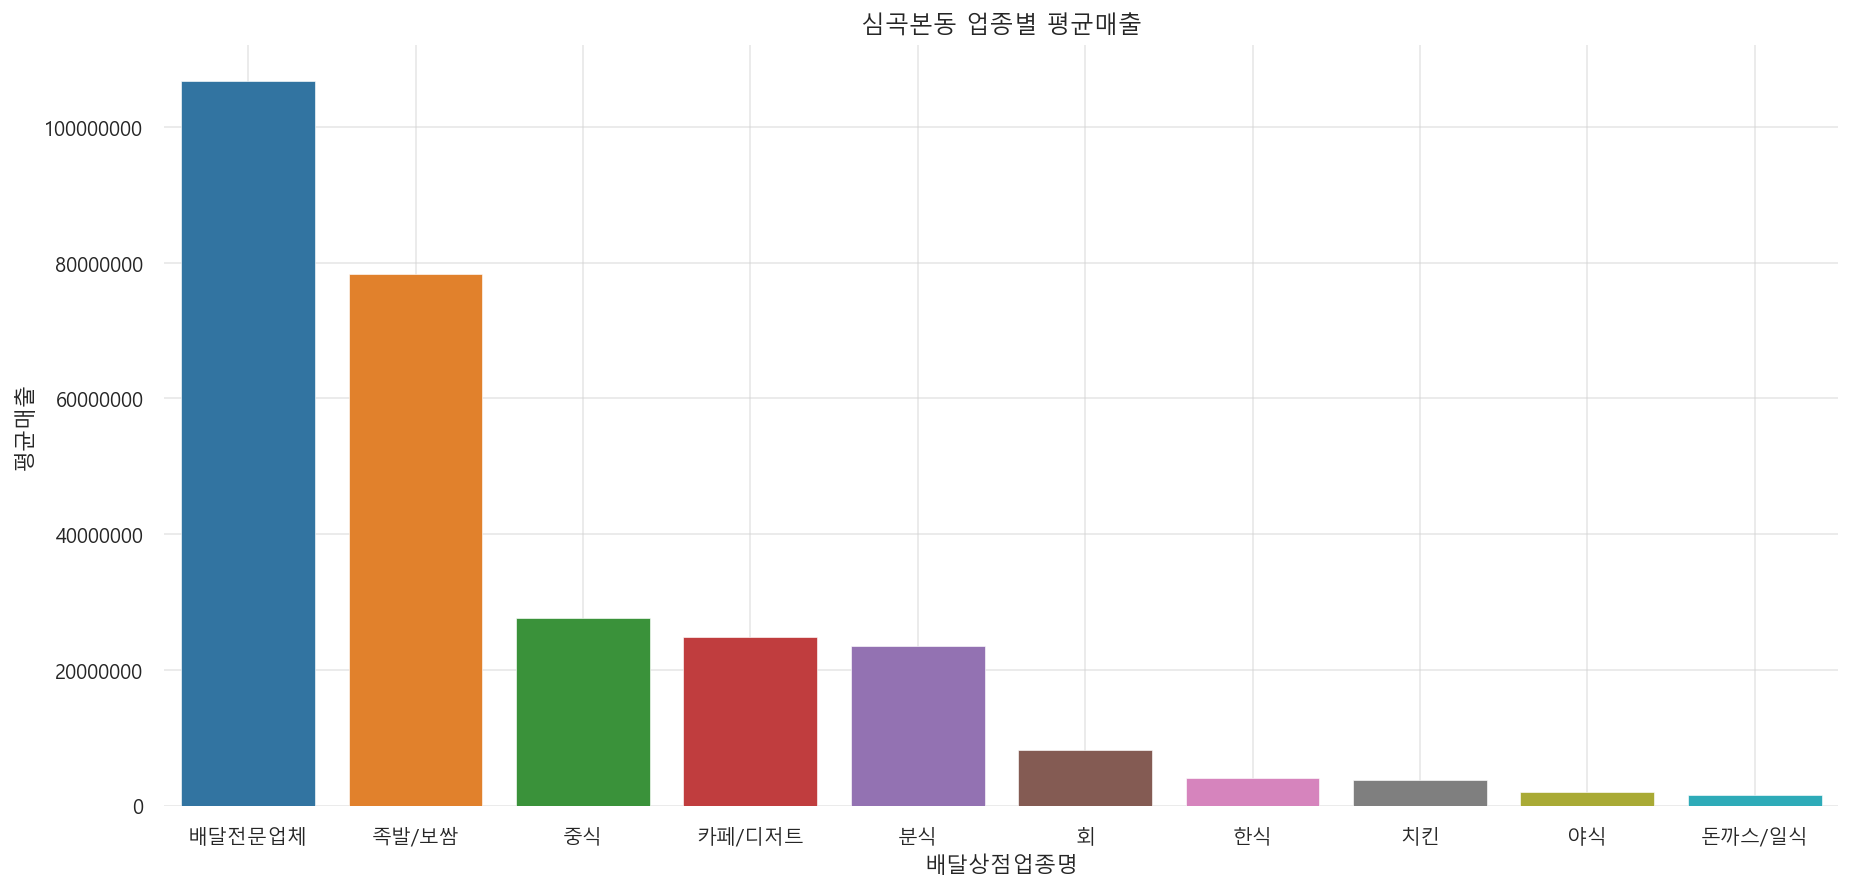

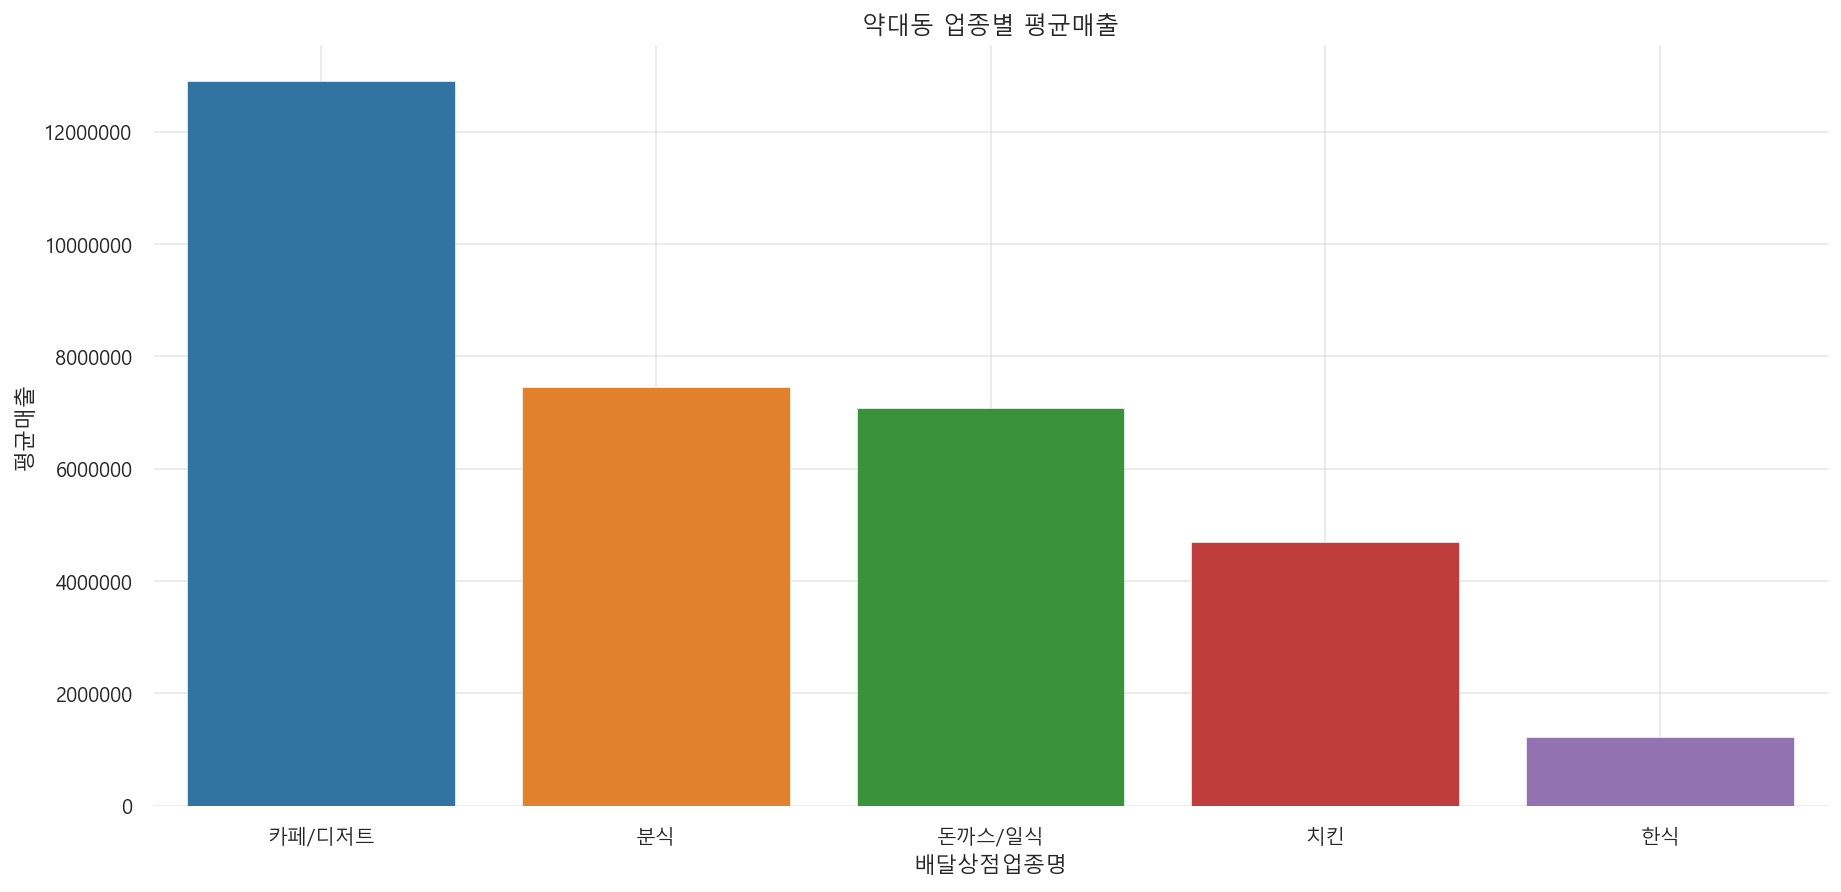

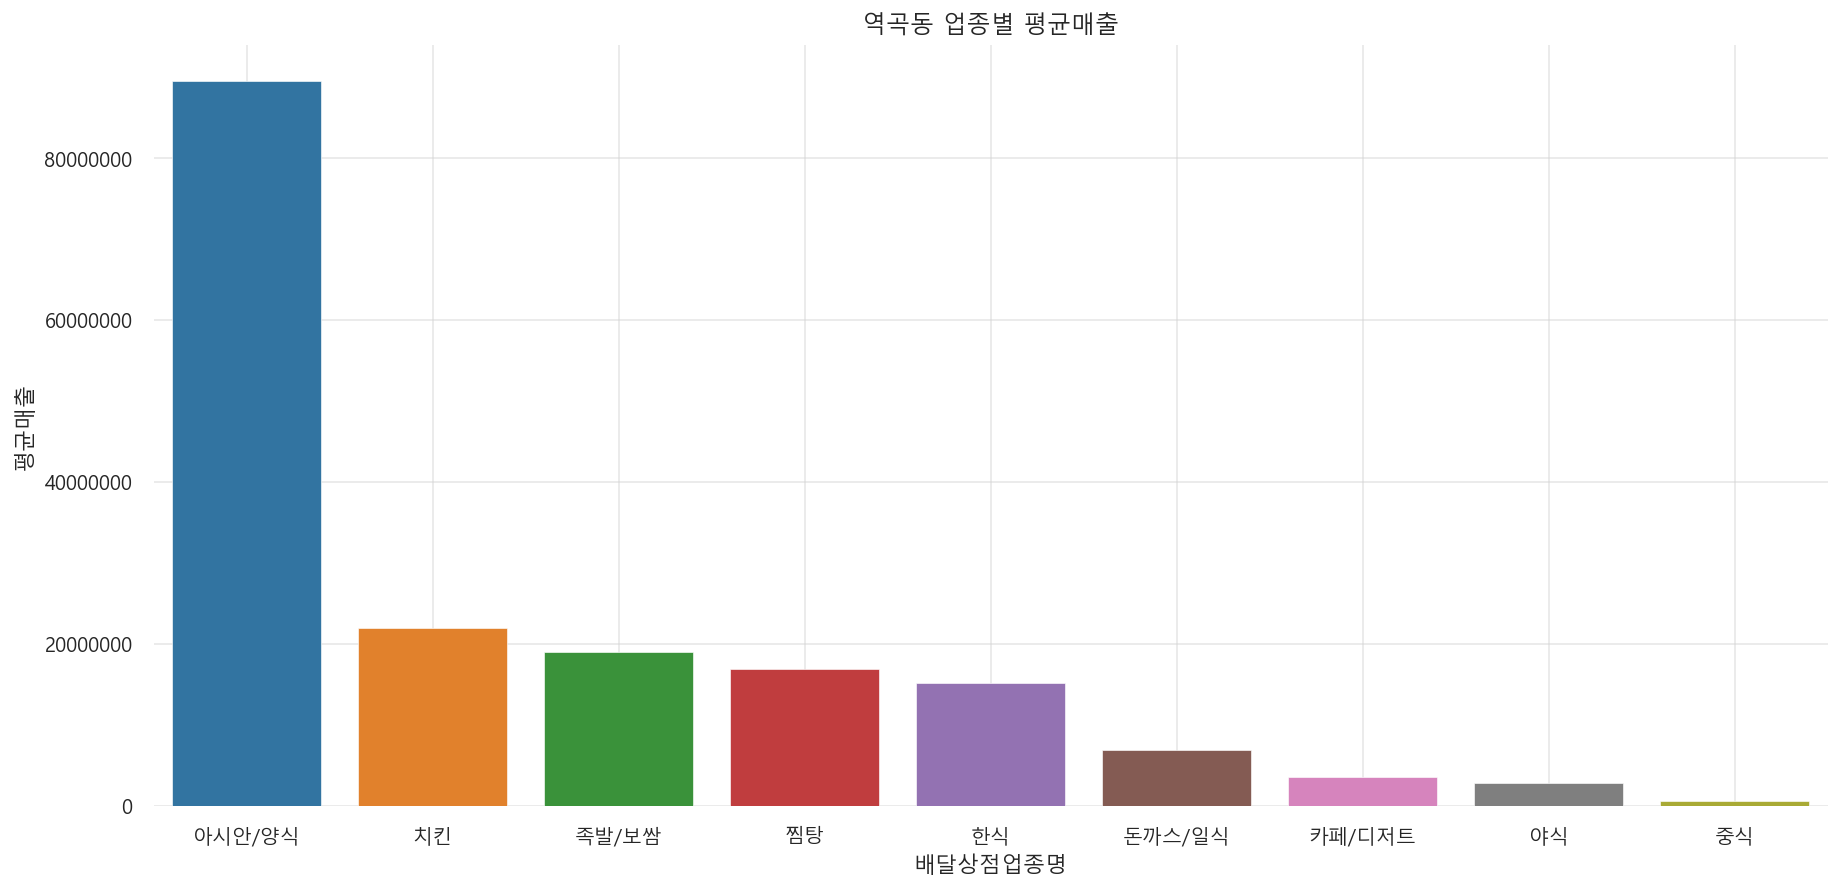

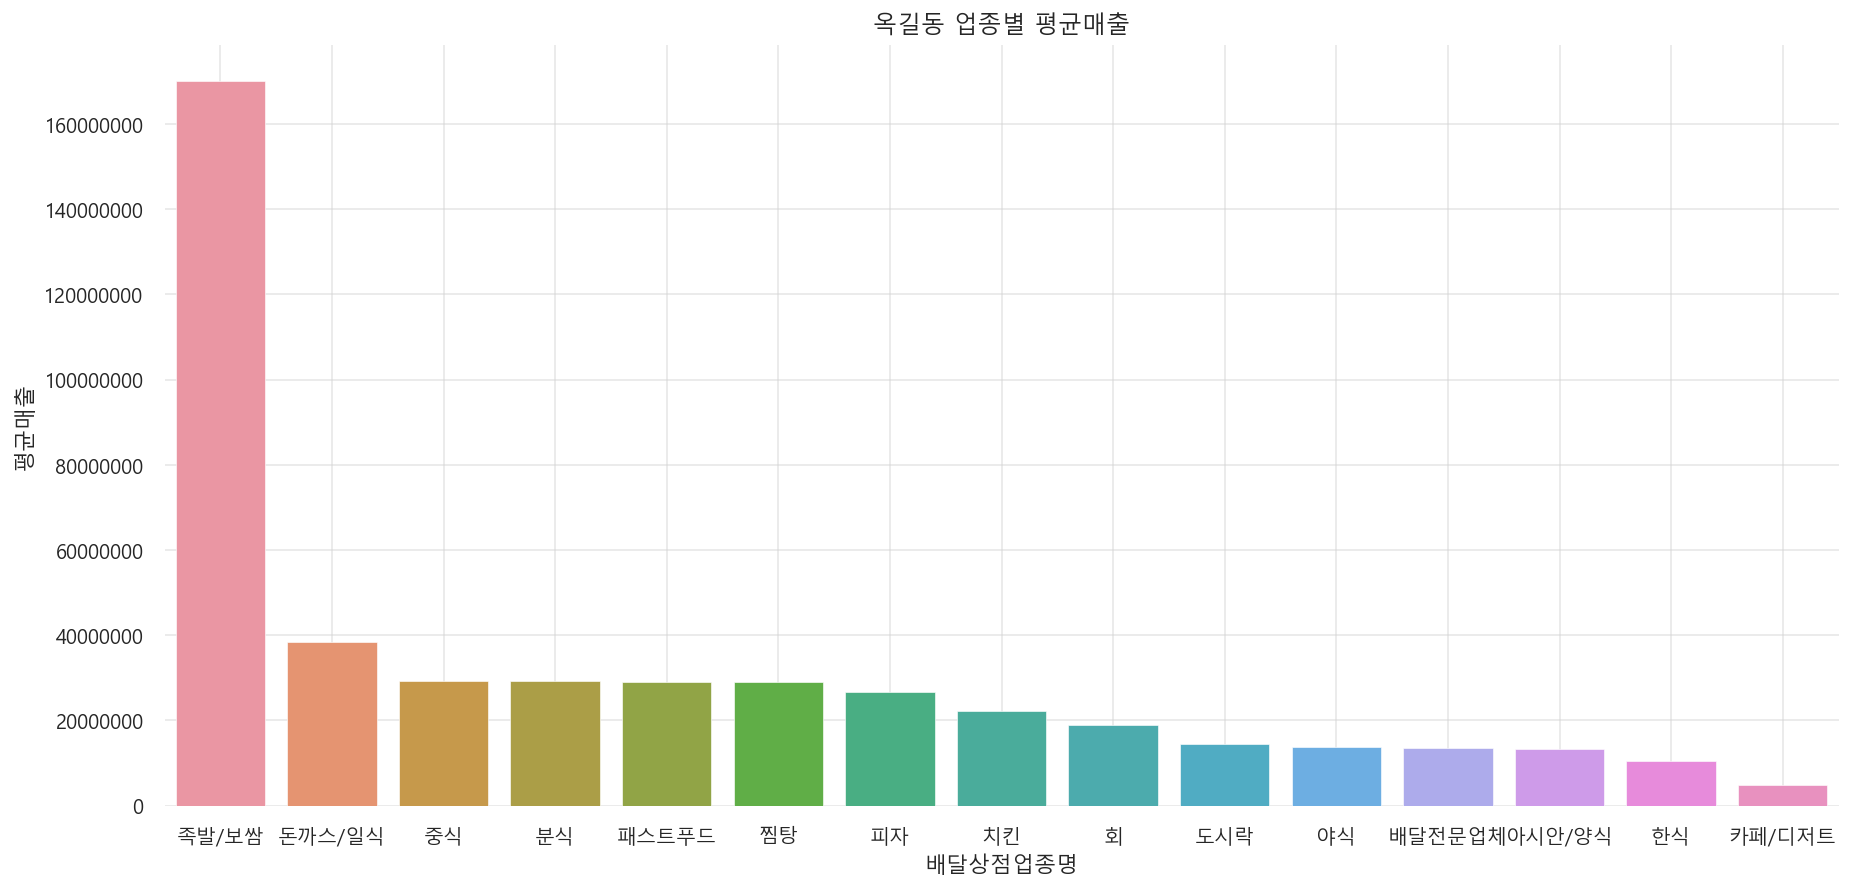

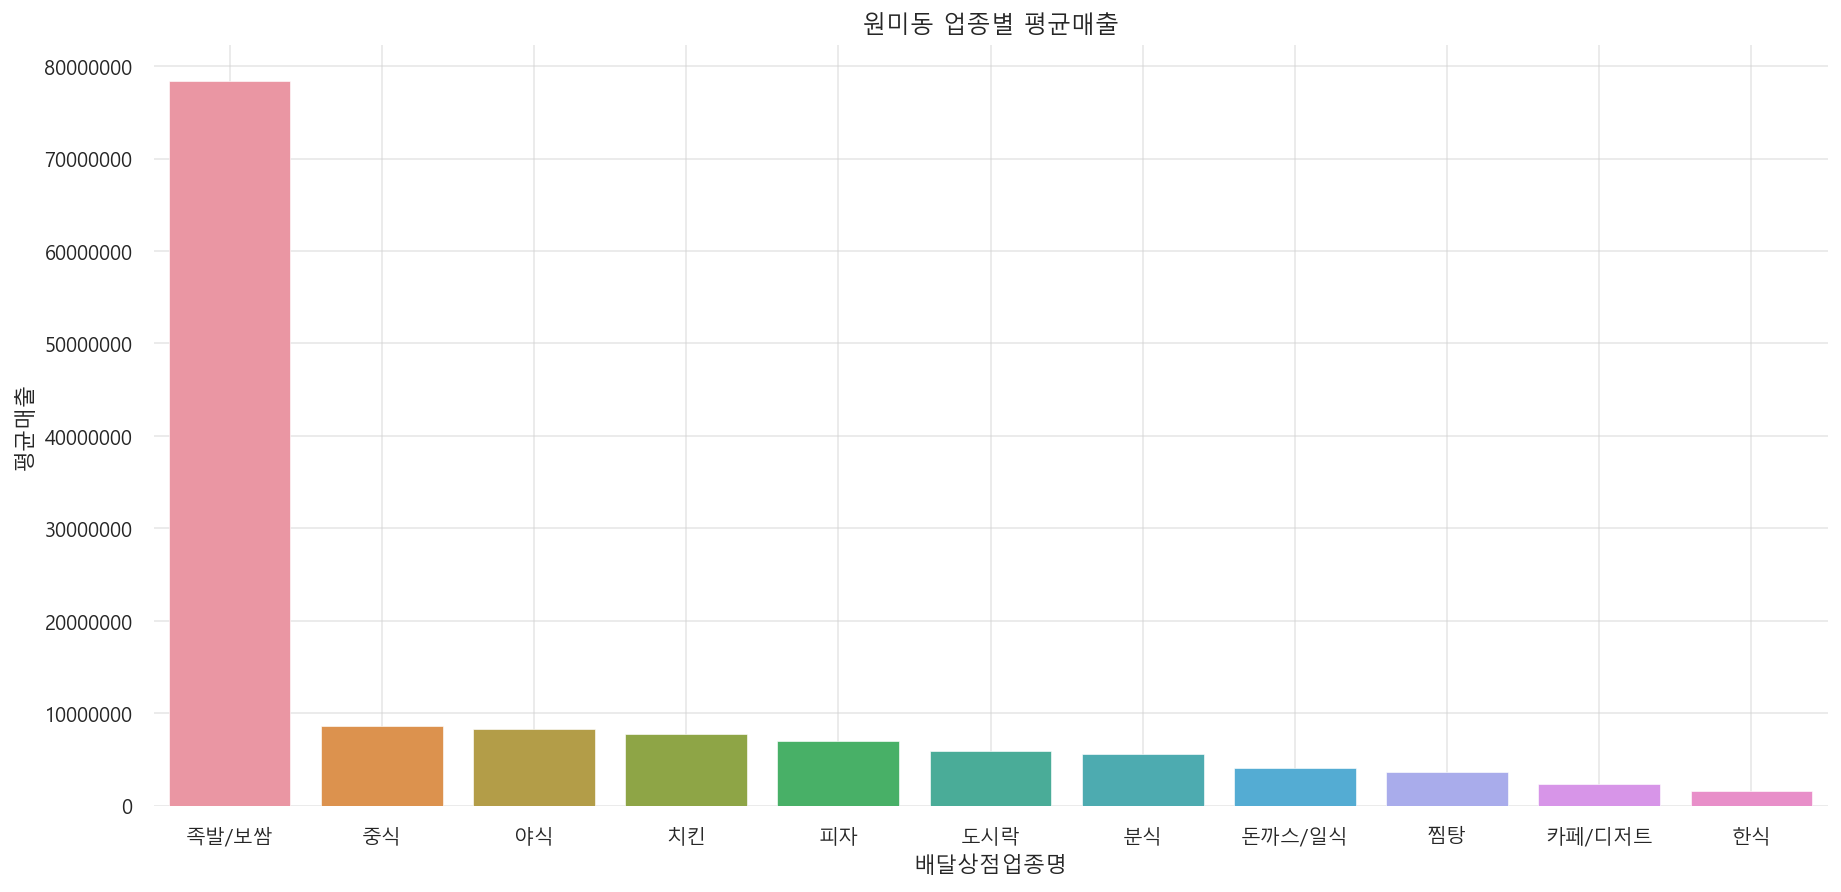

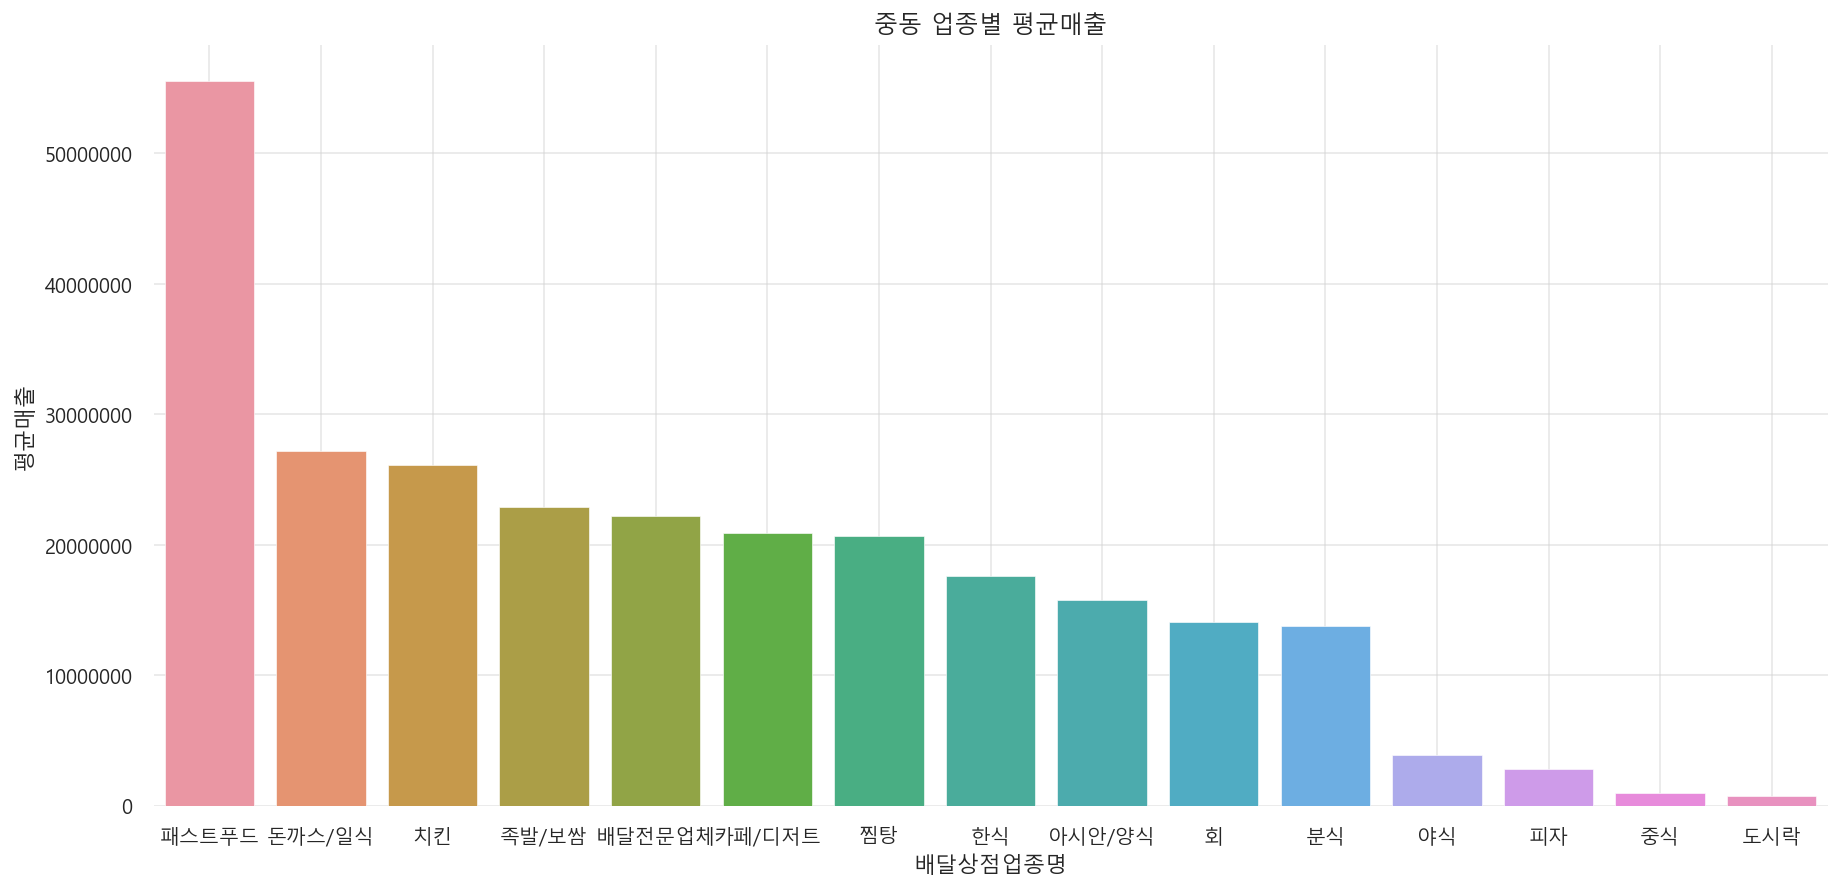

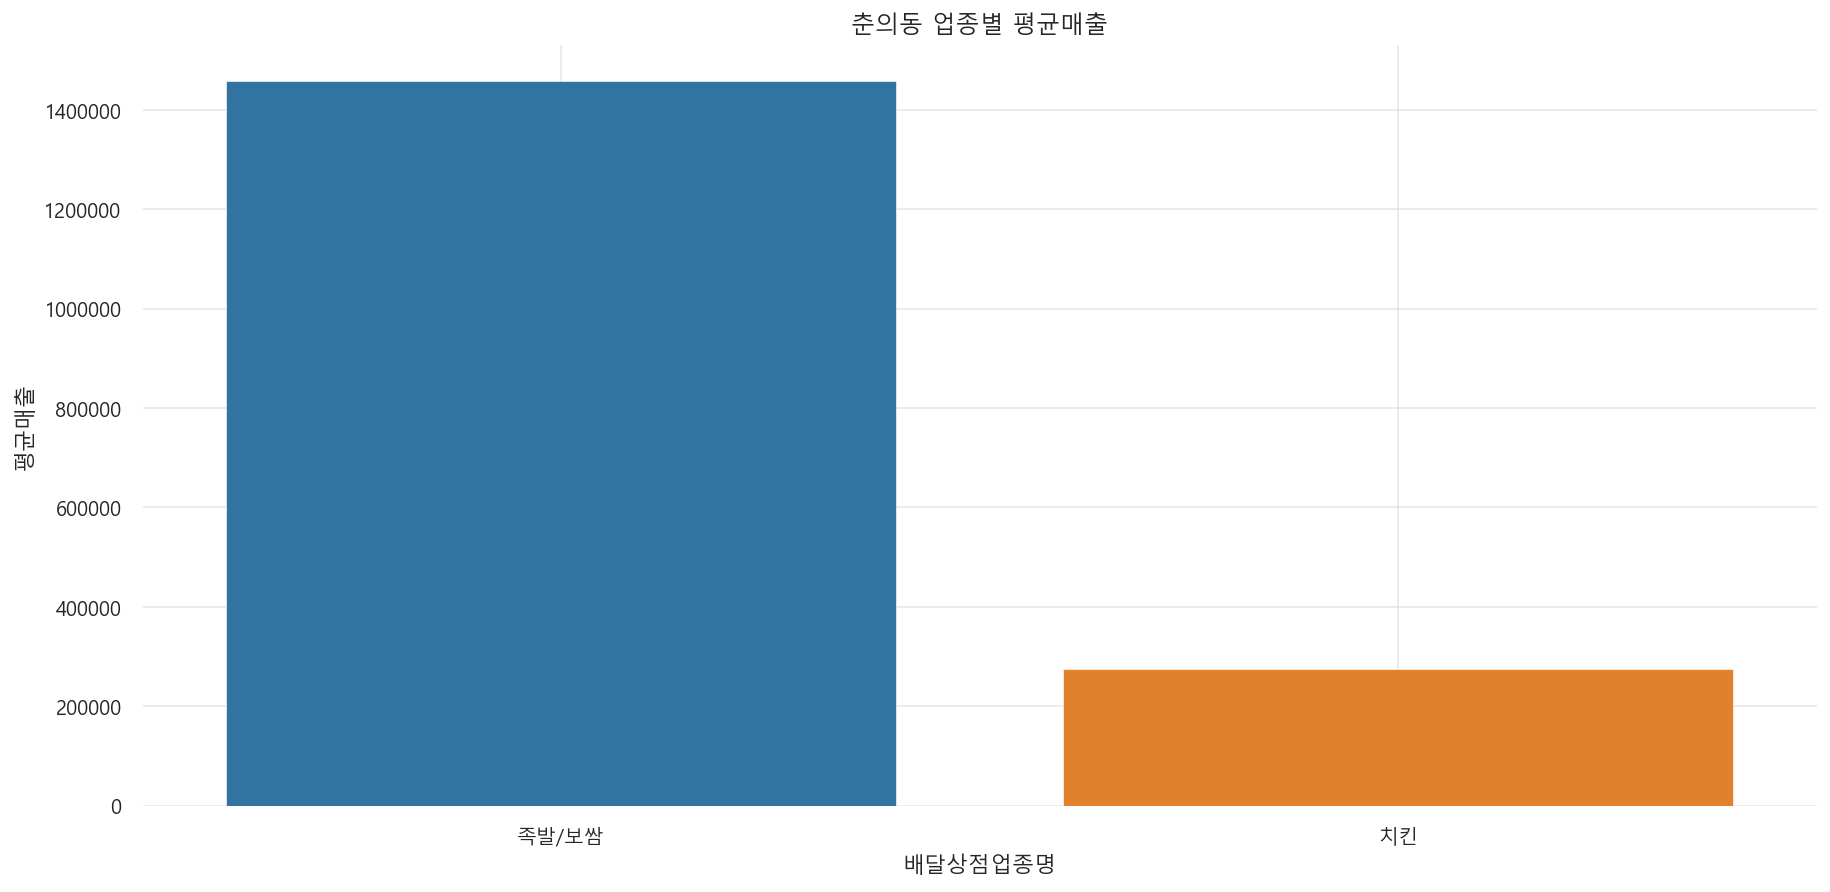

In [591]:
cols = ['Í¥¥ÏïàÎèô', 'ÎèÑÎãπÎèô', 'Î≤îÎ∞ïÎèô', 'ÏÇºÏ†ïÎèô', 'ÏÉÅÎèô', 'ÏÜåÏÇ¨Îèô', 'ÏÜåÏÇ¨Î≥∏Îèô', 'ÏÜ°ÎÇ¥Îèô',
       'Ïã¨Í≥°Îèô', 'Ïã¨Í≥°Î≥∏Îèô', 'ÏïΩÎåÄÎèô', 'Ïó≠Í≥°Îèô', 'Ïò•Í∏∏Îèô', 'ÏõêÎØ∏Îèô', 'Ï§ëÎèô', 'Ï∂òÏùòÎèô']

for col in cols:
    plt.figure(figsize=(15, 7))
    dt = data_store_income2.query(f"Î∞∞Îã¨ÏÉÅÏ†ê_ÏùçÎ©¥Îèô == '{col}'")
    ax = sns.barplot(data=dt.sort_values(by='ÌèâÍ∑†Îß§Ï∂ú', ascending=False), x='Î∞∞Îã¨ÏÉÅÏ†êÏóÖÏ¢ÖÎ™Ö', y='ÌèâÍ∑†Îß§Ï∂ú')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.title(f"{col} ÏóÖÏ¢ÖÎ≥Ñ ÌèâÍ∑†Îß§Ï∂ú")
    plt.grid(color='lightgrey', alpha=0.44)

# ÏöîÏïΩ